## Business Problem

A non banking financial company(NBFC) wants to understand and predict the foreclosure of a given loan in order to avoid it and retain its customers(lenders). A foreclosure legal process has a high cost associated with it due to which the lenders of the bank wants to avoid it and somehow wants a solution that can help them to understand the behaivours of the borrowers and their conditions to pay the money. There are various attributes and parameters provided which needs to be studied and analysed to predict whether a foreclosure will happen or not. 

Solving the problem will help: 

> Lenders to avoid foreclosures <br>
> NBFC to retain their customers - in this case the lenders

Now we will try to understand the data, will do exploratory data analysis, do the transformation, cleaning and other feature engineering techniques to make it ready for model building. We wil build various models in order to <b>forecast</b> the foreclosures and will also prepare a competetive analysis report between different models defining the accuracy of each predictions.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

### Load the data

In [170]:
bank_data = pd.read_excel('/Users/anupamhore/Desktop/CDrive/DS/DataScientist/Tution/pandafiles/LogisticExercise/NBFC_Loan TransactionData.xlsx')



### Understand the data

In [171]:
bank_data.head()

AGREEMENTID AUTHORIZATIONDATE  BALANCE_EXCESS  BALANCE_TENURE    CITY  \
0     11220001        2010-08-29             0.0               0  MUMBAI   
1     11220002        2010-09-15             0.0              99  MUMBAI   
2     11220006        2010-11-02             0.0             231  MUMBAI   
3     11220008        2010-10-06             0.0               0   THANE   
4     11220010        2010-10-26             0.0             215  MUMBAI   

   COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0                45              13.421934                  13.734072   
1                38              13.734072                  13.734072   
2                81              15.606900                  16.231176   
3                91              11.236968                  13.734072   
4                89              14.982624                  15.606900   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  ...  \
0                  13.421934                              1  ...   
1                  13.734072                              0  ...   
2                  15.606900                              2  ...   
3                  11.236968                              4  ...   
4                  14.982624                              2  ...   

   PAID_PRINCIPAL  PRE_EMI_DUEAMT  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  \
0    1.159366e+07     7994.273589                0.0           7994.273589   
1    6.942656e+06   100504.575864                0.0         100504.575864   
2    9.392115e+05     5947.630536                0.0           5947.630536   
3    9.979637e+06    60322.180776                0.0          60322.180776   
4    5.552847e+05    27732.787464                0.0          27732.787464   

   PRODUCT    SCHEMEID  NPA_IN_LAST_MONTH  NPA_IN_CURRENT_MONTH  MOB  \
0       HL  10901100.0                NaN                   NaN   45   
1       HL  10901100.0                NaN                   NaN   38   
2       HL  10901101.0                NaN                   NaN   81   
3       HL  10901100.0                NaN                   NaN   91   
4       HL  10901101.0                NaN                   NaN   90   

   FORECLOSURE  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 53 columns]

In [172]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [173]:
bank_data.shape

(20012, 53)

In [174]:
bank_data.columns

Index(['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE',
       'CITY', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'CUSTOMERID',
       'DIFF_AUTH_INT_DATE', 'DIFF_CURRENT_INTEREST_RATE_MAX_MIN',
       'DIFF_EMI_AMOUNT_MAX_MIN', 'DIFF_ORIGINAL_CURRENT_INTEREST_RATE',
       'DIFF_ORIGINAL_CURRENT_TENOR', 'DPD', 'DUEDAY', 'EMI_AMOUNT',
       'EMI_DUEAMT', 'EMI_OS_AMOUNT', 'EMI_RECEIVED_AMT',
       'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE',
       'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
       'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL',
       'PAID_INTEREST', 'PAID_PRINCIPAL',

In [175]:
bank_data.describe().T

count          mean           std  \
AGREEMENTID                          20012.0  1.123665e+07  9.626440e+03   
BALANCE_EXCESS                       20012.0  7.899598e+04  1.348636e+06   
BALANCE_TENURE                       20012.0  1.728246e+02  6.400448e+01   
COMPLETED_TENURE                     20012.0  1.726909e+01  1.648628e+01   
CURRENT_INTEREST_RATE                20012.0  1.478193e+01  2.485858e+00   
CURRENT_INTEREST_RATE_MAX            20012.0  1.490025e+01  2.480029e+00   
CURRENT_INTEREST_RATE_MIN            20012.0  1.430187e+01  2.677014e+00   
CURRENT_INTEREST_RATE_CHANGES        20012.0  7.580951e-01  1.134323e+00   
CURRENT_TENOR                        20012.0  1.900937e+02  5.855995e+01   
CUSTOMERID                           19731.0  1.201741e+07  9.490084e+03   
DIFF_AUTH_INT_DATE                   20012.0  6.296222e-03  5.696331e-01   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN   20012.0  5.983747e-01  9.669352e-01   
DIFF_EMI_AMOUNT_MAX_MIN              19923.0  1.152094e+05  9.670824e+05   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE  20012.0 -3.805037e-01  8.811203e-01   
DIFF_ORIGINAL_CURRENT_TENOR          20012.0 -6.796372e+00  3.352576e+01   
DPD                                  20012.0  7.574056e+00  6.609890e+01   
DUEDAY                               20012.0  5.776634e+00  2.719009e+00   
EMI_AMOUNT                           20012.0  4.360950e+04  1.131318e+05   
EMI_DUEAMT                           20012.0  1.991553e+06  6.838394e+06   
EMI_OS_AMOUNT                        20012.0  3.329735e+04  6.561311e+05   
EMI_RECEIVED_AMT                     20012.0  1.958256e+06  6.762984e+06   
EXCESS_ADJUSTED_AMT                  20012.0  3.599002e+05  3.923346e+06   
EXCESS_AVAILABLE                     20012.0  4.388962e+05  4.169759e+06   
FOIR                                 20012.0  2.796003e+01  3.871065e+03   
LAST_RECEIPT_AMOUNT                  19765.0  8.067446e+04  8.084027e+05   
LATEST_TRANSACTION_MONTH             19937.0  1.069223e+01  2.821409e+00   
LOAN_AMT                             20012.0  5.897355e+06  1.298566e+07   
MAX_EMI_AMOUNT                       19923.0  1.222544e+05  9.704516e+05   
MIN_EMI_AMOUNT                       19923.0  7.045026e+03  4.342549e+04   
MONTHOPENING                         20012.0  5.447511e+06  1.183851e+07   
NET_DISBURSED_AMT                    20012.0  5.847666e+06  1.291193e+07   
NET_LTV                              20012.0  5.118924e+01  2.110683e+01   
NET_RECEIVABLE                       20012.0 -4.543915e+04  1.348502e+06   
NUM_EMI_CHANGES                      20012.0  2.949830e+00  2.635500e+00   
NUM_LOW_FREQ_TRANSACTIONS            20012.0  2.769139e+00  2.571271e+00   
ORIGNAL_INTEREST_RATE                20012.0  1.440143e+01  2.603265e+00   
ORIGNAL_TENOR                        20012.0  1.832973e+02  4.460026e+01   
OUTSTANDING_PRINCIPAL                20012.0  5.212982e+06  1.152135e+07   
PAID_INTEREST                        20012.0  9.890547e+05  3.026053e+06   
PAID_PRINCIPAL                       20012.0  8.667637e+05  3.469758e+07   
PRE_EMI_DUEAMT                       20012.0  5.780447e+04  3.776647e+05   
PRE_EMI_OS_AMOUNT                    20012.0  2.594779e+02  1.096744e+04   
PRE_EMI_RECEIVED_AMT                 20012.0  5.754499e+04  3.769718e+05   
SCHEMEID                             19731.0  1.090122e+07  8.890519e+01   
MOB                                  20012.0  1.881361e+01  1.654188e+01   
FORECLOSURE                          20012.0  8.969618e-02  2.857531e-01   

                                              min           25%           50%  \
AGREEMENTID                          1.122000e+07  1.122833e+07  1.123661e+07   
BALANCE_EXCESS                       0.000000e+00  0.000000e+00  0.000000e+00   
BALANCE_TENURE                       0.000000e+00  1.360000e+02  1.740000e+02   
COMPLETED_TENURE                     0.000000e+00  6.000000e+00  1.200000e+01   
CURRENT_INTEREST_RATE                9.901017e+00  1.279766e+

### Missing values

- First we will try to find out the missing values in the data
- We will compute the missing values or drop them if required

In [176]:
bank_data.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

#### We will drop the CustomerId from the data set

In [177]:
df = bank_data.copy()
df.drop('CUSTOMERID',axis=1,inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

### 1. Missing Value Treatment

- Lets plot in the graph to visualize the Missing Values

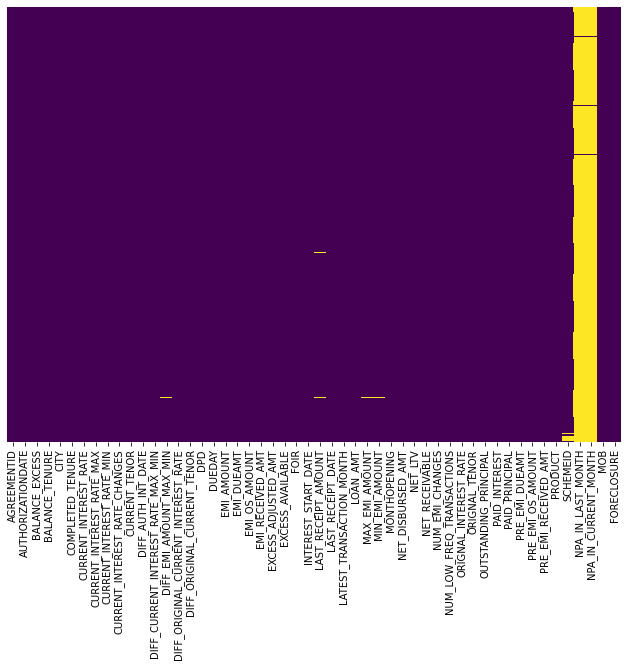

In [12]:
# Finding the missing values
plt.figure(figsize=(11,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=90)
plt.show()


We see here that columns <b> NPA_IN_LAST_MONTH, NPA_IN_CURRENT_MONTH </b> missing values are very high so no point in filling the missing values for these columns. Out of total <b>19732</b> observations, only <b>119</b> observations are available for these columns. So we will drop these.

In [178]:
df.drop(['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH'],axis=1,inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

#### Automatic Function to handle Missing Values for Numeric Data

In [180]:
# Handling Missing Values
def fillmissingValues(x):
    x = x.fillna(x.median())
    return x

#### Automatic Function to handle Missing Values for Dates

In [181]:
# Handling Missing Values in Dates
def fill_datemissingValue(x):
    x = x.fillna(method='ffill').fillna(method='bfill')
    return x


#### Seperate Categorical, Numerical and Date Variables
- Apply the missing values in the numerical & date variables

In [182]:
#Numeric Variables
df_numeric = df._get_numeric_data()

# Date Variables
df_dates = df.select_dtypes(include=[np.datetime64])

# Categorical Variables
catFeatures=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
df_categories = df[catFeatures]

df_numeric  = df_numeric.apply(lambda x: fillmissingValues(x))
df_dates  = df_dates.apply(lambda x: fill_datemissingValue(x))


In [183]:
#Concat the data to get the full data set after computing the missing values
df1 = pd.concat([df_numeric,df_dates,df_categories],axis=1)
df1 = pd.concat([df_numeric,df_dates,df_categories],axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   BALANCE_EXCESS                       20012 non-null  float64       
 2   BALANCE_TENURE                       20012 non-null  int64         
 3   COMPLETED_TENURE                     20012 non-null  int64         
 4   CURRENT_INTEREST_RATE                20012 non-null  float64       
 5   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 6   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 8   CURRENT_TENOR                        20012 non-null  int64         
 9   DIFF_AUTH_INT_DATE                   20012 non-null  int64         
 10  DIFF_CURRE

### Lets check if any missing values

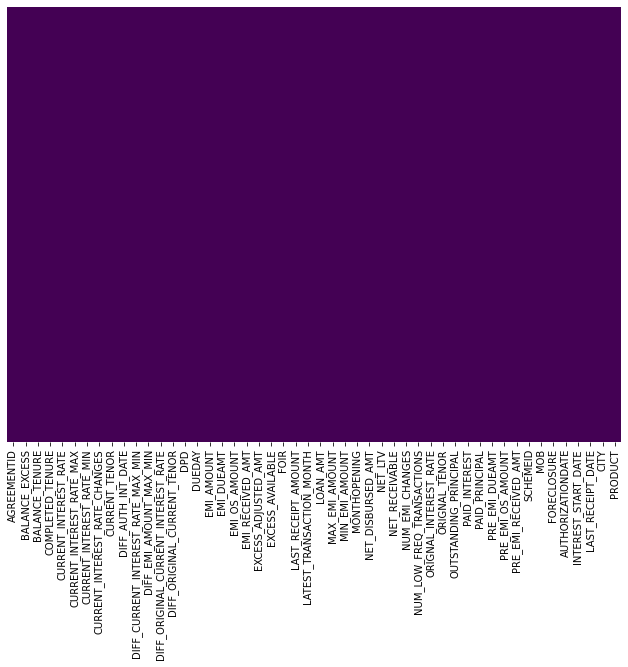

In [19]:
# Finding the missing values
plt.figure(figsize=(11,8))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### 2. Outlier Treatment

In [184]:
# Create the list of numerical,categorical and date variable names
cat_list =[] 
num_list =[] 
date_list = [] 

for x in df_numeric.columns:
    num_list.append(x)
for x in df_categories.columns:
    cat_list.append(x)
for x in df_dates.columns:
    date_list.append(x)
    
# print(cat_list)
# print('\n')
# print(date_list)
# print('\n')
# print(num_list)
# print('\n')


#### Create Box Plot for all numeric data

<ipython-input-21-9c2f8cda9c8f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes = plt.subplots(figsize=(10,4))


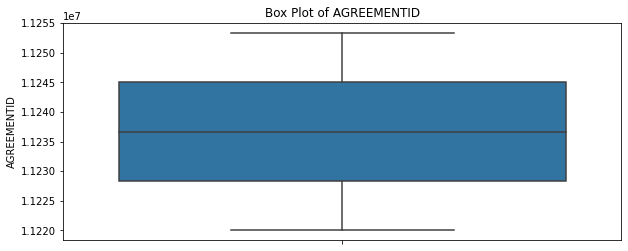

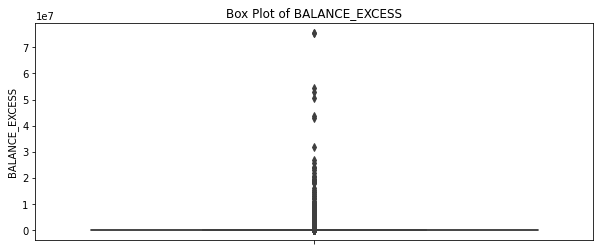

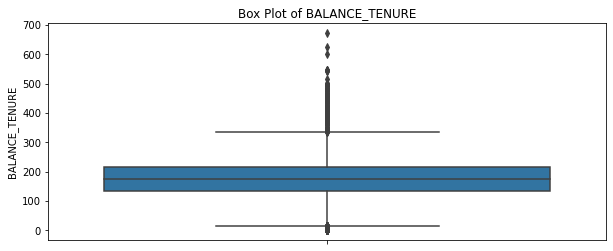

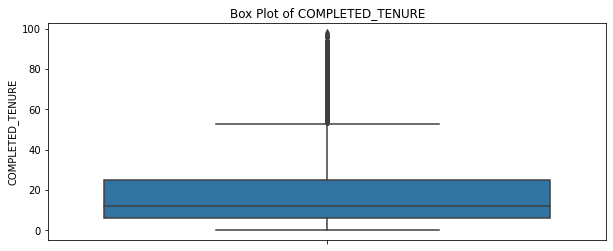

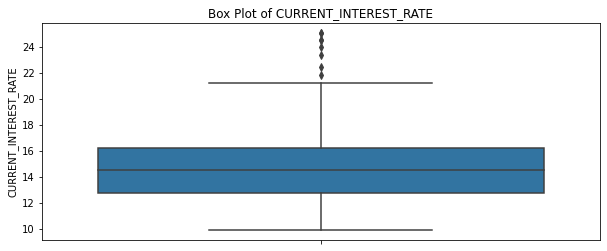

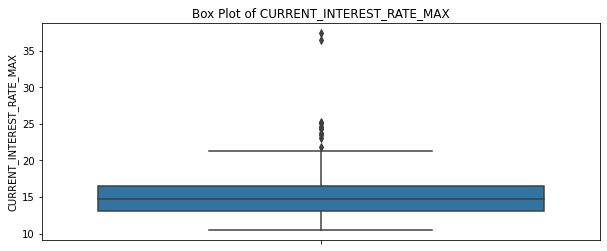

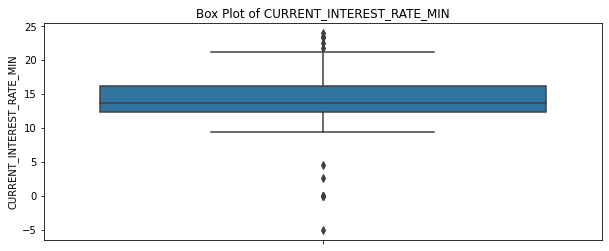

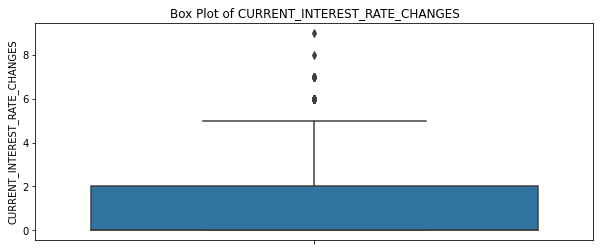

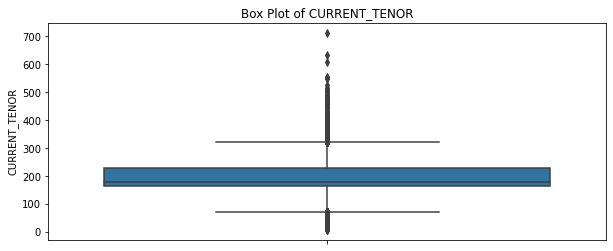

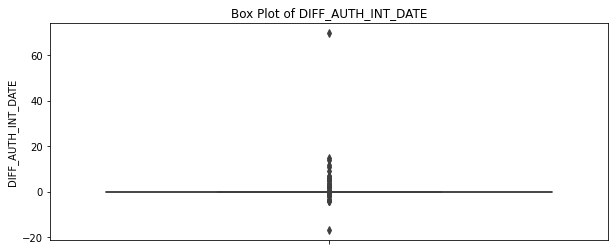

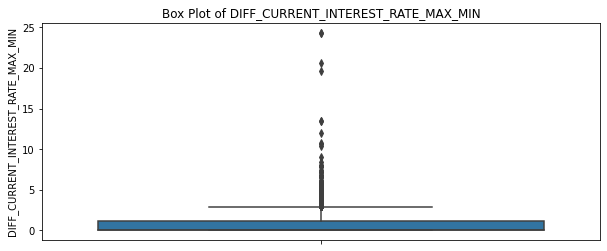

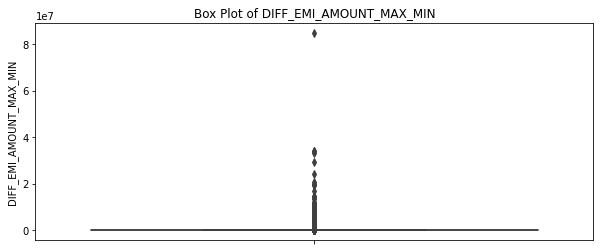

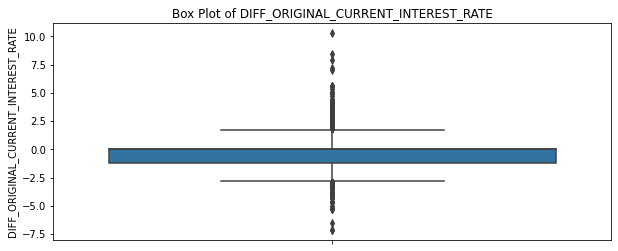

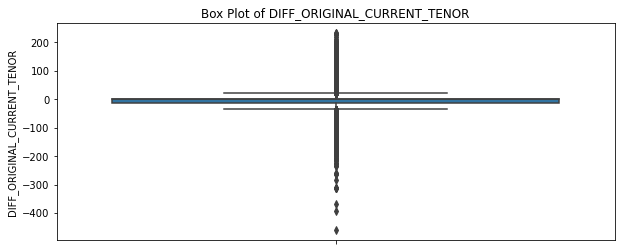

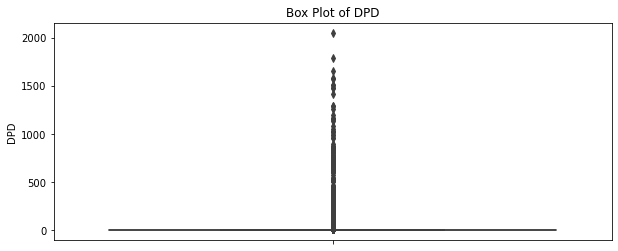

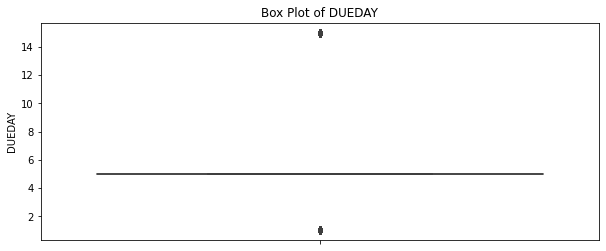

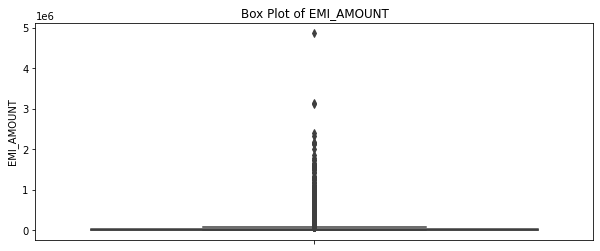

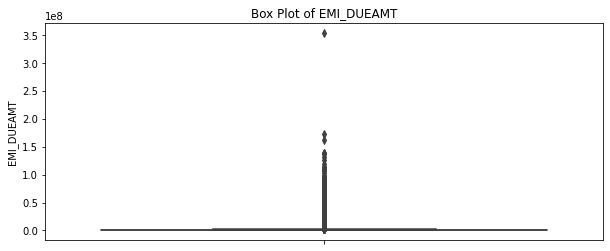

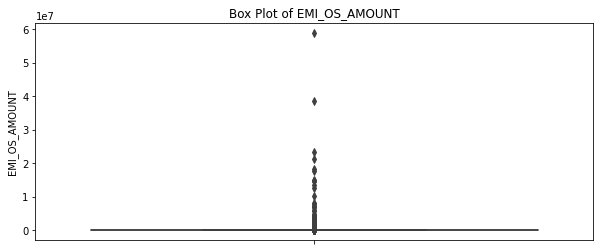

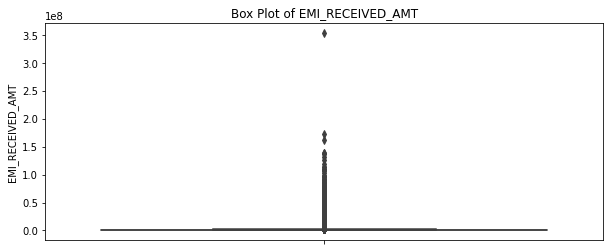

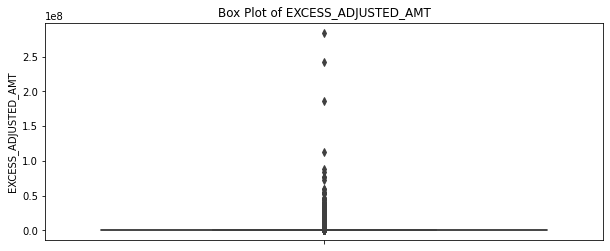

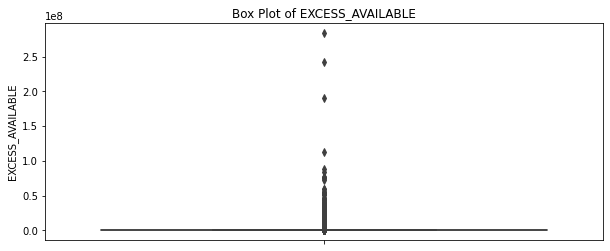

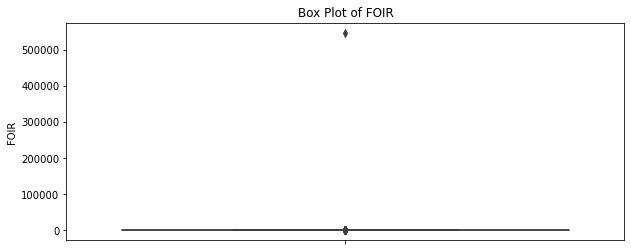

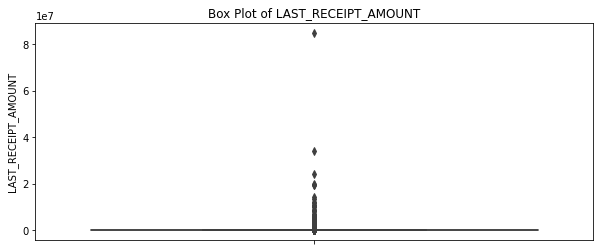

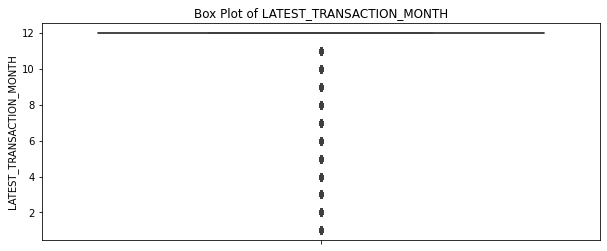

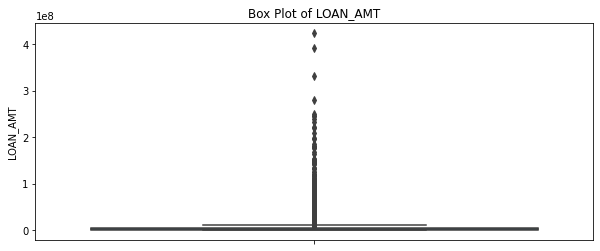

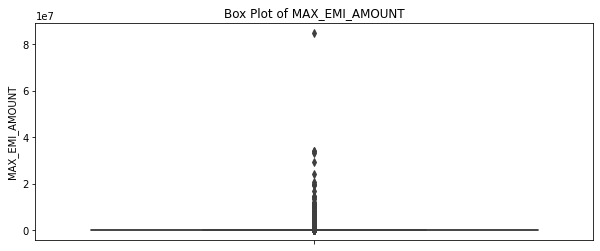

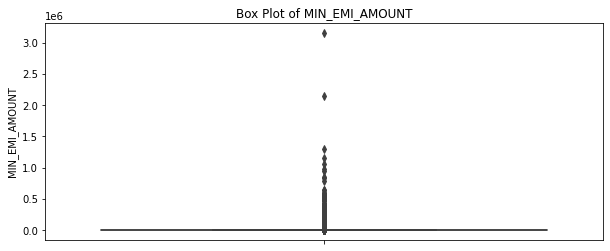

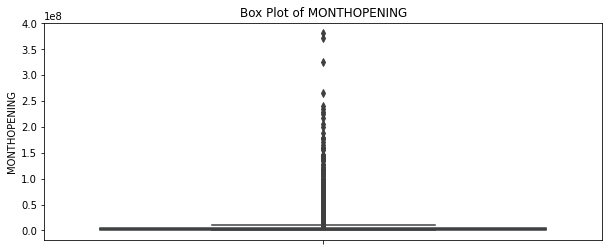

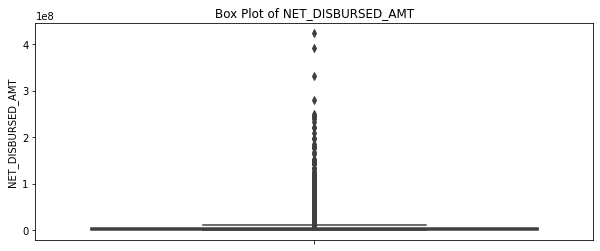

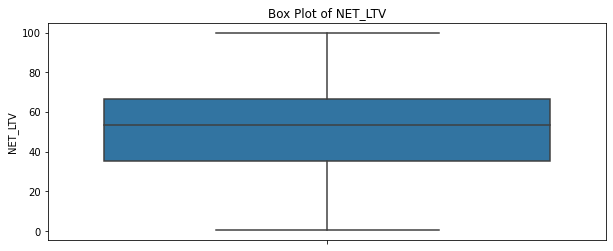

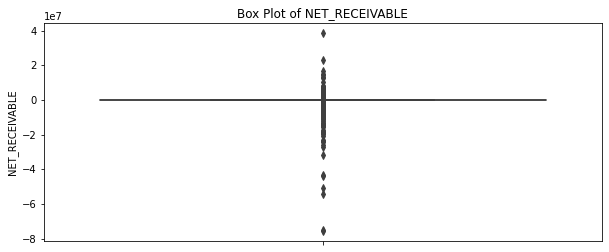

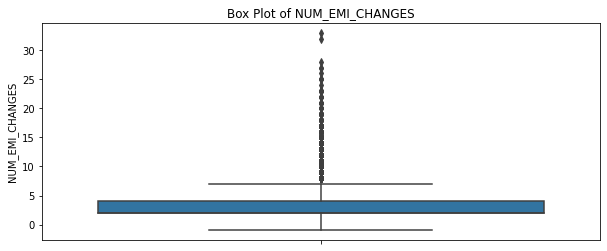

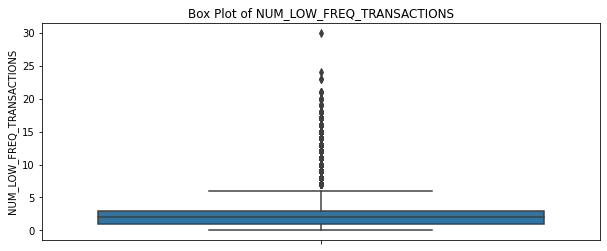

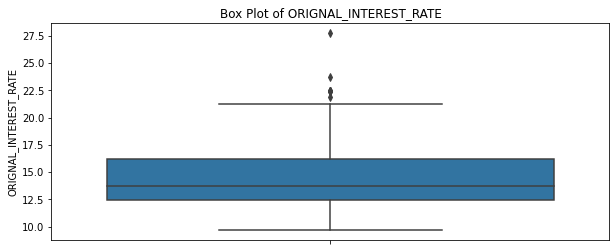

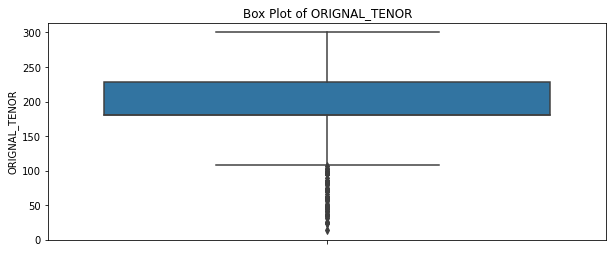

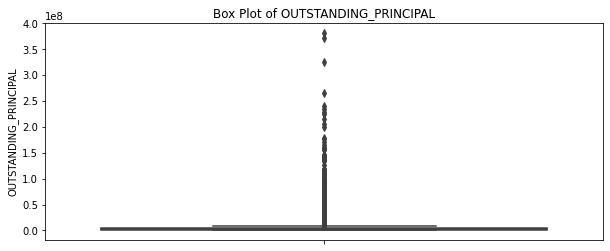

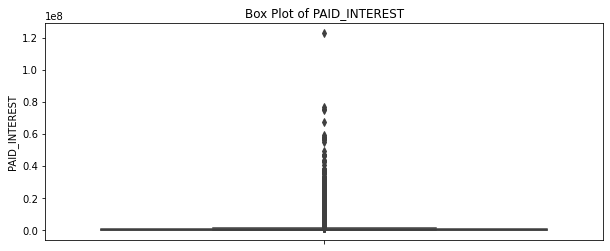

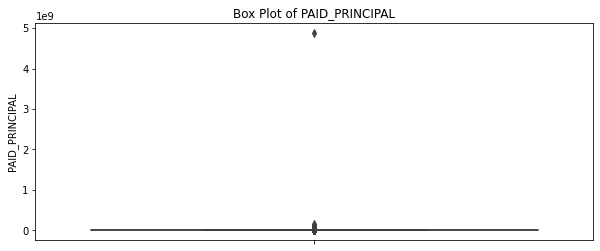

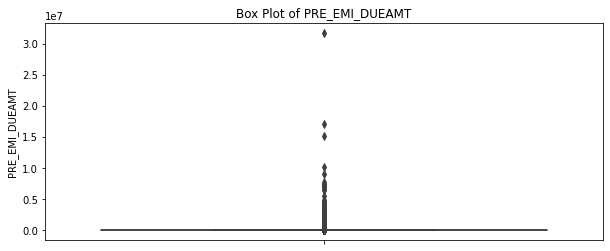

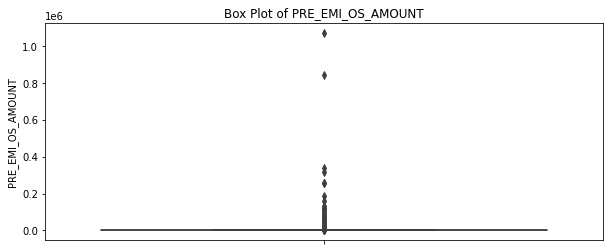

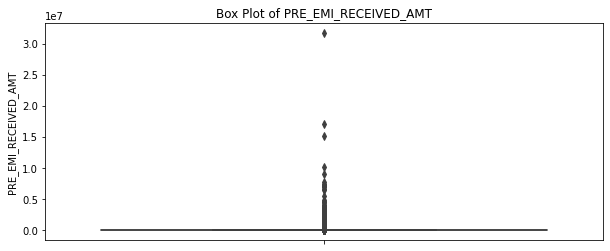

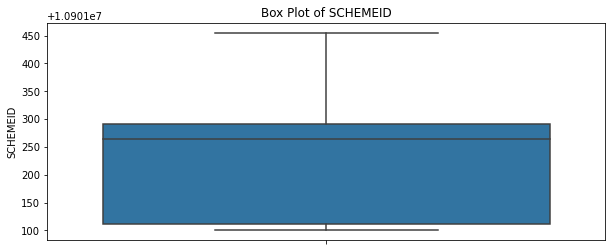

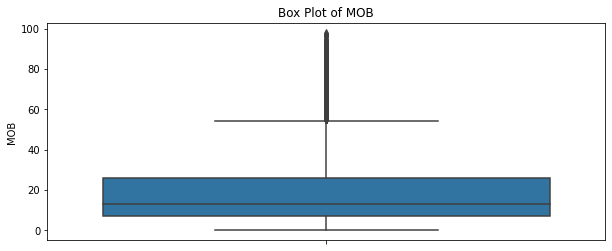

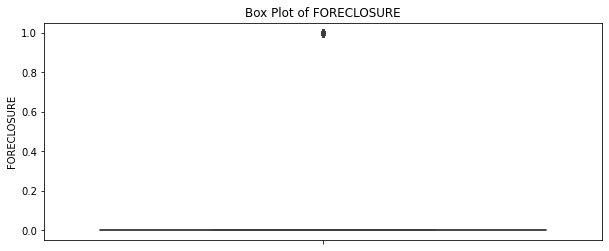

In [21]:
for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = df1)
    plt.title(str('Box Plot of ') + str(num_variable))

#### Automate Outlier Capping

In [185]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [186]:
df_num = df1[num_list]

df_num=df_num.apply(lambda x: outlier_capping(x))

<ipython-input-24-d6bff536d39c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes = plt.subplots(figsize=(10,4))


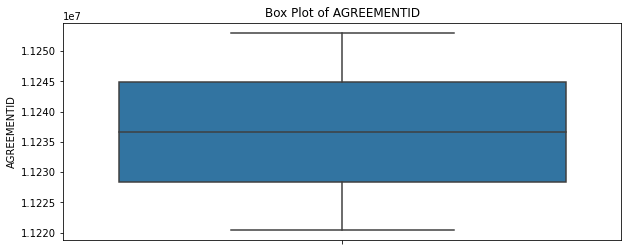

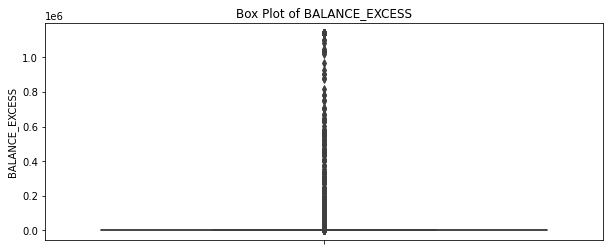

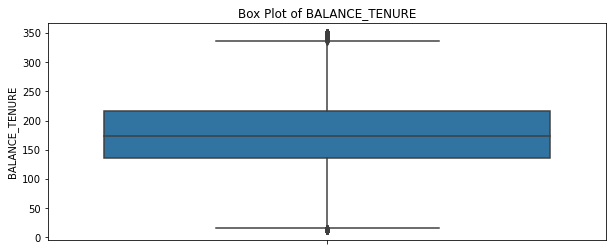

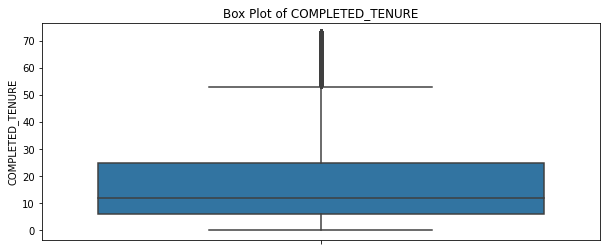

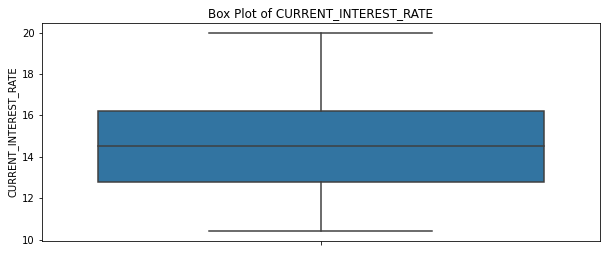

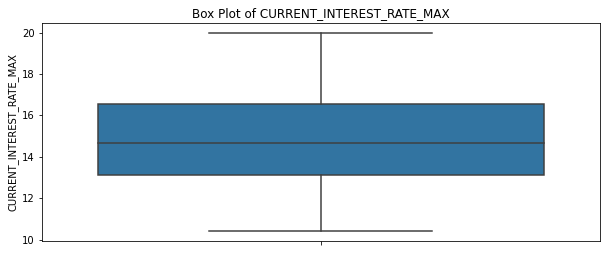

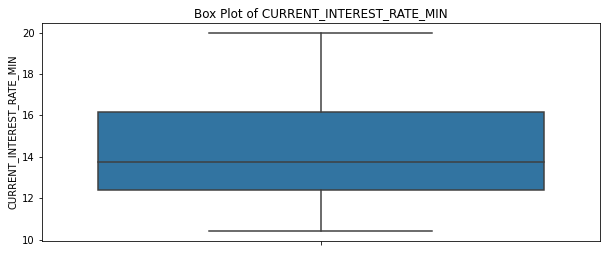

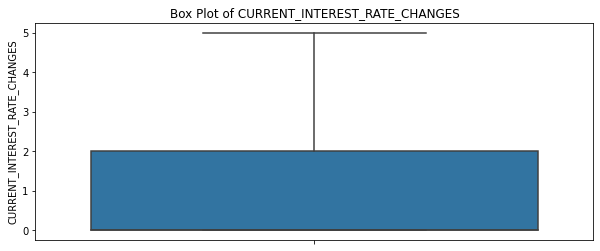

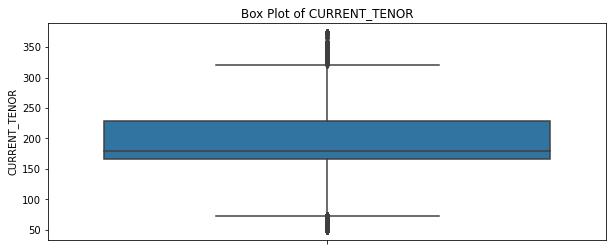

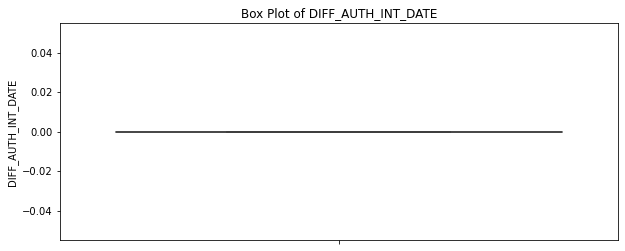

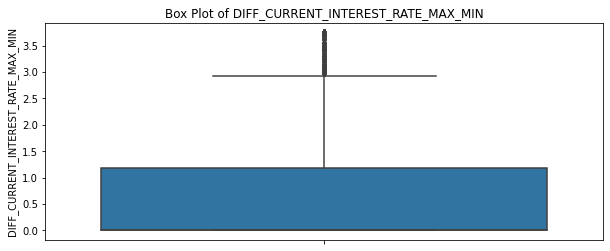

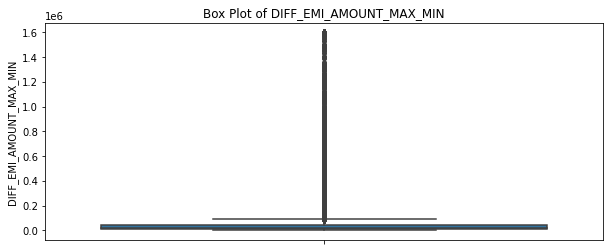

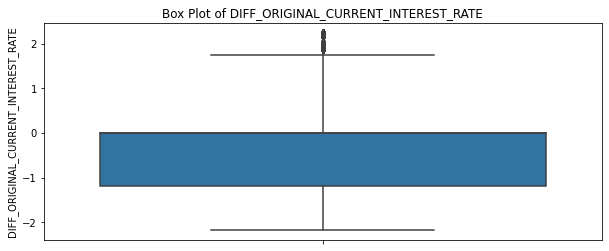

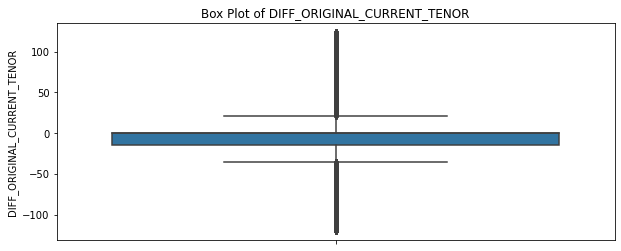

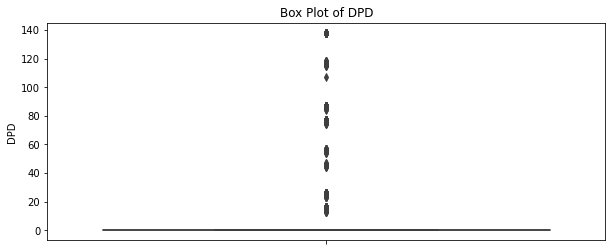

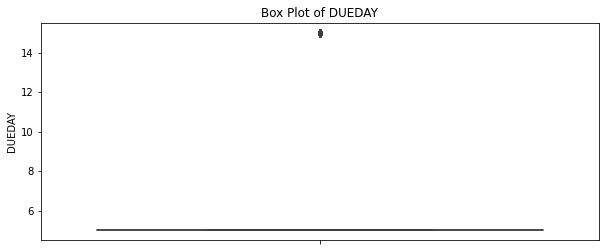

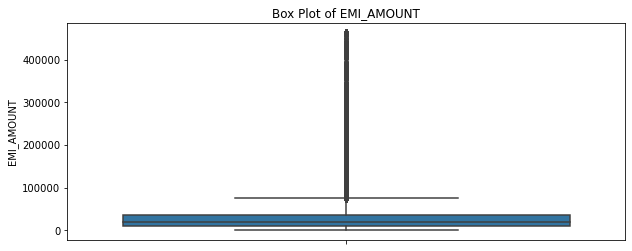

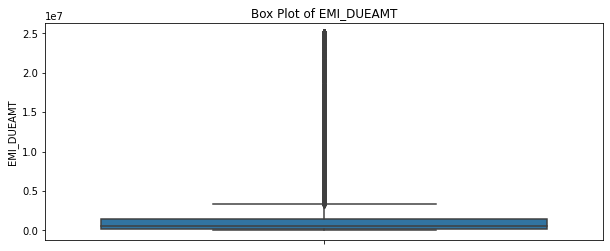

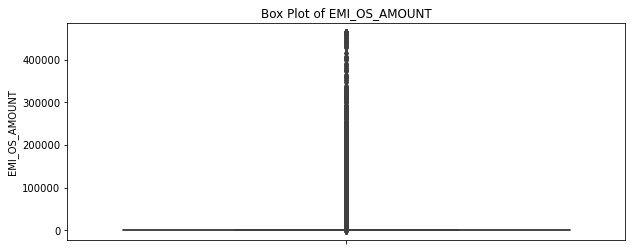

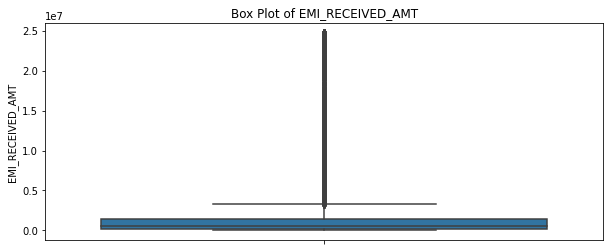

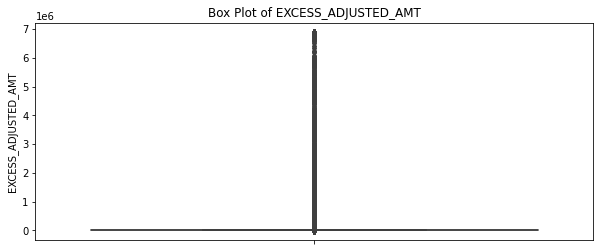

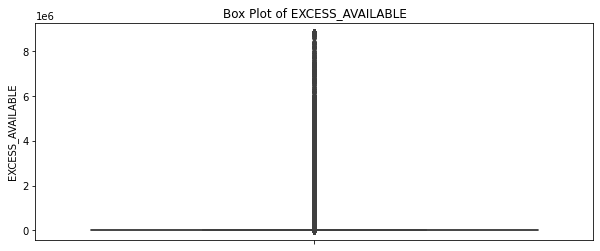

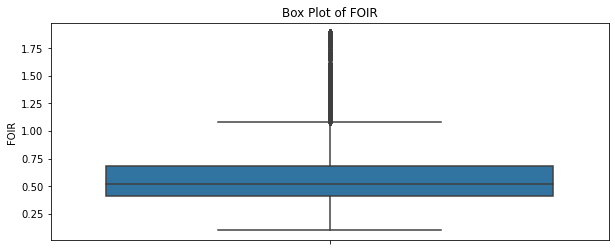

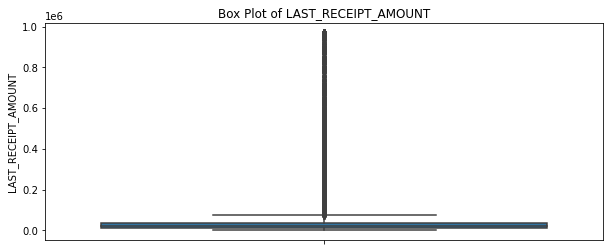

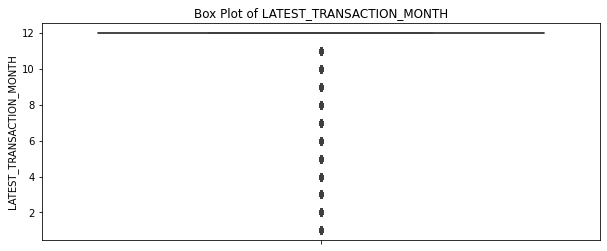

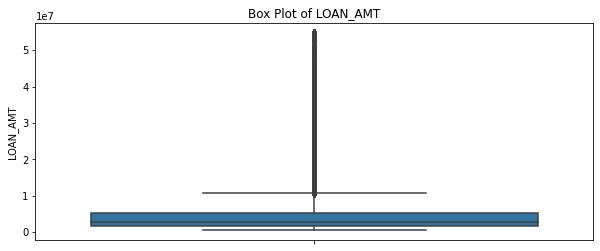

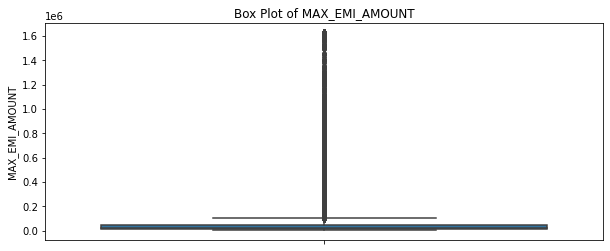

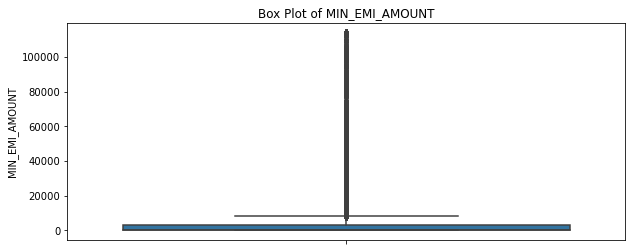

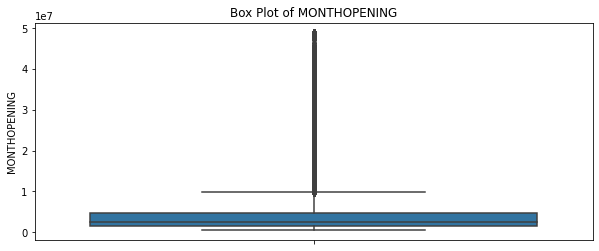

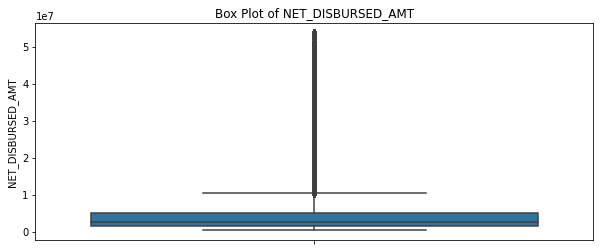

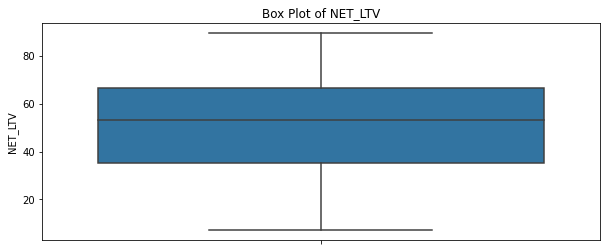

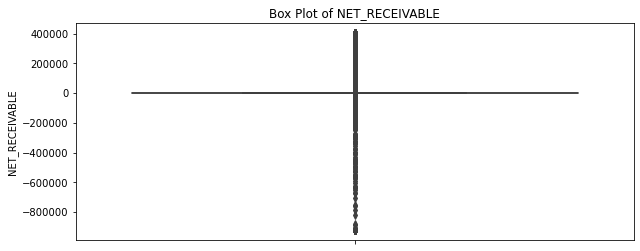

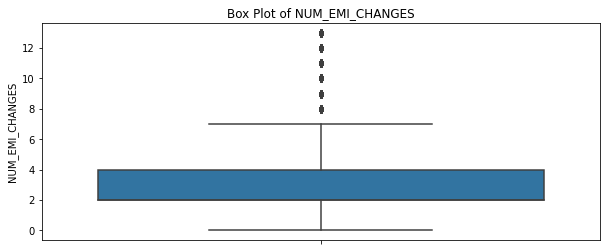

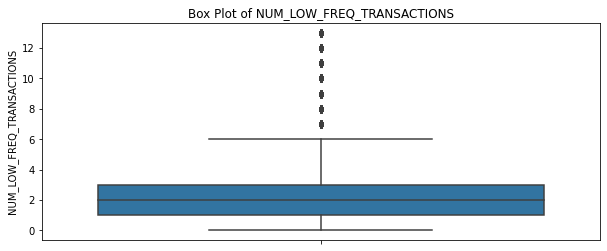

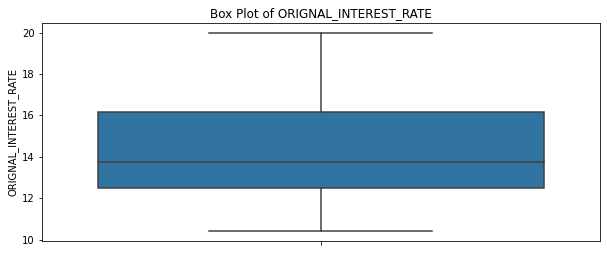

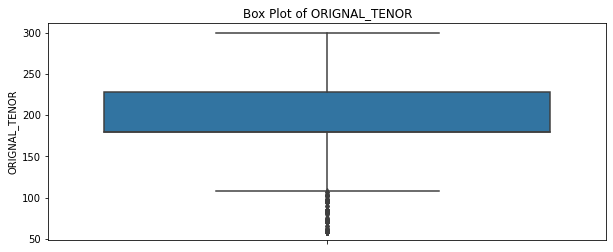

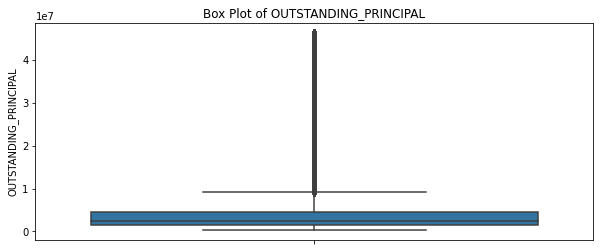

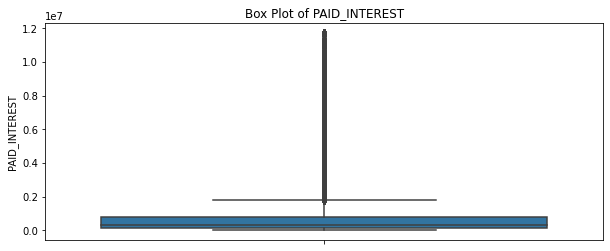

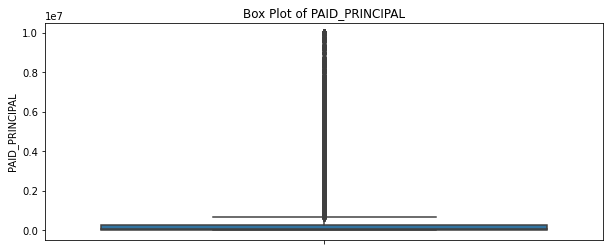

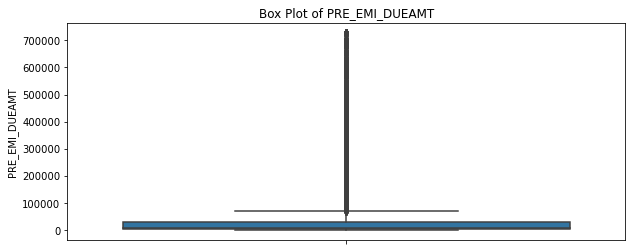

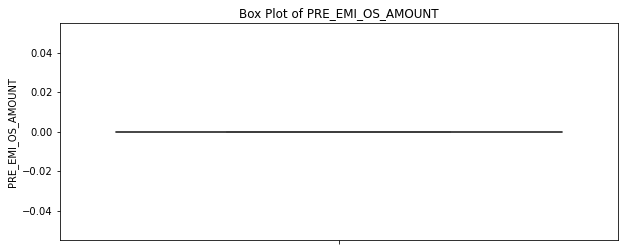

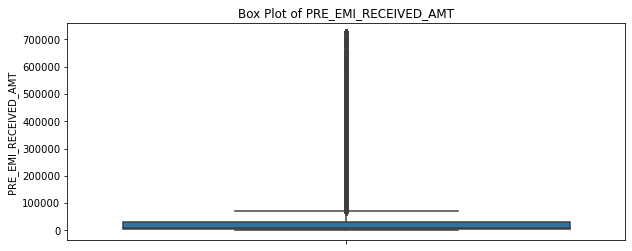

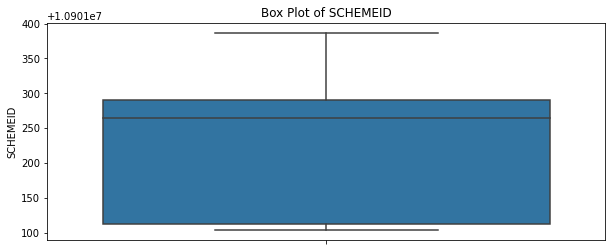

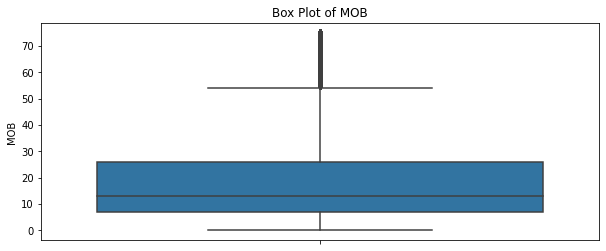

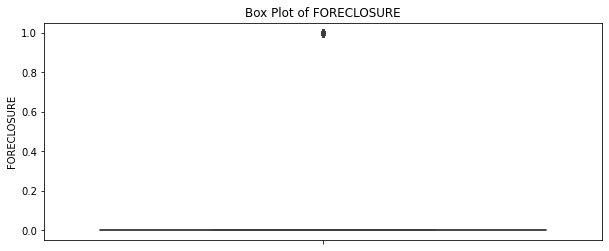

In [24]:
for num_variable in df_num.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = df_num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [25]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM  \
AGREEMENTID                          20012.0    0.0  2.248678e+11   
BALANCE_EXCESS                       20012.0    0.0  3.123845e+08   
BALANCE_TENURE                       20012.0    0.0  3.445761e+06   
COMPLETED_TENURE                     20012.0    0.0  3.438880e+05   
CURRENT_INTEREST_RATE                20012.0    0.0  2.957407e+05   
CURRENT_INTEREST_RATE_MAX            20012.0    0.0  2.980521e+05   
CURRENT_INTEREST_RATE_MIN            20012.0    0.0  2.862318e+05   
CURRENT_INTEREST_RATE_CHANGES        20012.0    0.0  1.509200e+04   
CURRENT_TENOR                        20012.0    0.0  3.795047e+06   
DIFF_AUTH_INT_DATE                   20012.0    0.0  0.000000e+00   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN   20012.0    0.0  1.166908e+04   
DIFF_EMI_AMOUNT_MAX_MIN              20012.0    0.0  1.530338e+09   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE  20012.0    0.0 -7.638090e+03   
DIFF_ORIGINAL_CURRENT_TENOR          20012.0    0.0 -1.316389e+05   
DPD                                  20012.0    0.0  7.243300e+04   
DUEDAY                               20012.0    0.0  1.159300e+05   
EMI_AMOUNT                           20012.0    0.0  7.890074e+08   
EMI_DUEAMT                           20012.0    0.0  3.424606e+10   
EMI_OS_AMOUNT                        20012.0    0.0  1.965158e+08   
EMI_RECEIVED_AMT                     20012.0    0.0  3.368857e+10   
EXCESS_ADJUSTED_AMT                  20012.0    0.0  4.014616e+09   
EXCESS_AVAILABLE                     20012.0    0.0  5.278739e+09   
FOIR                                 20012.0    0.0  1.156301e+04   
LAST_RECEIPT_AMOUNT                  20012.0    0.0  1.049767e+09   
LATEST_TRANSACTION_MONTH             20012.0    0.0  2.140710e+05   
LOAN_AMT                             20012.0    0.0  1.089139e+11   
MAX_EMI_AMOUNT                       20012.0    0.0  1.666733e+09   
MIN_EMI_AMOUNT                       20012.0    0.0  1.068454e+08   
MONTHOPENING                         20012.0    0.0  1.007420e+11   
NET_DISBURSED_AMT                    20012.0    0.0  1.078998e+11   
NET_LTV                              20012.0    0.0  1.024735e+06   
NET_RECEIVABLE                       20012.0    0.0 -7.819709e+07   
NUM_EMI_CHANGES                      20012.0    0.0  5.835800e+04   
NUM_LOW_FREQ_TRANSACTIONS            20012.0    0.0  5.483600e+04   
ORIGNAL_INTEREST_RATE                20012.0    0.0  2.881314e+05   
ORIGNAL_TENOR                        20012.0    0.0  3.669103e+06   
OUTSTANDING_PRINCIPAL                20012.0    0.0  9.609751e+10   
PAID_INTEREST                        20012.0    0.0  1.744738e+10   
PAID_PRINCIPAL                       20012.0    0.0  9.460997e+09   
PRE_EMI_DUEAMT                       20012.0    0.0  8.617693e+08   
PRE_EMI_OS_AMOUNT                    20012.0    0.0  0.000000e+00   
PRE_EMI_RECEIVED_AMT                 20012.0    0.0  8.574616e+08   
SCHEMEID                             20012.0    0.0  2.181552e+11   
MOB                                  20012.0    0.0  3.749490e+05   
FORECLOSURE                          20012.0    0.0  1.795000e+03   

                                             MEAN        MEDIAN           STD  \
AGREEMENTID                          1.123665e+07  1.123661e+07  9.620563e+03   
BALANCE_EXCESS                       1.560986e+04  0.000000e+00  1.209370e+05   
BALANCE_TENURE                       1.721847e+02  1.740000e+02  6.111248e+01   
COMPLETED_TENURE                     1.718409e+01  1.200000e+01  1.616427e+01   
CURRENT_INTEREST_RATE                1.477817e+01  1.454563e+01  2.475455e+00   
CURRENT_INTEREST_RATE_MAX            1.489367e+01  1.467049e+01  2.458262e+00   
CURRENT_INTEREST_RATE_MIN            1.430301e+01  1.373407e+01  2.654337e+00   
CURRENT_INTEREST_RATE_CHANGES        7.541475e-01  0.000000e+00  1.116752e+00   
CURRENT_TENOR                        1.896385e+02  1.800000e+02  5.579080e+01   
DIFF_AUTH_INT_DATE                   0.000000e+00  0.00000

In [187]:
## Create the full data set after outlier treatment. Concatenate the numeric, categorical and Date Variables
df2=pd.concat([df_num,df1[date_list],df1[cat_list]],axis=1)
df2.head()

AGREEMENTID  BALANCE_EXCESS  BALANCE_TENURE  COMPLETED_TENURE  \
0  11220351.33             0.0            12.0                45   
1  11220351.33             0.0            99.0                38   
2  11220351.33             0.0           231.0                73   
3  11220351.33             0.0            12.0                73   
4  11220351.33             0.0           215.0                73   

   CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0              13.421934                  13.734072   
1              13.734072                  13.734072   
2              15.606900                  16.231176   
3              11.236968                  13.734072   
4              14.982624                  15.606900   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  CURRENT_TENOR  \
0                  13.421934                              1           49.0   
1                  13.734072                              0          137.0   
2                  15.606900                              2          312.0   
3                  11.236968                              4           91.0   
4                  14.982624                              2          304.0   

   DIFF_AUTH_INT_DATE  ...  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  \
0                   0  ...                0.0           7994.273589   
1                   0  ...                0.0         100504.575864   
2                   0  ...                0.0           5947.630536   
3                   0  ...                0.0          60322.180776   
4                   0  ...                0.0          27732.787464   

     SCHEMEID  MOB  FORECLOSURE  AUTHORIZATIONDATE  INTEREST_START_DATE  \
0  10901103.0   45            1         2010-08-29           2010-08-30   
1  10901103.0   38            1         2010-09-15           2010-09-15   
2  10901103.0   75            1         2010-11-02           2010-11-01   
3  10901103.0   75            1         2010-10-06           2010-10-06   
4  10901103.0   75            1         2010-10-26           2010-10-26   

   LAST_RECEIPT_DATE    CITY  PRODUCT  
0         2014-05-05  MUMBAI       HL  
1         2013-11-01  MUMBAI       HL  
2         2017-08-05  MUMBAI       HL  
3         2018-05-02   THANE       HL  
4         2018-04-05  MUMBAI       HL  

[5 rows x 50 columns]

In [188]:
### We will drop the CITY from the dataset
df2.drop('CITY',axis=1,inplace=True)


In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  float64       
 1   BALANCE_EXCESS                       20012 non-null  float64       
 2   BALANCE_TENURE                       20012 non-null  float64       
 3   COMPLETED_TENURE                     20012 non-null  int64         
 4   CURRENT_INTEREST_RATE                20012 non-null  float64       
 5   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 6   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 8   CURRENT_TENOR                        20012 non-null  float64       
 9   DIFF_AUTH_INT_DATE                   20012 non-null  int64         
 10  DIFF_CURRE

### 3. Data Exploratory Analysis

    - Univariate Analysis - Check the distribution of all numerical data & categorical data
    - We already did the box plot in Outlier Treatment for the numerical data
    

### Univariate Analysis

##### Since we have new data set where we have dropped variables so we need to do the below step again to seperate the numerical, categorical and dates

In [190]:

#Numeric Variables
df_numeric = df2._get_numeric_data()

# Date Variables
df_dates = df2.select_dtypes(include=[np.datetime64])

# Categorical Variables
catFeatures=[key for key in dict(df2.dtypes) if dict(df2.dtypes)[key] in ['object']]
df_categories = df2[catFeatures]

df_numeric  = df_numeric.apply(lambda x: fillmissingValues(x))
df_dates  = df_dates.apply(lambda x: fill_datemissingValue(x))

cat_list =[] 
num_list =[] 
date_list = [] 

for x in df_numeric.columns:
    num_list.append(x)
for x in df_categories.columns:
    cat_list.append(x)
for x in df_dates.columns:
    date_list.append(x)

#### 3.1 Count Plot for Categorical Data

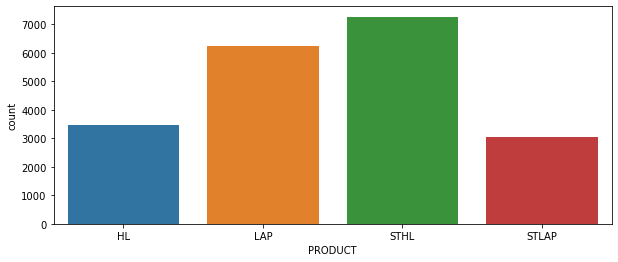

In [191]:
for cat in cat_list:
    fig,axes=plt.subplots(figsize=(10,4))
    sns.countplot(x=cat,data=df2)

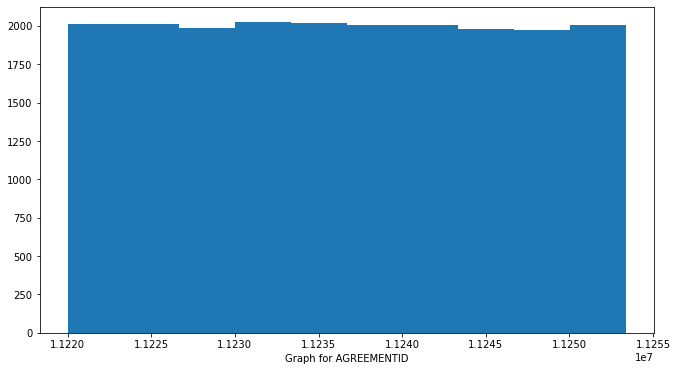

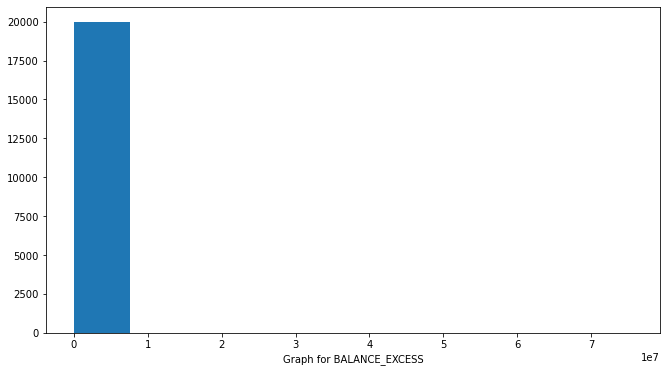

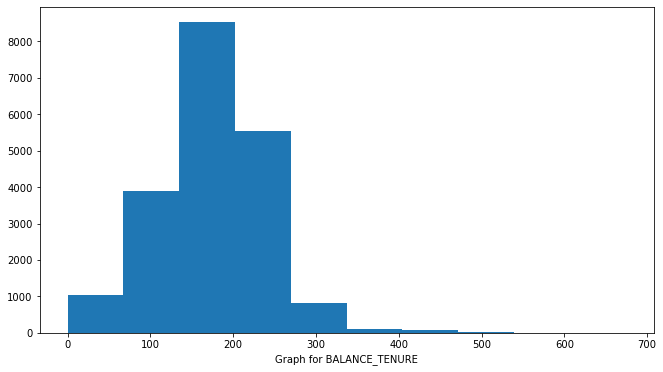

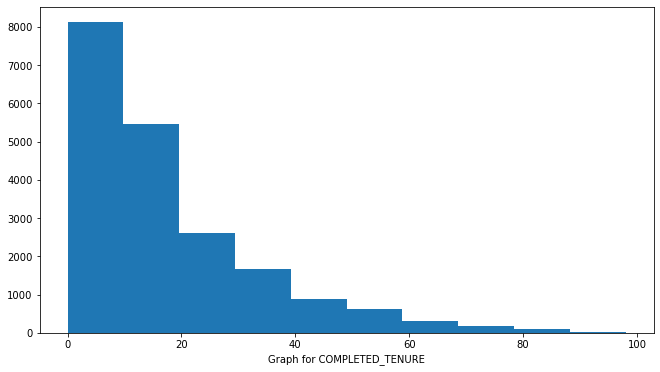

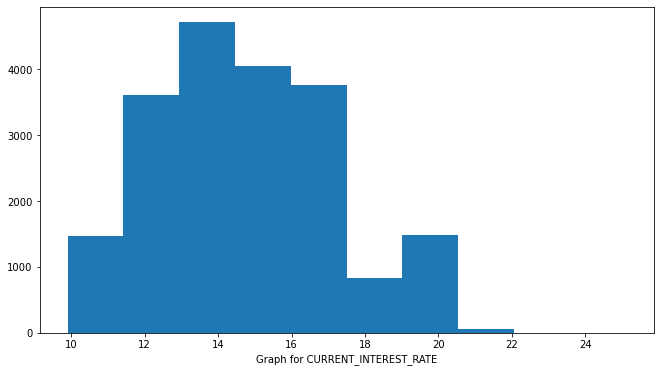

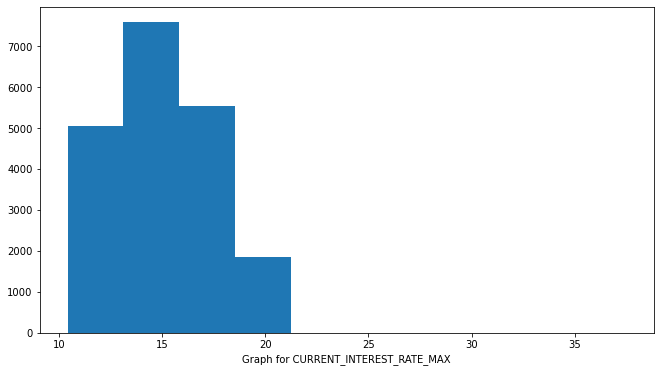

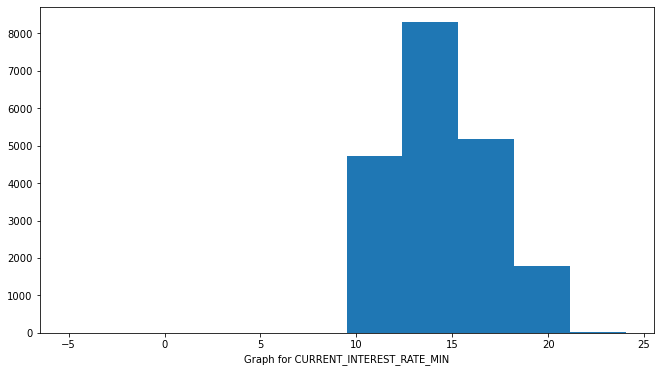

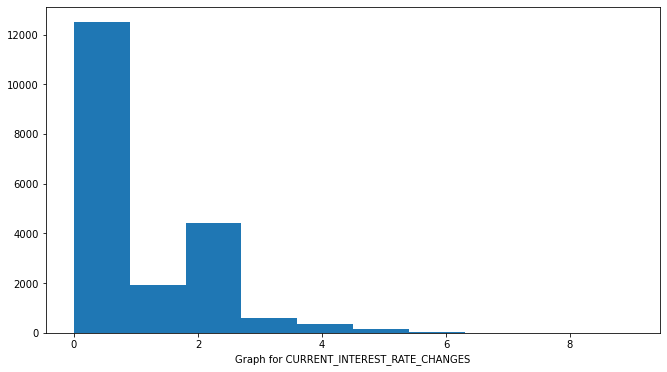

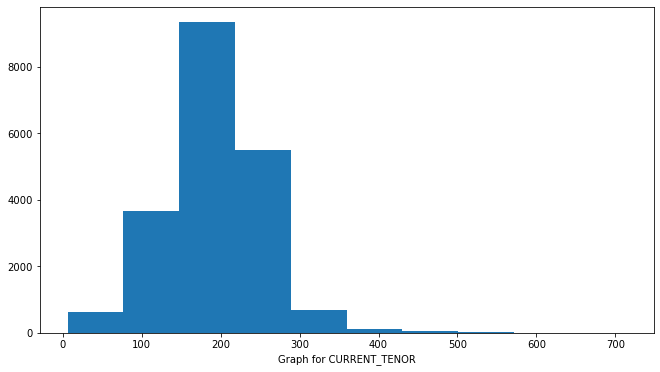

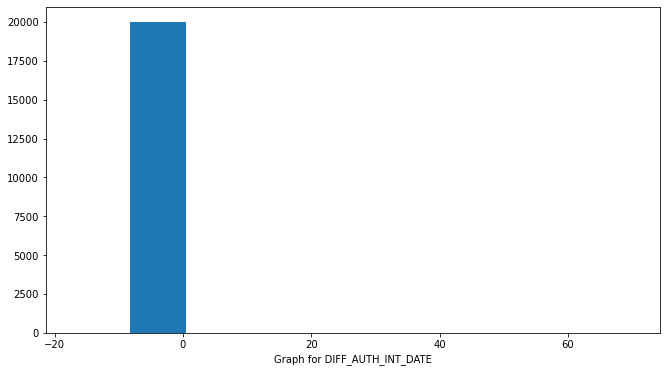

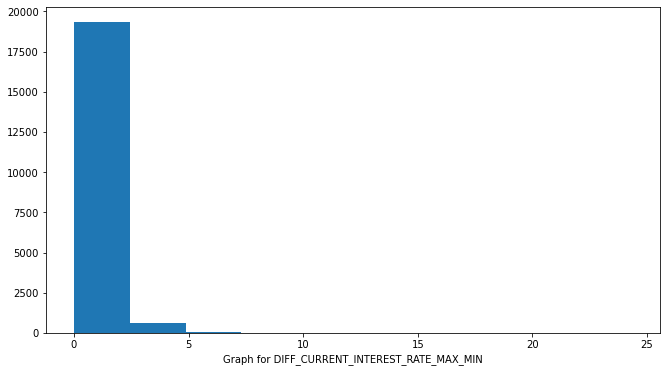

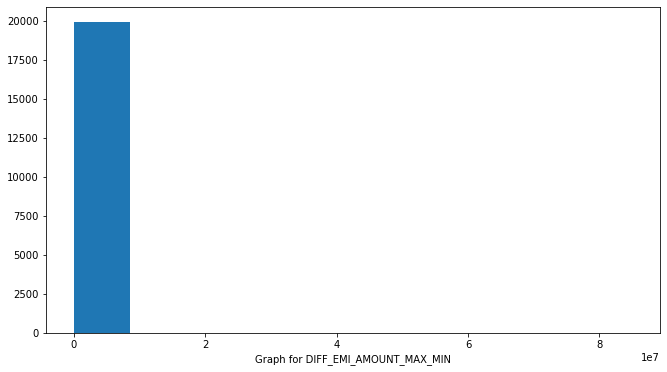

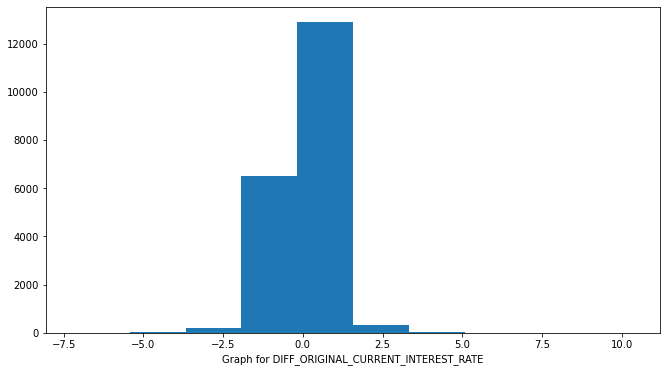

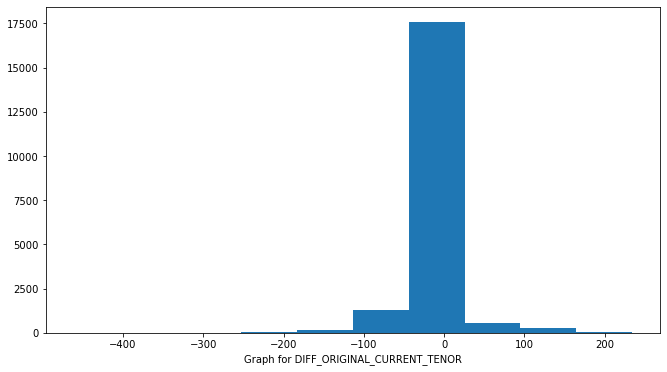

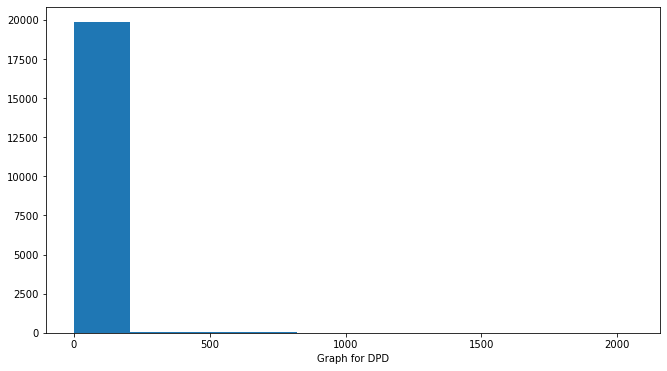

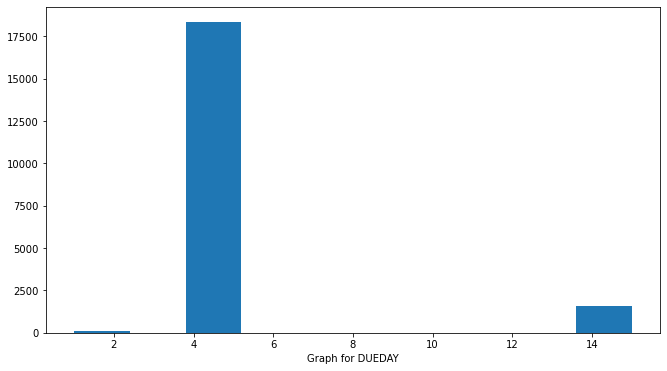

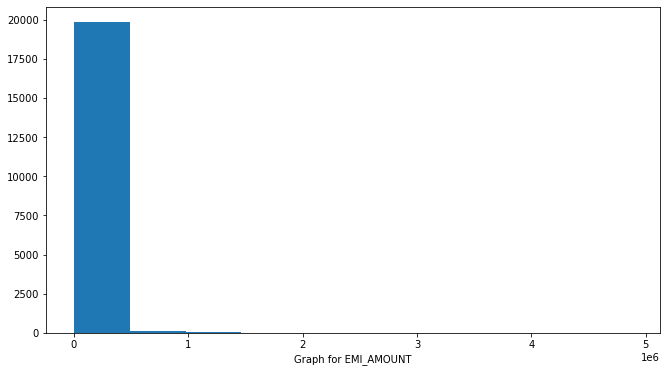

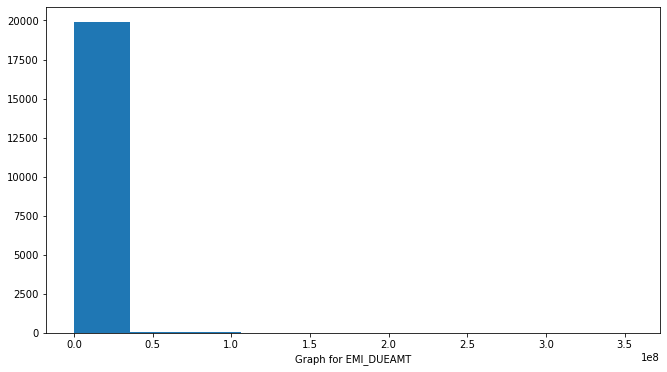

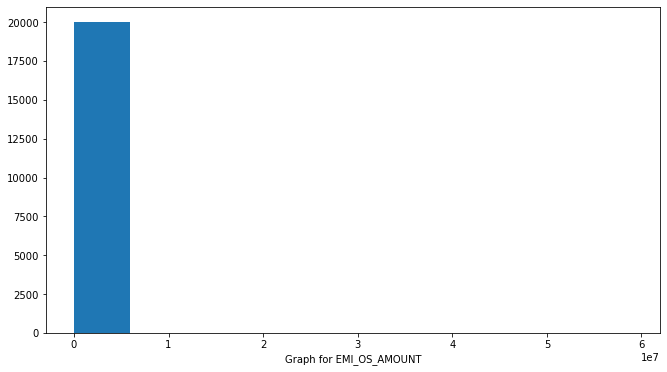

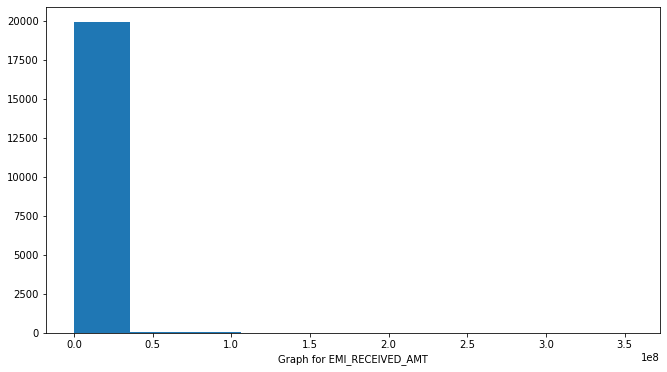

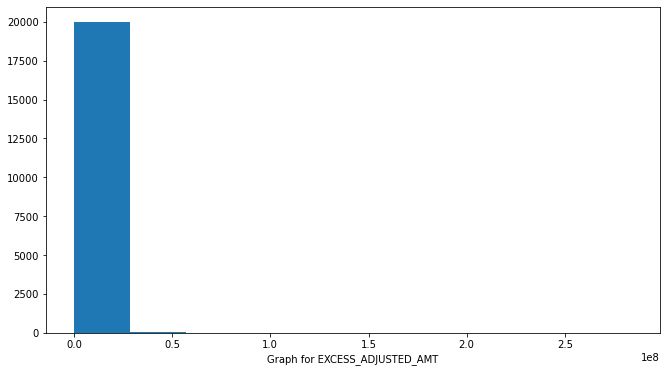

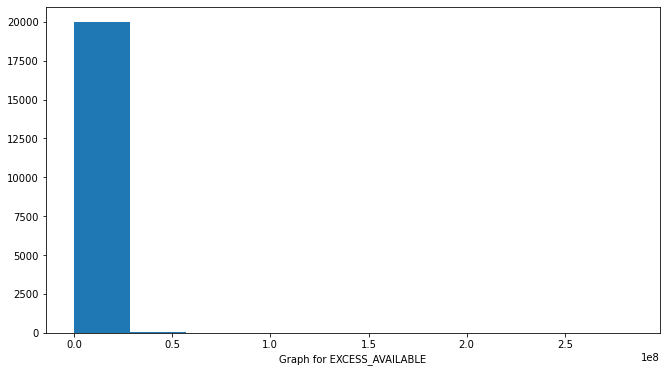

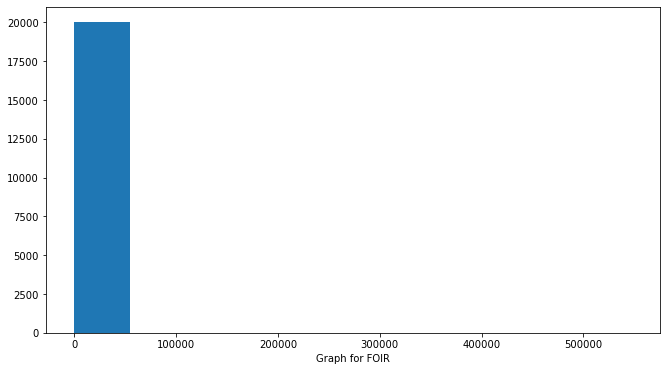

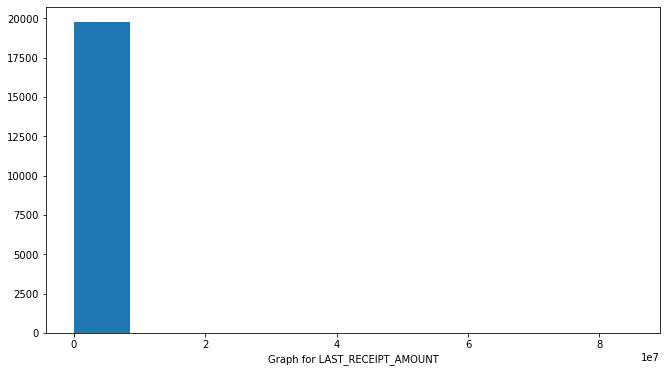

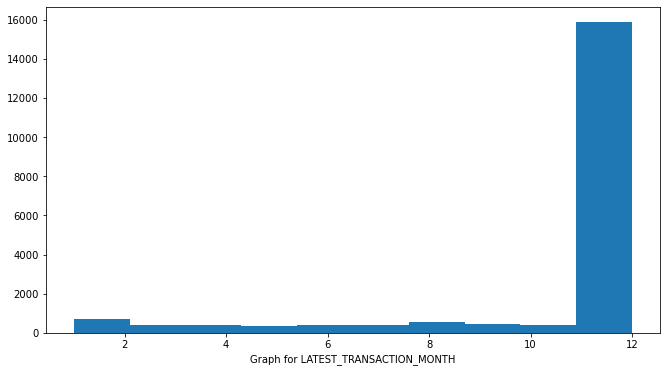

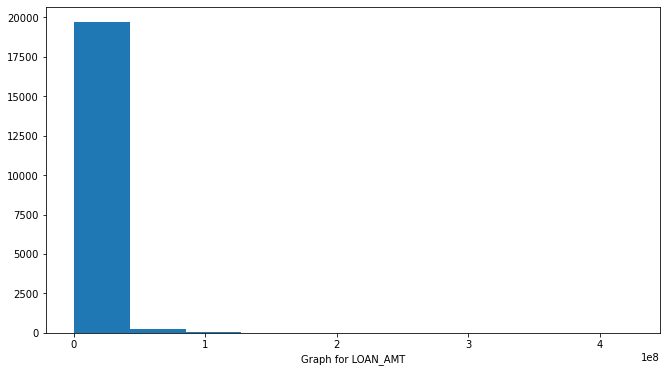

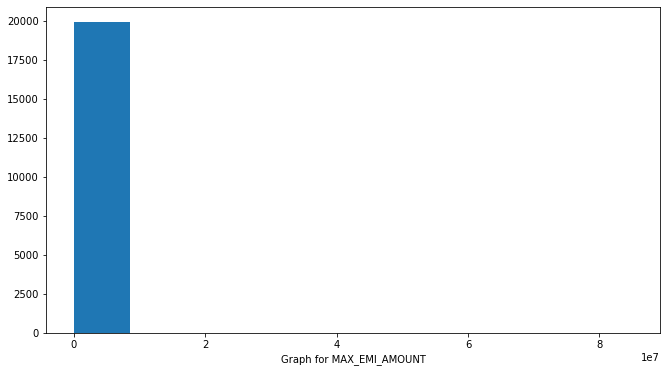

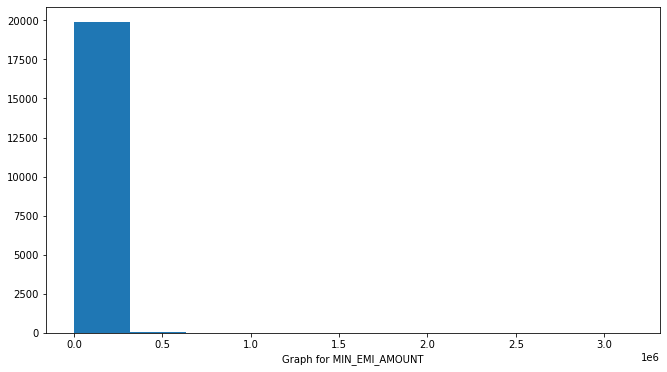

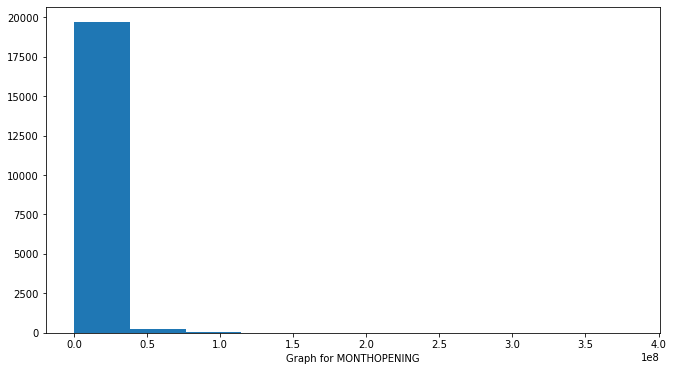

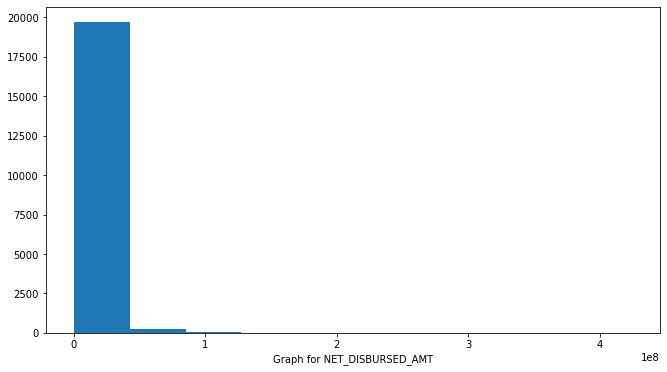

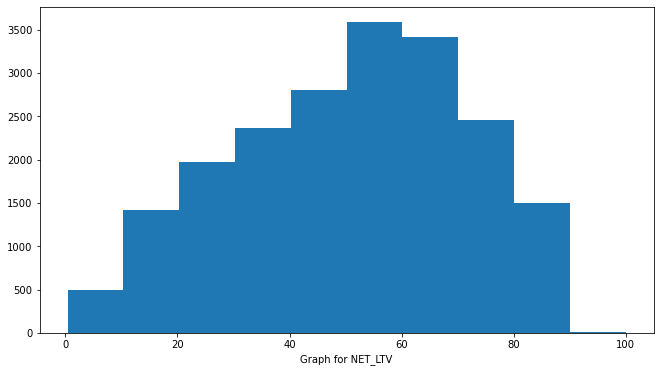

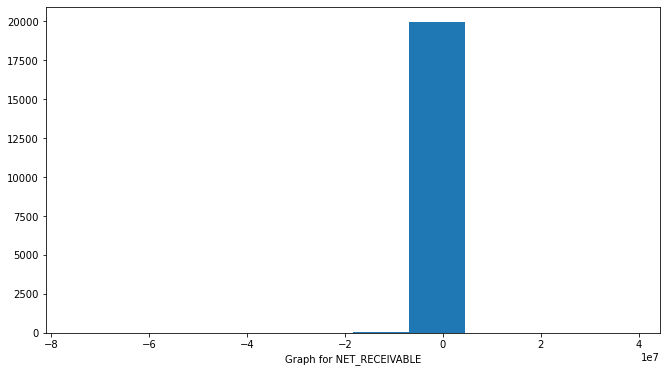

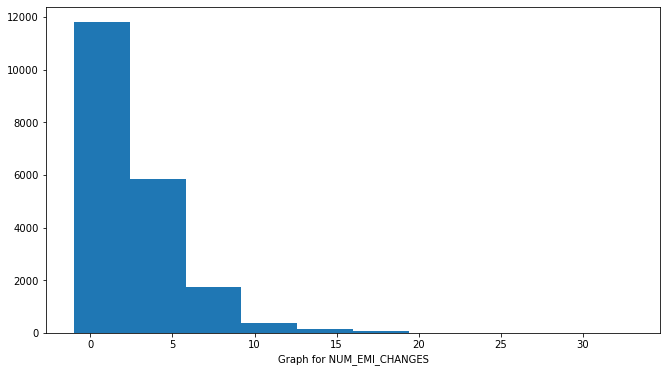

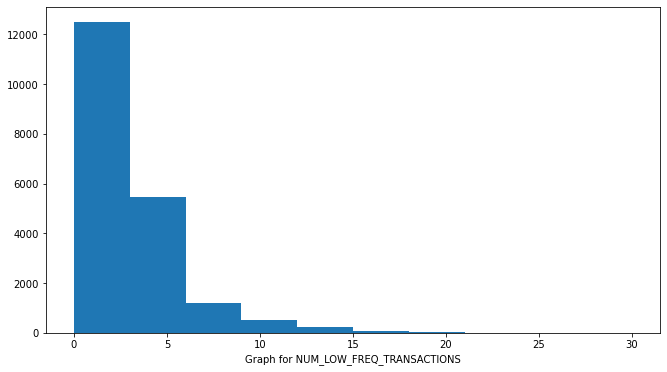

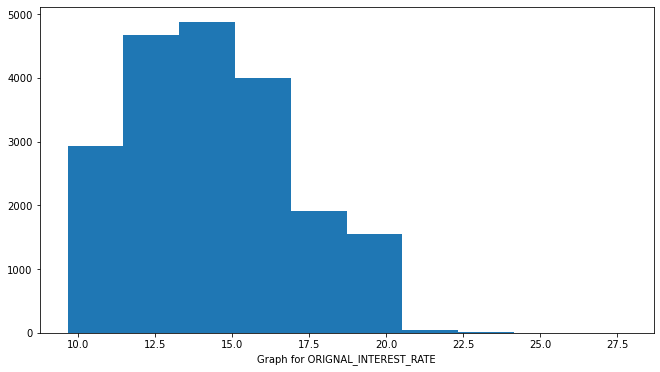

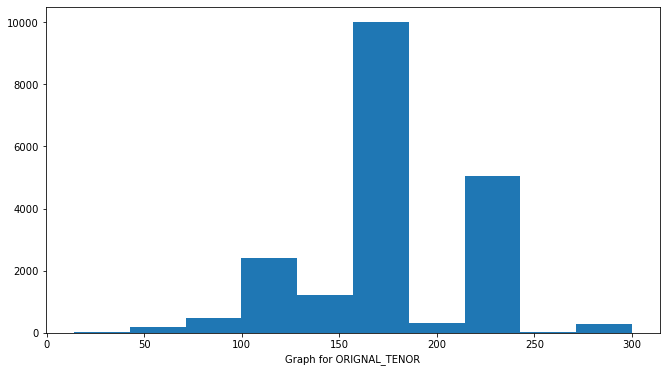

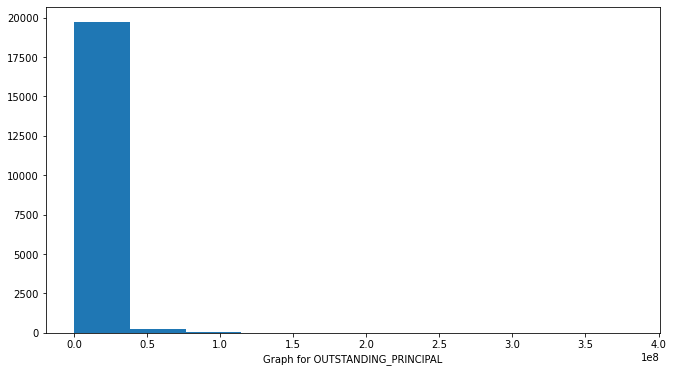

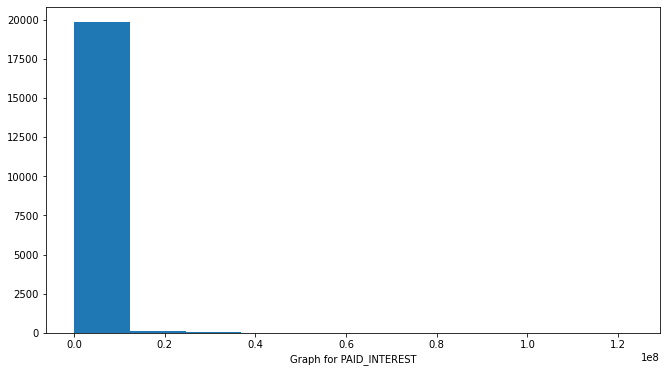

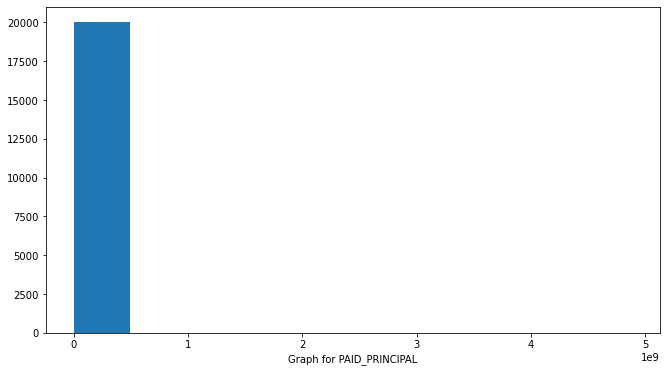

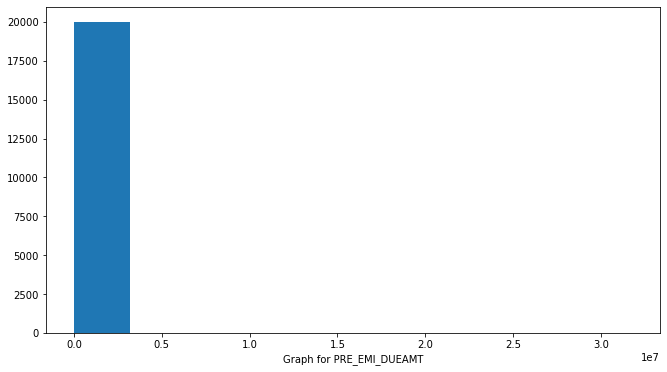

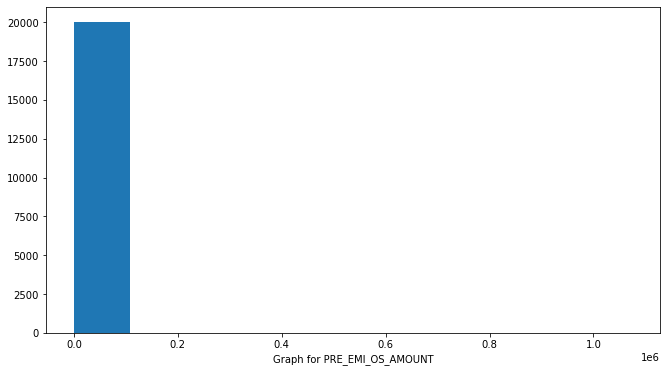

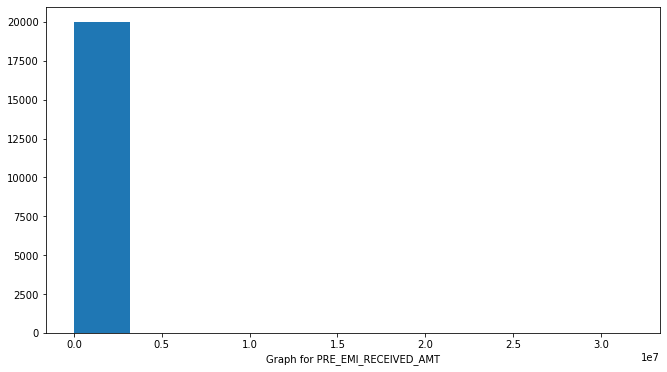

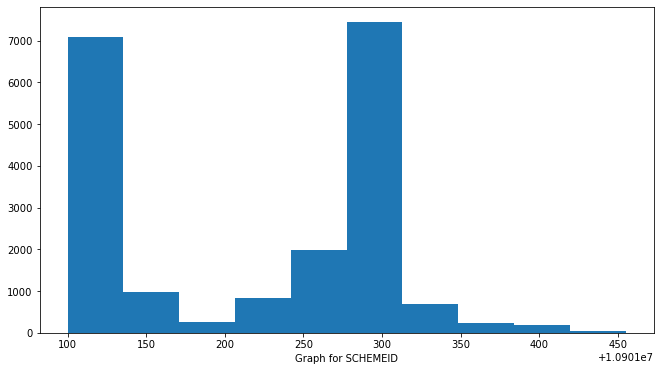

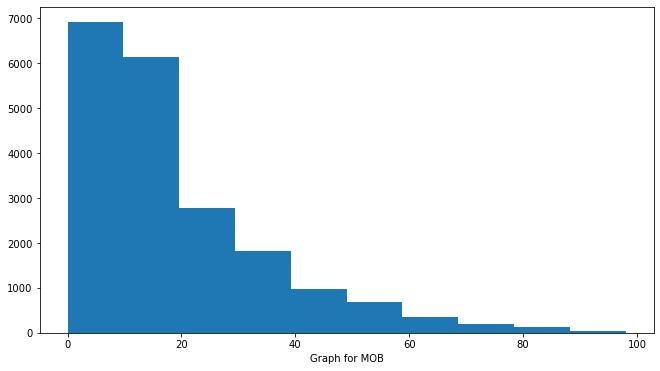

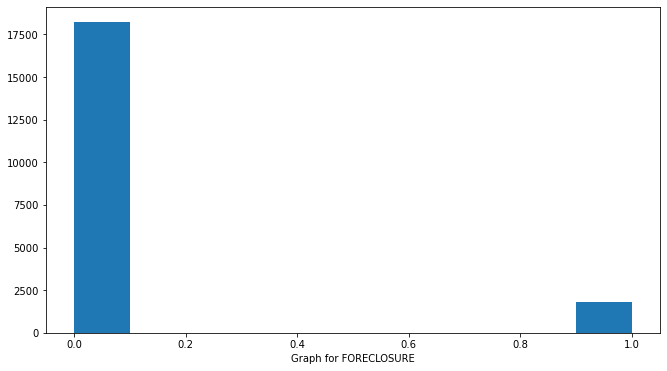

In [192]:
for num in num_list:
    fig,axes=plt.subplots(figsize=(11,6))
    plt.hist(x=num,data=df)
    plt.xlabel('Graph for ' + num)
    plt.show()

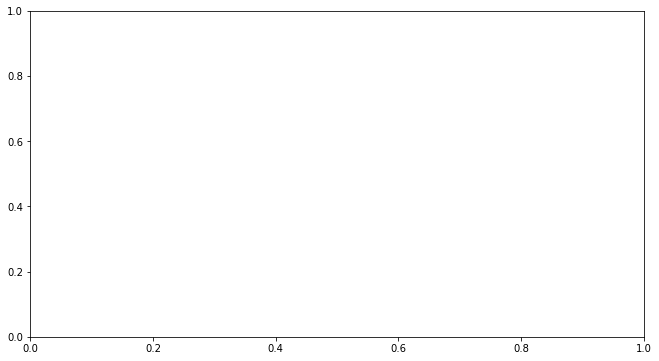

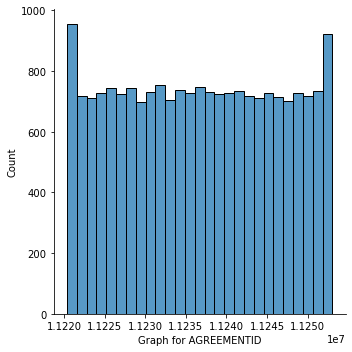

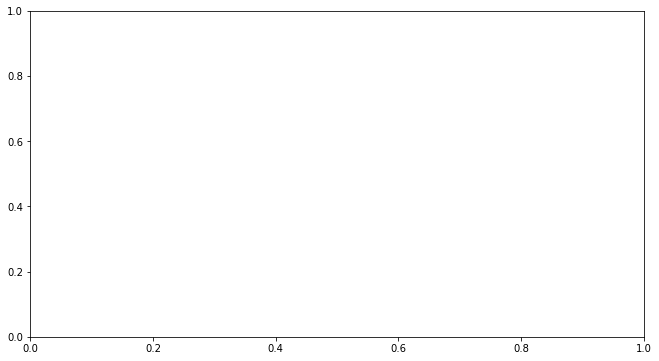

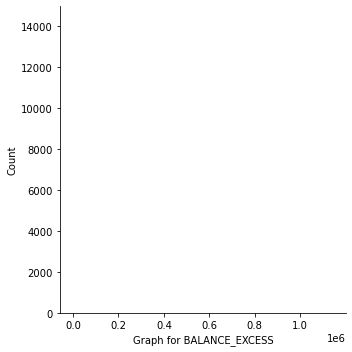

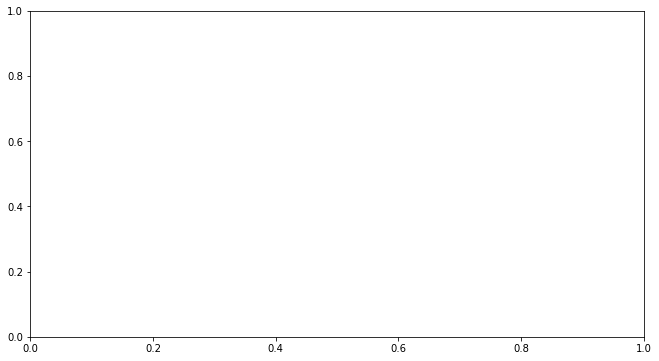

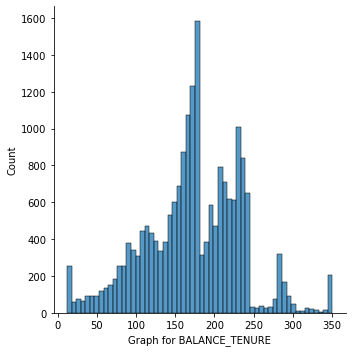

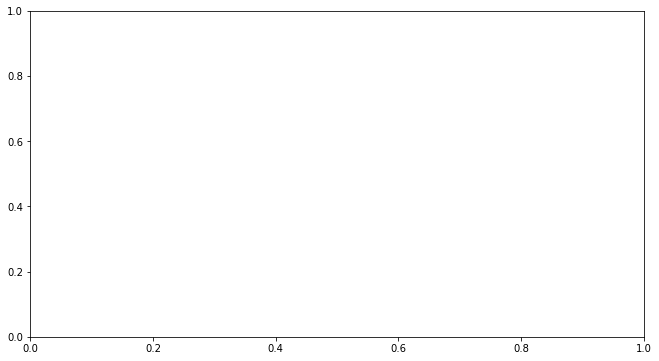

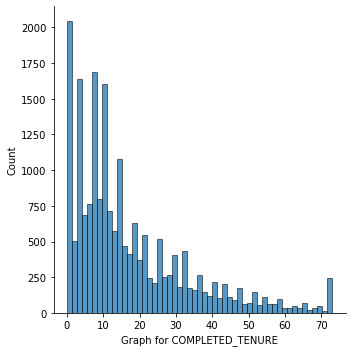

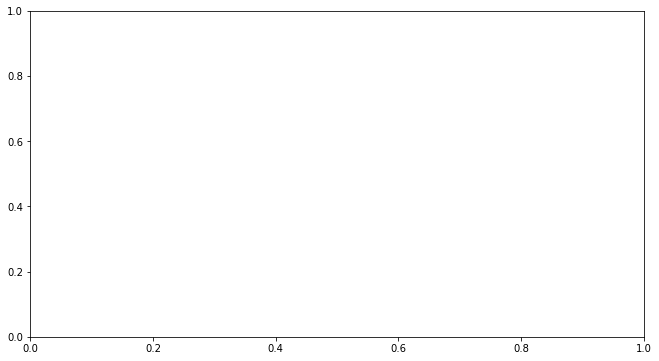

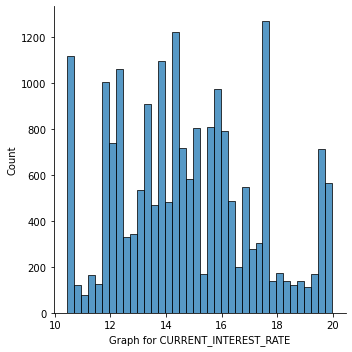

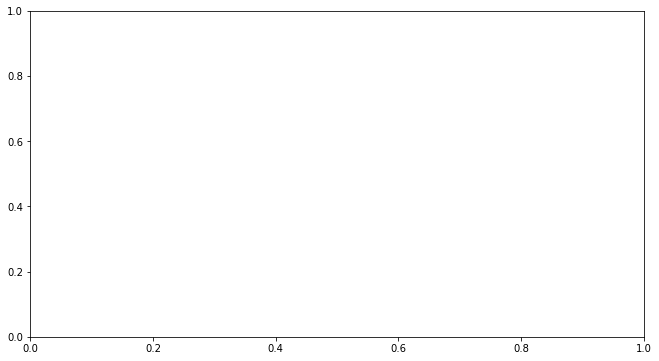

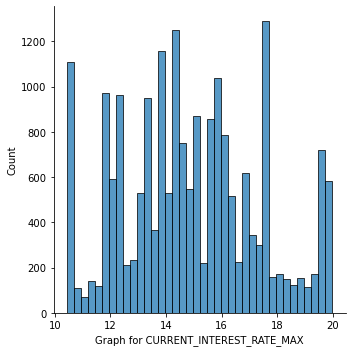

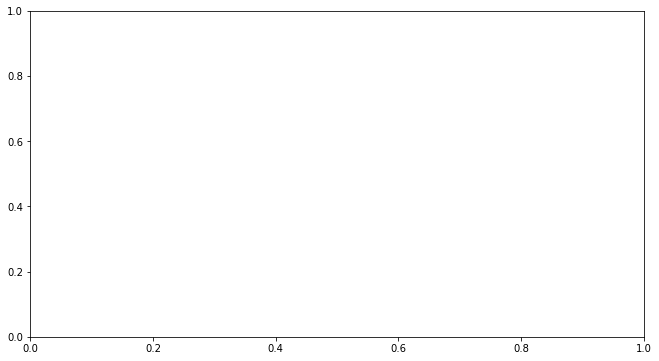

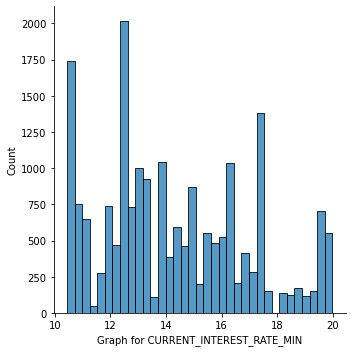

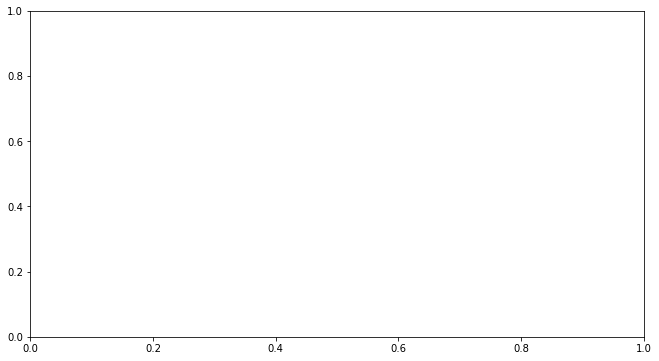

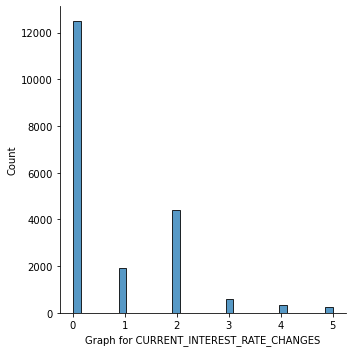

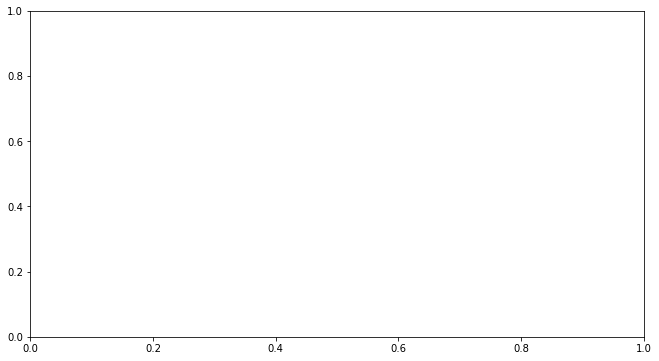

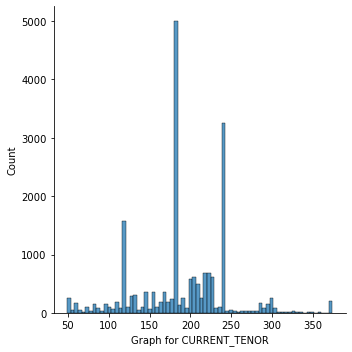

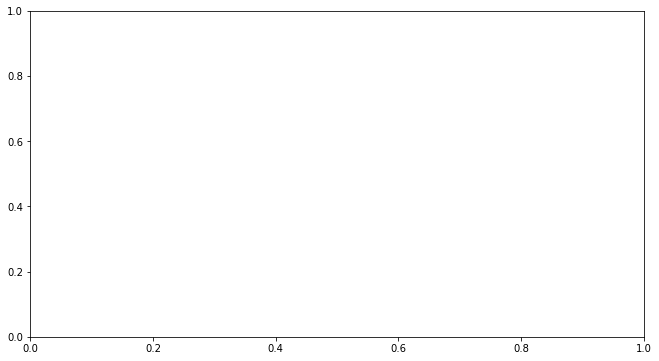

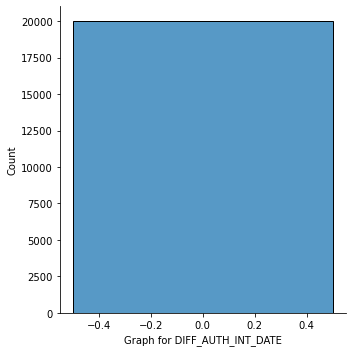

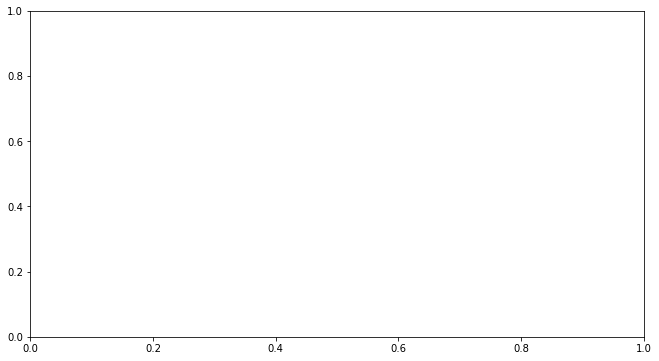

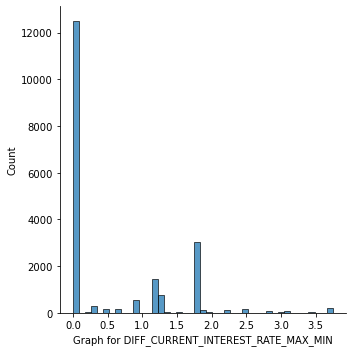

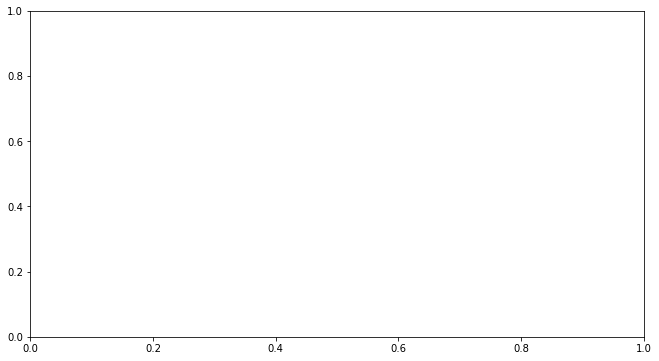

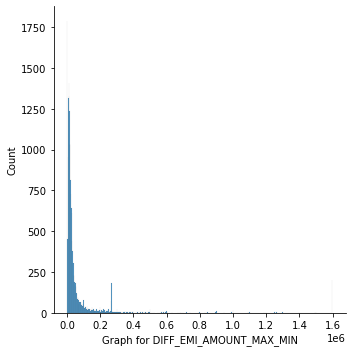

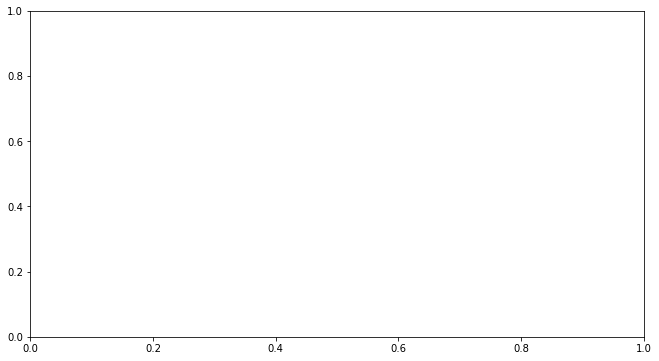

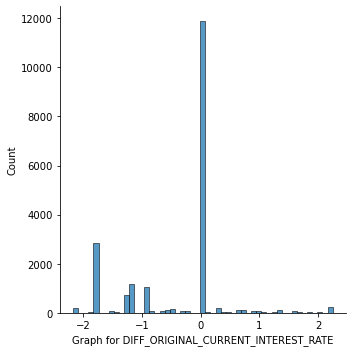

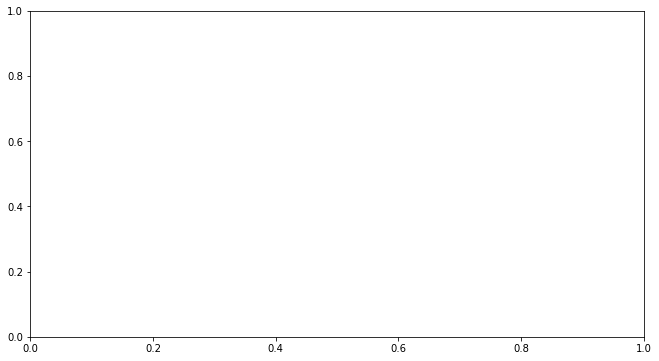

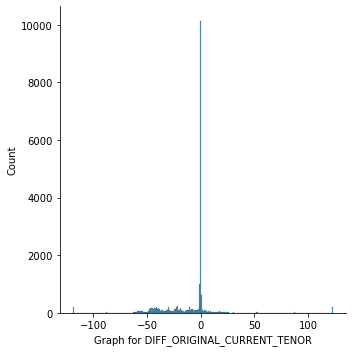

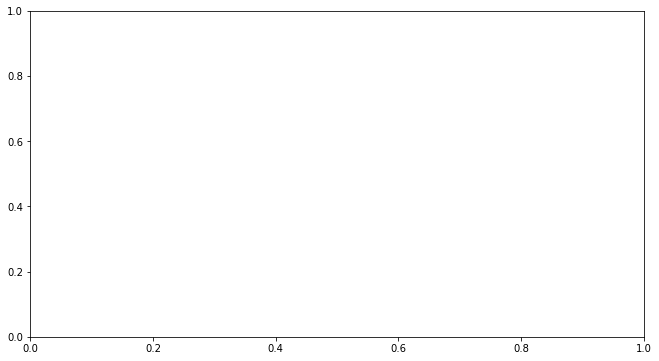

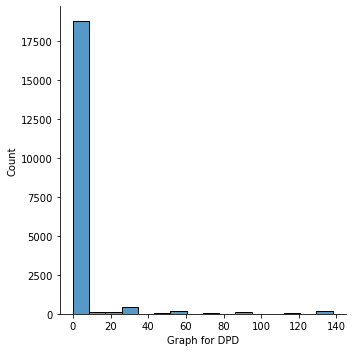

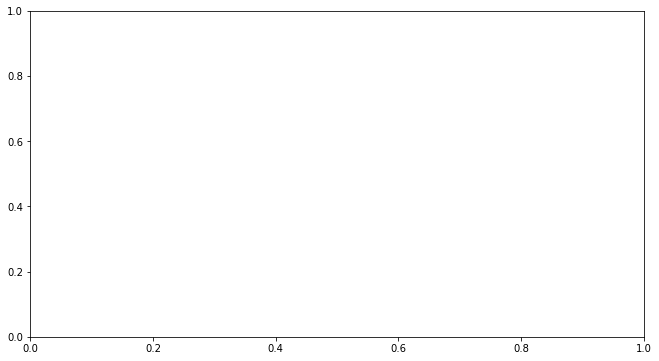

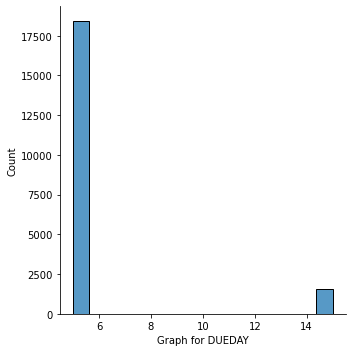

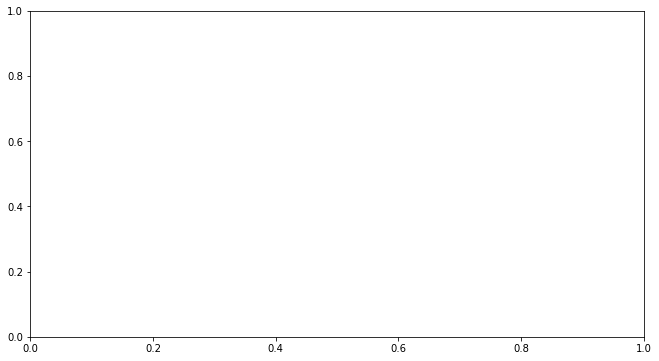

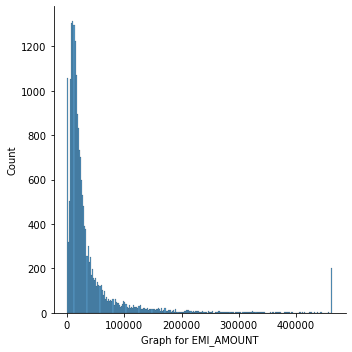

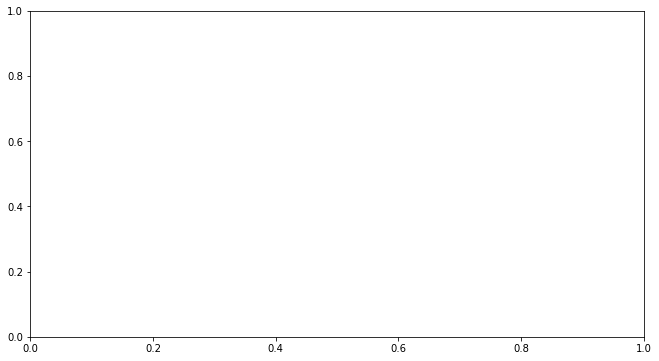

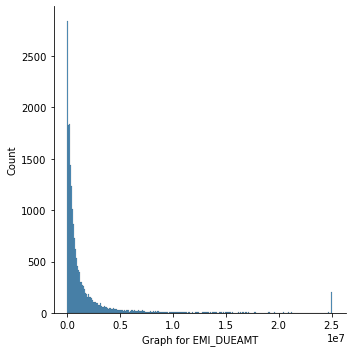

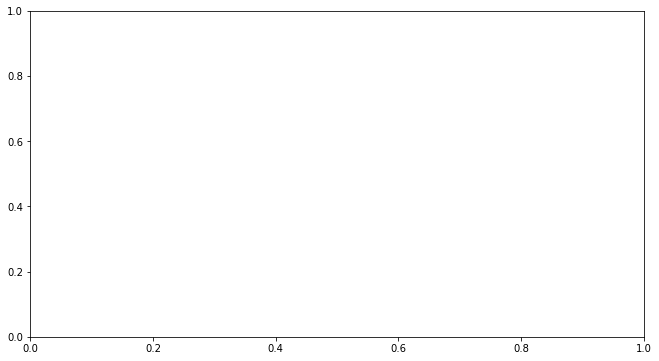

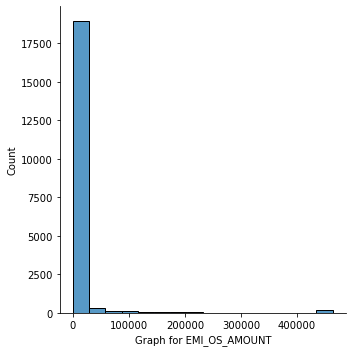

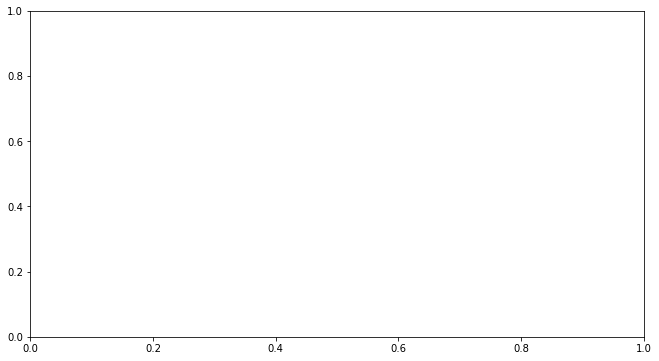

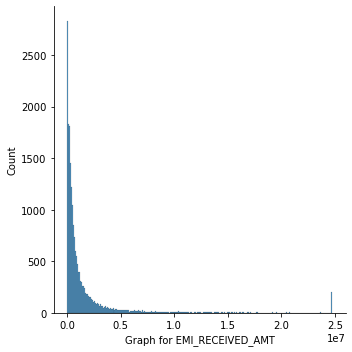

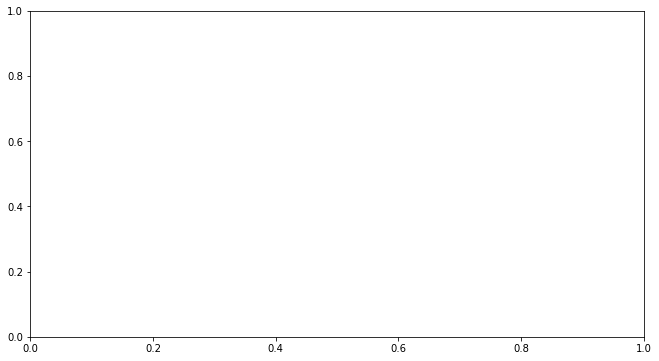

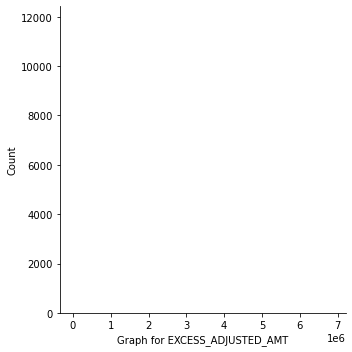

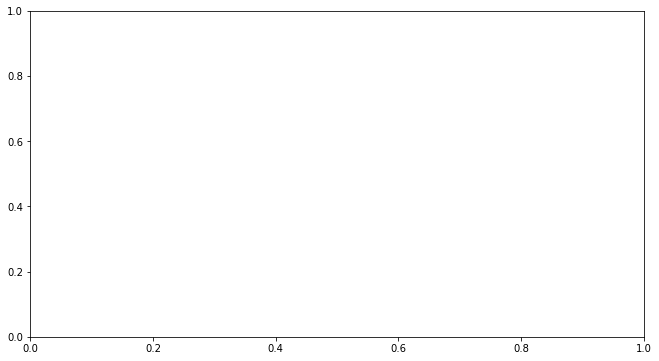

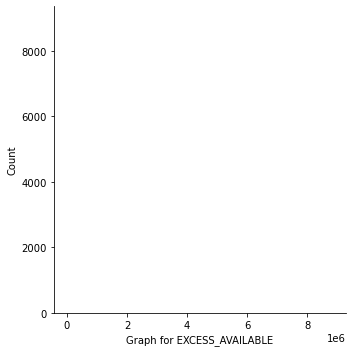

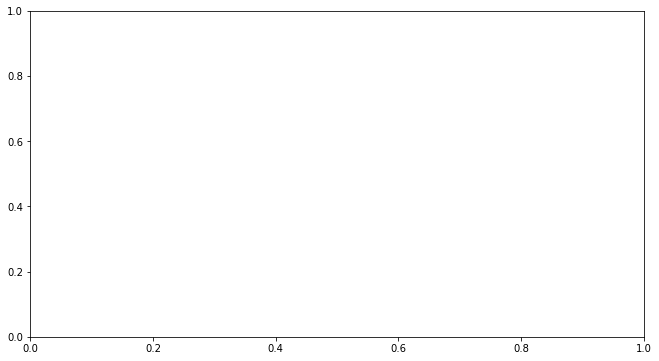

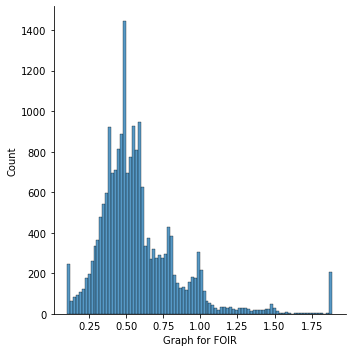

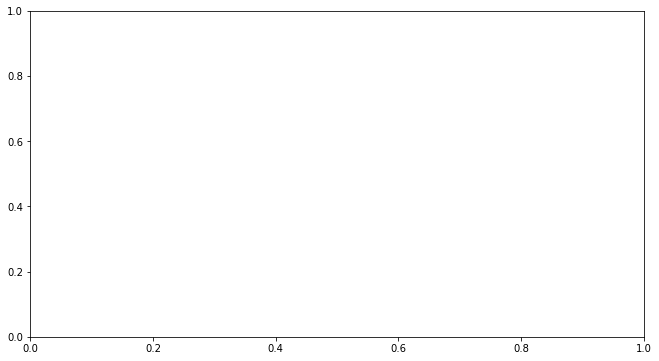

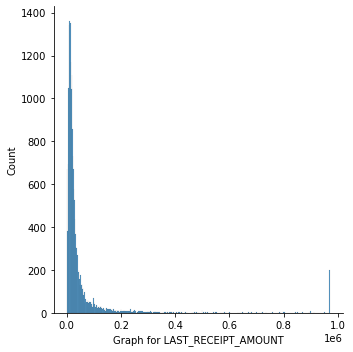

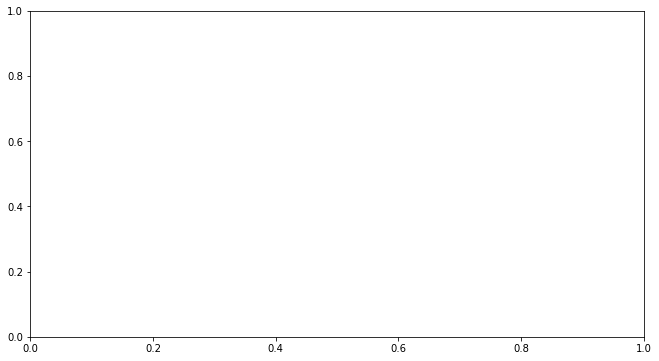

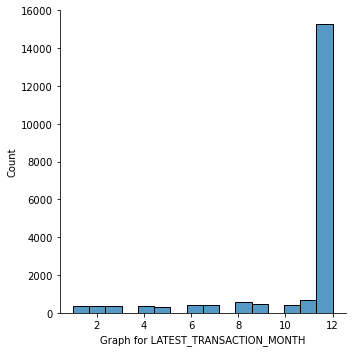

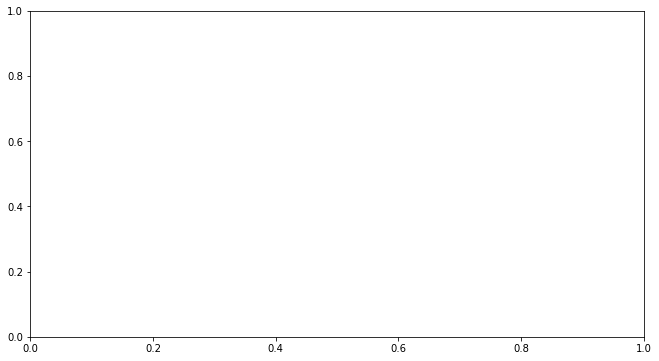

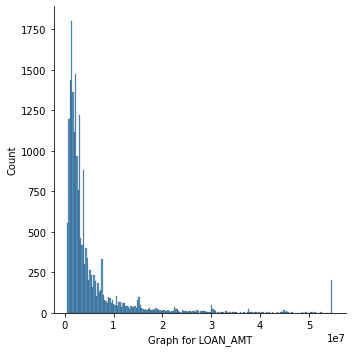

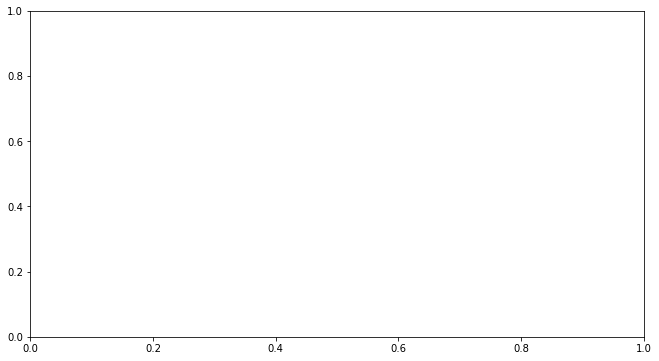

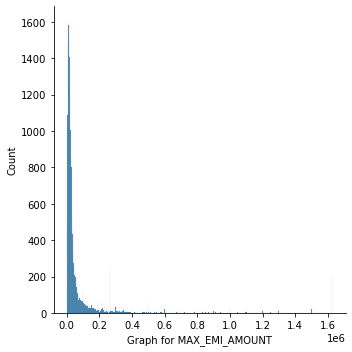

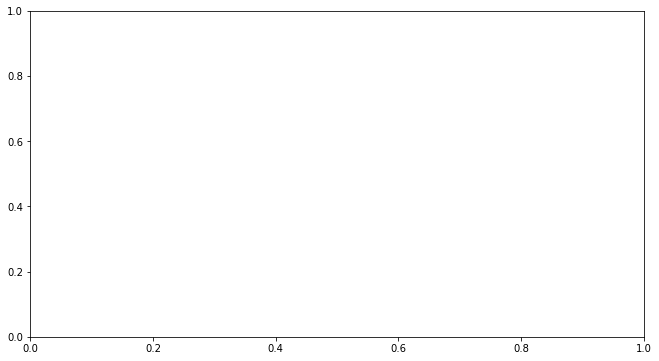

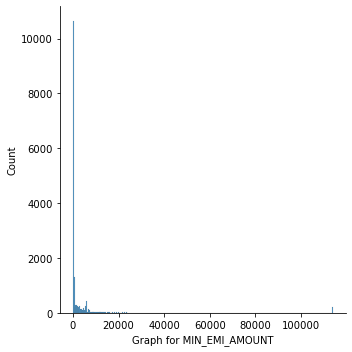

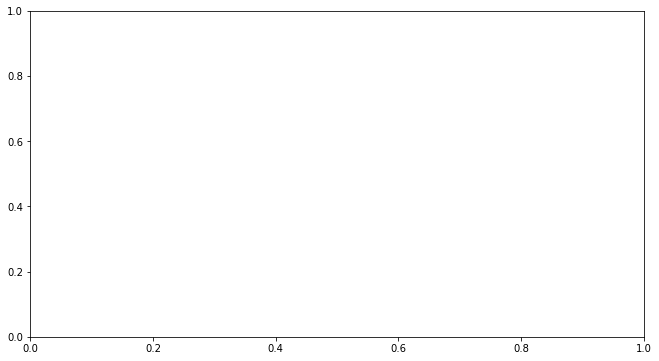

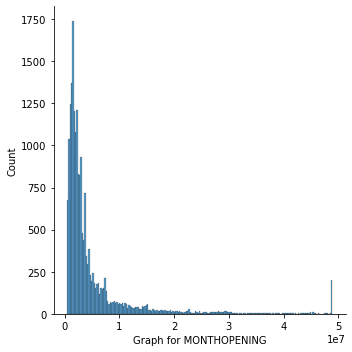

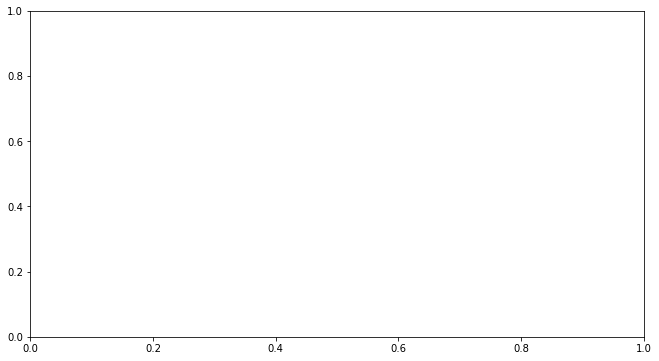

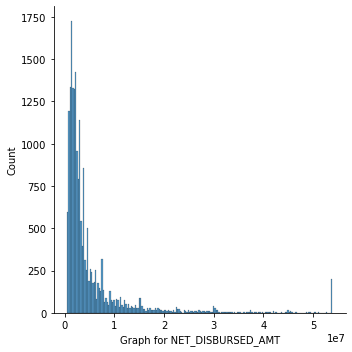

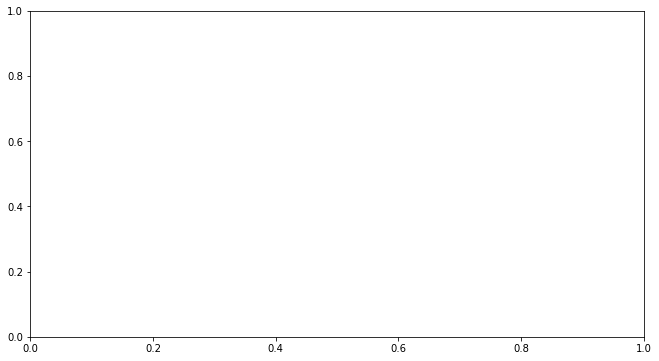

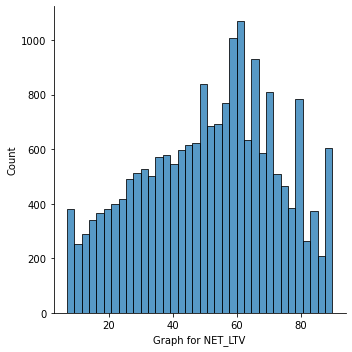

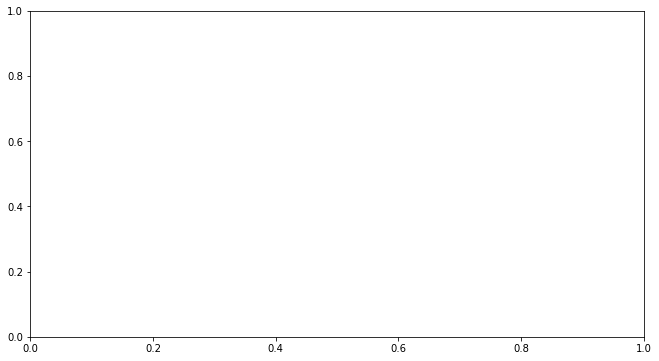

In [ ]:
for num in num_list:
    fig,axes=plt.subplots(figsize=(11,6))
    sns.displot(x=num,data=df2)
    plt.xlabel('Graph for ' + num)
    plt.show()

### 3.2 Bivariate Analysis
    - Numeric(TTest) and Categorical(Chisquare)

In [193]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in cat_list:
    cross_tab = pd.crosstab(df2[cat_variable],df2['FORECLOSURE'], margins=False)
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
num_list1 = df2.columns.difference(['FORECLOSURE','AUTHORIZATIONDATE', 'INTEREST_START_DATE', 'LAST_RECEIPT_DATE','PRODUCT'])
for num_variable in num_list1:
    tstats = stats.ttest_ind(df2[df2['FORECLOSURE']==1][num_variable],df2[df2['FORECLOSURE']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)


  Variable ChiSquare P-Value
0  PRODUCT   2562.02       0 

                          Variable Name T-Statistic       P-Value
0                           AGREEMENTID    -55.2707             0
1                        BALANCE_EXCESS     12.1867   4.82925e-34
2                        BALANCE_TENURE    -7.32338   2.50957e-13
3                      COMPLETED_TENURE     23.2017  1.55428e-117
4                 CURRENT_INTEREST_RATE    0.630413      0.528431
5         CURRENT_INTEREST_RATE_CHANGES     -4.4923   7.08529e-06
6             CURRENT_INTEREST_RATE_MAX     4.05859   4.95574e-05
7             CURRENT_INTEREST_RATE_MIN     7.67754   1.69605e-14
8                         CURRENT_TENOR    -1.47246      0.140911
9                    DIFF_AUTH_INT_DATE         NaN           NaN
10   DIFF_CURRENT_INTEREST_RATE_MAX_MIN    -12.4554   1.76966e-35
11              DIFF_EMI_AMOUNT_MAX_MIN        8.07    7.4237e-16
12  DIFF_ORIGINAL_CURRENT_INTEREST_RATE     19.8459   8.17828e-87
13          DIFF

#### Save the file in excel and sort the pValues to get the significant T-Test variables for the dataset

In [ ]:
from pandas import ExcelWriter
from pandas import ExcelFile

writer = ExcelWriter('/Users/anupamhore/Desktop/CDrive/DS/DataScientist/Tution/pandafiles/LogisticExercise/SV(T_Stats).xlsx')
tstats_df.to_excel(writer,'Sheet1',index=False)
writer.save()

### 3.3 Bivariate Analysis
     - Distribution Plot for the numerical variables compared to Foreclosure(target variable)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


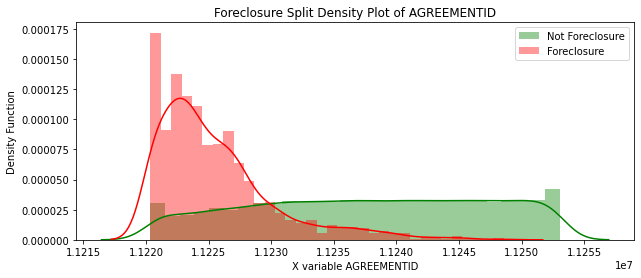

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


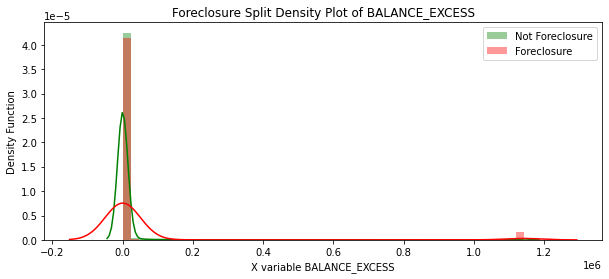

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


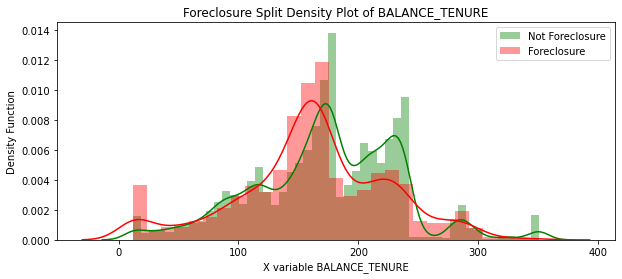

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


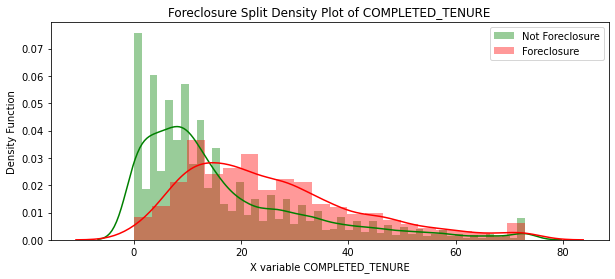

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


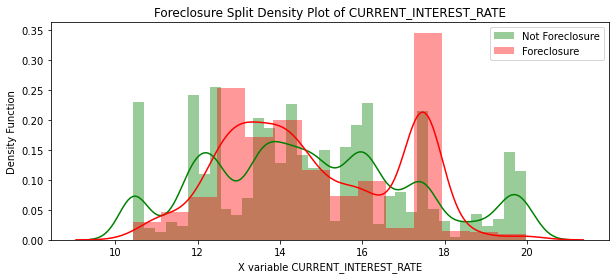

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


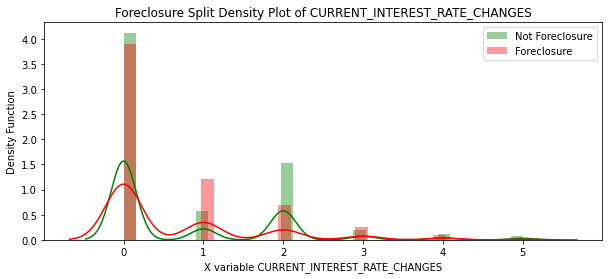

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


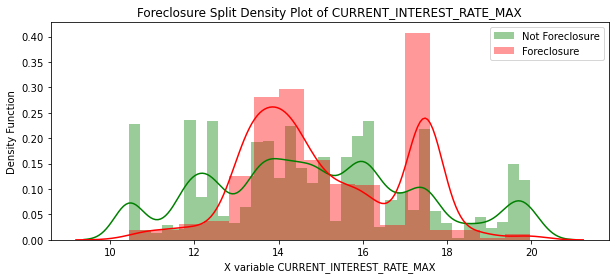

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


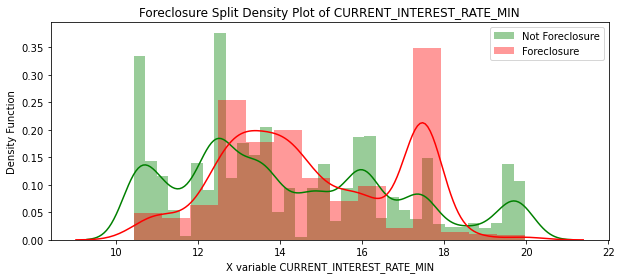

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


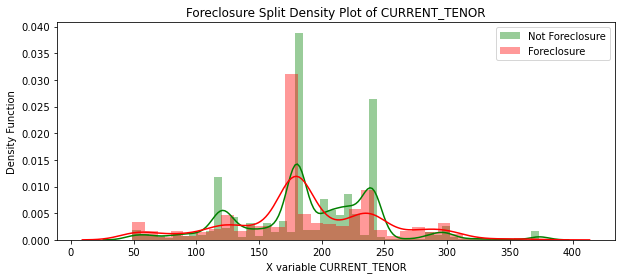

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping 

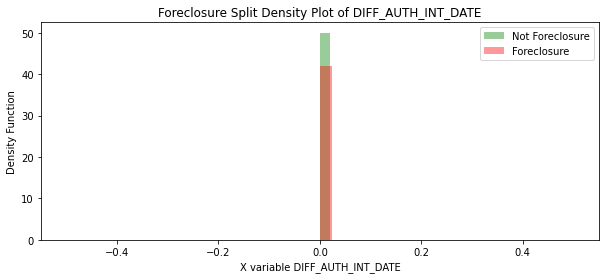

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


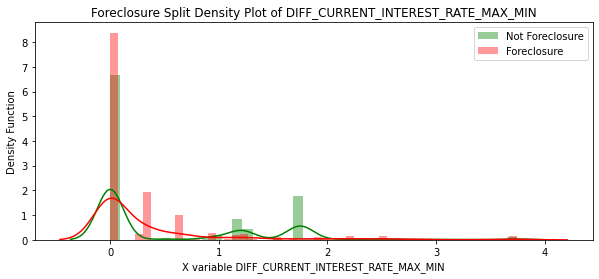

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


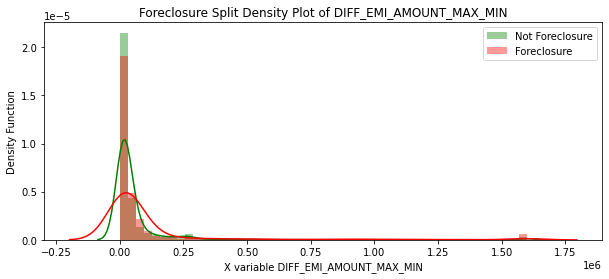

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


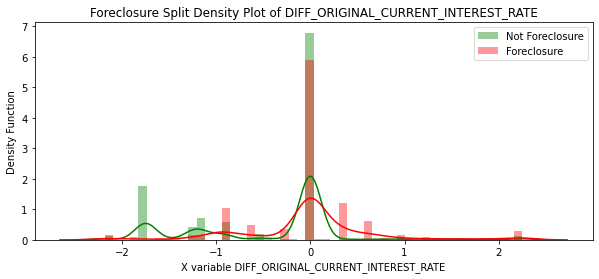

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


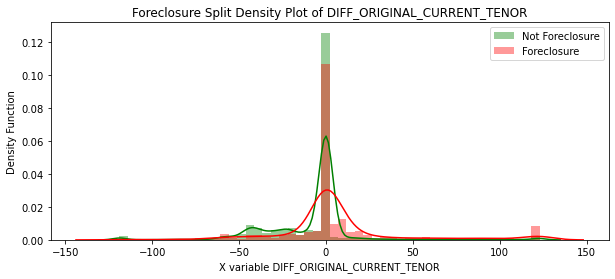

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


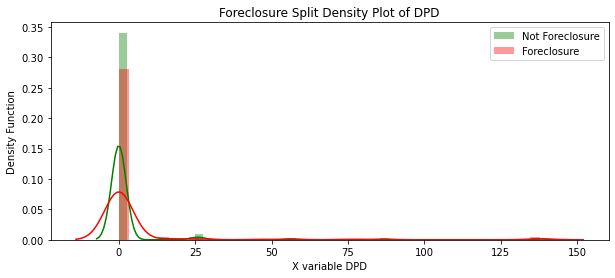

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


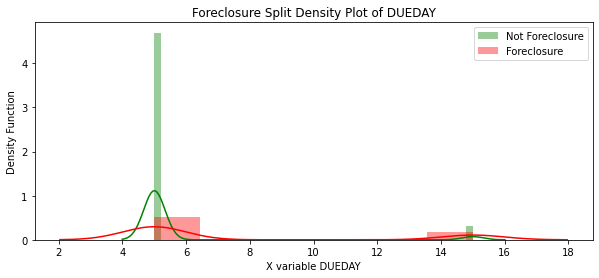

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


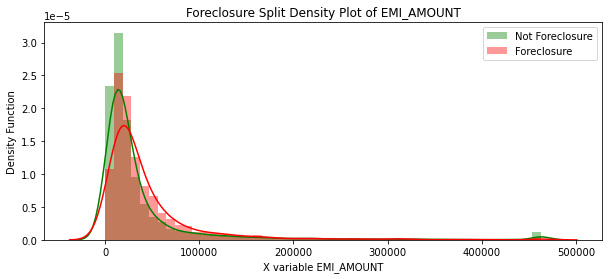

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


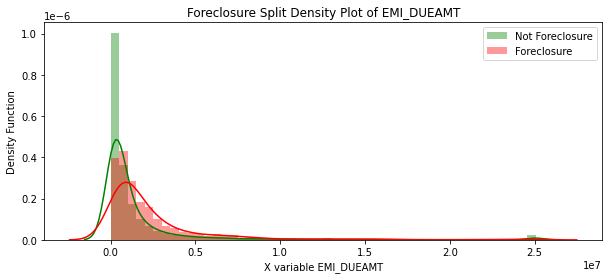

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


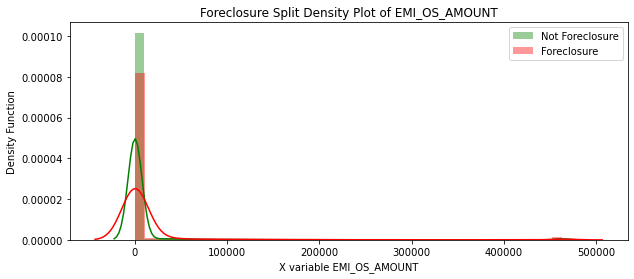

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


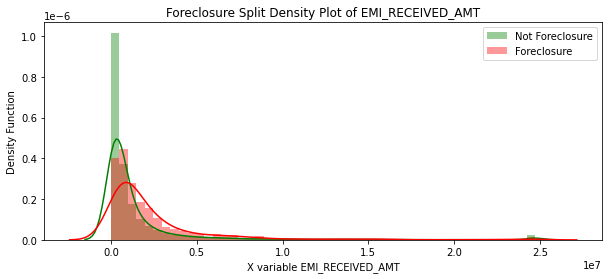

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


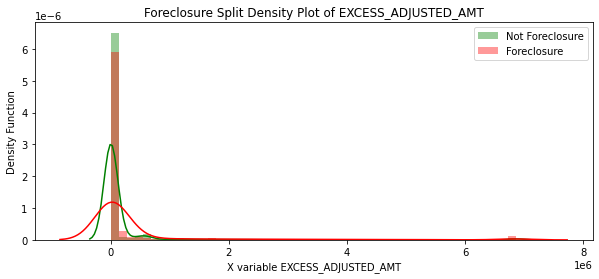

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


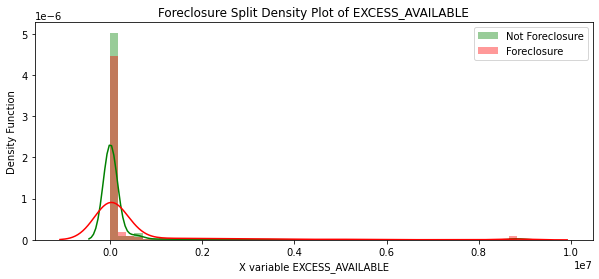

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


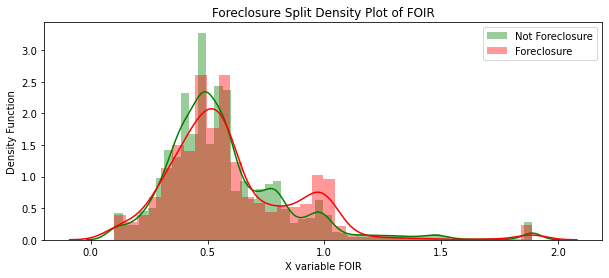

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


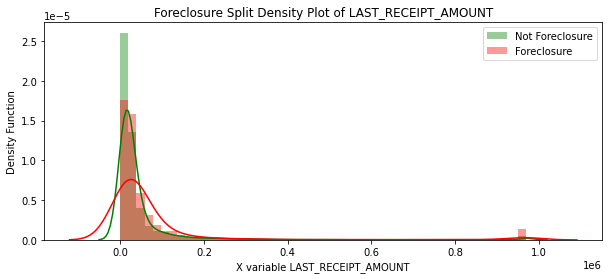

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


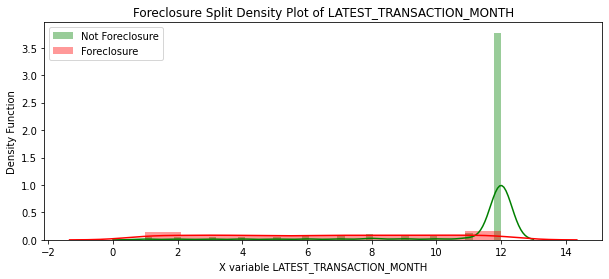

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


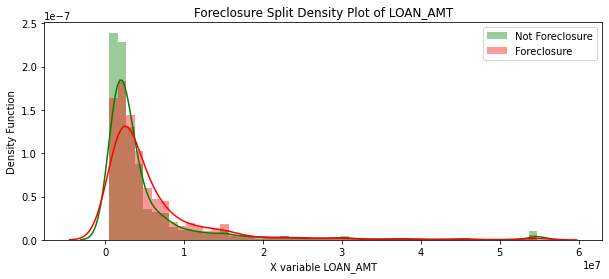

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


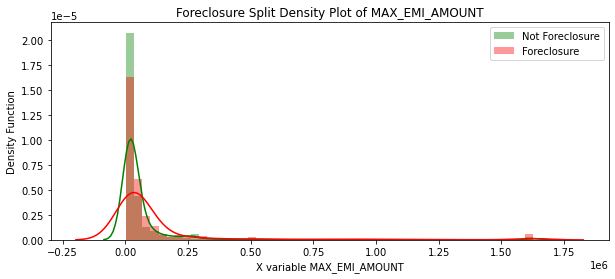

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


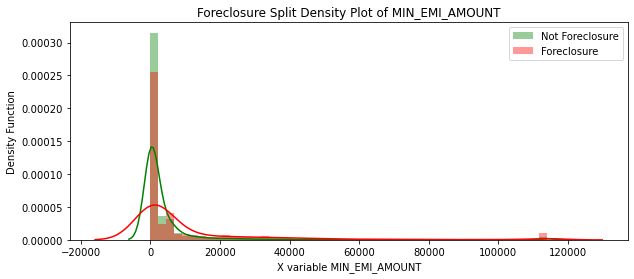

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


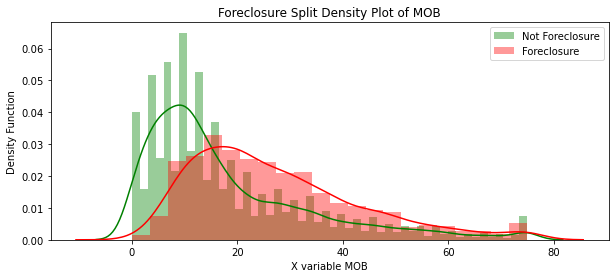

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


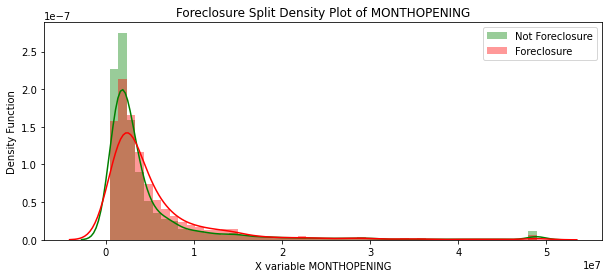

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


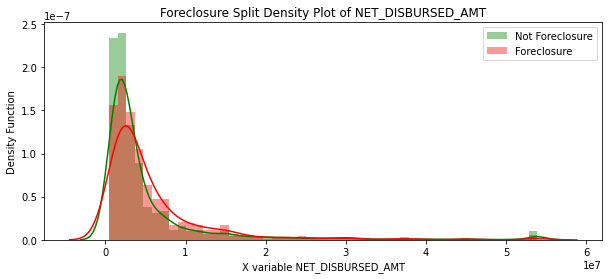

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


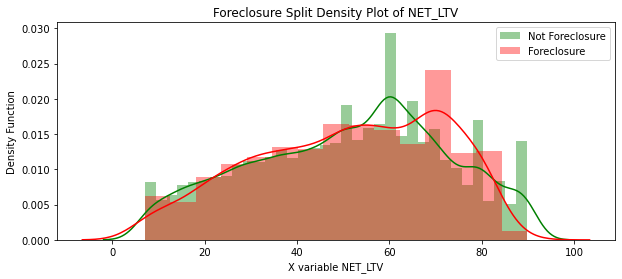

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


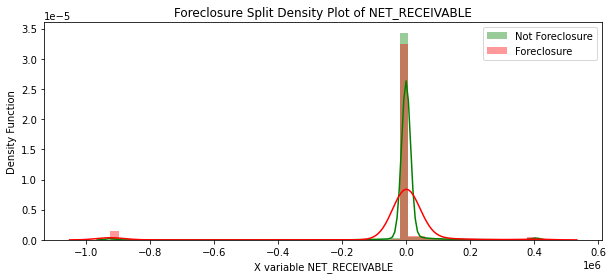

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


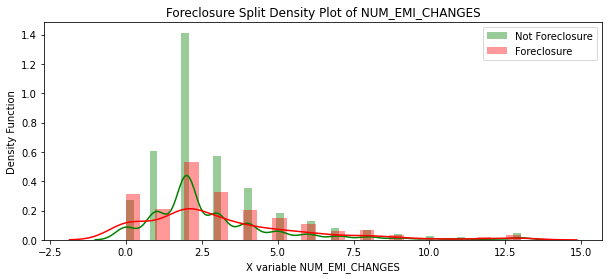

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


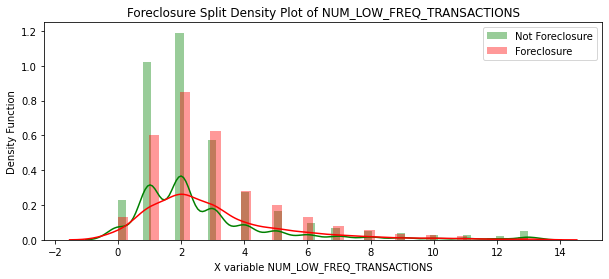

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


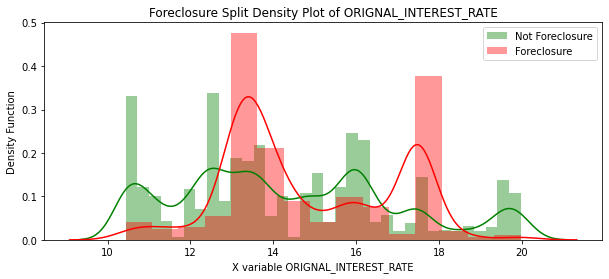

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


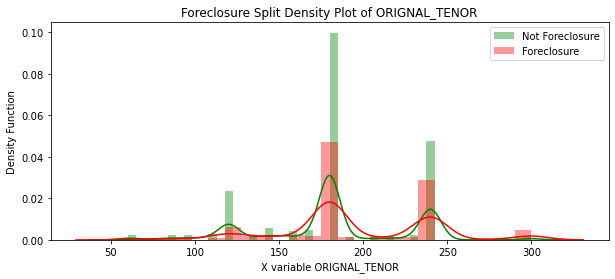

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


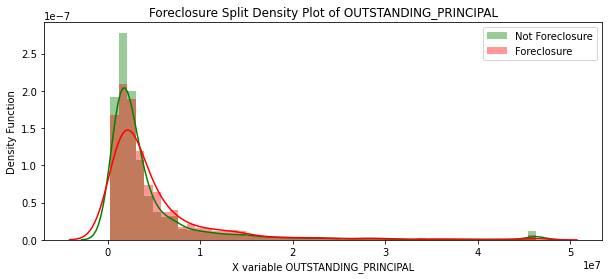

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


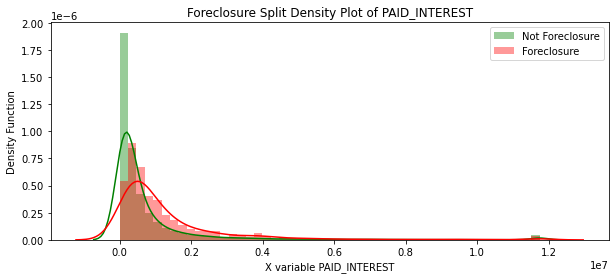

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


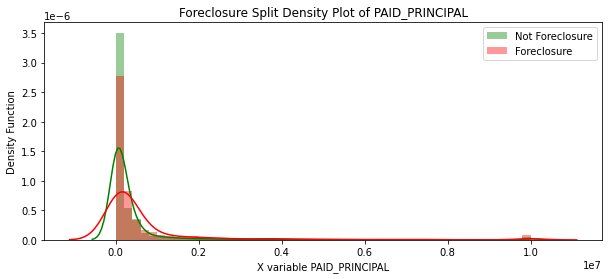

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


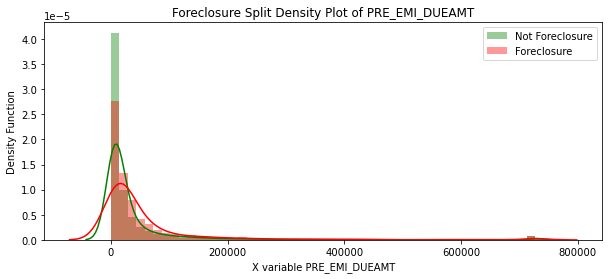

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping 

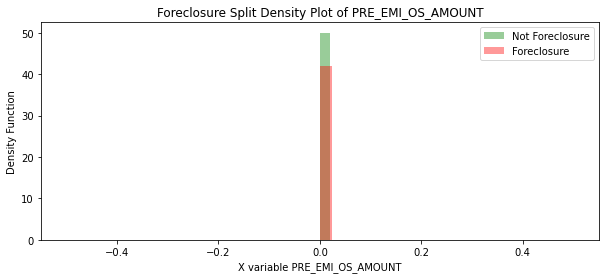

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


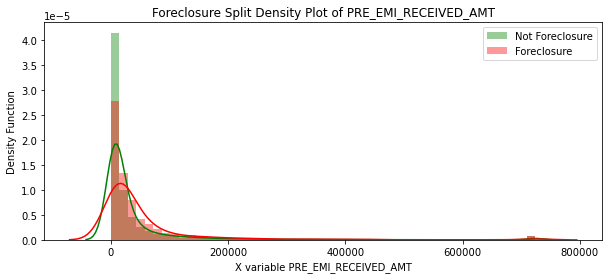

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


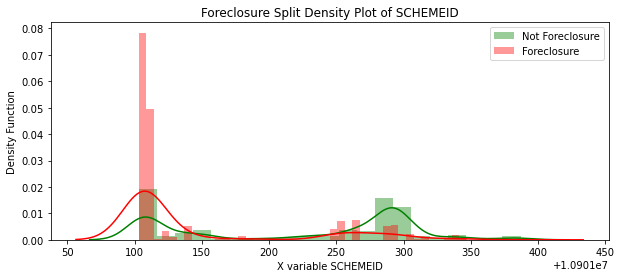

In [18]:
for num_variable in num_list1:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[num_variable], kde=False, color='g', hist=True)
    sns.distplot(df2[df2['FORECLOSURE']==0][num_variable], label='Not Foreclosure', color='g', hist=True, norm_hist=False)
    sns.distplot(df2[df2['FORECLOSURE']==1][num_variable], label='Foreclosure', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Foreclosure Split Density Plot of ')+str(num_variable))
    plt.legend()
    plt.show()

### Analysis from the GRAPH

The following variables seemed significant to explain the Foreclosure happening or not happening in the current dataset.<br>
         <b>BALANCE_TENURE</b><br>
         <b>COMPLETED_TENURE</b><br>
         <b>EMI_RECEIVED_AMT</b><br>
         <b>FOIR</b><br>
         <b>PAID_INTEREST</b><br>
         <b>MOB</b><br>
         <b>COMPLETED_TENURE</b><br>
         <b>LATEST_TRANSACTION_MONTH</b><br>
         <b>EMI_RECEIVED_AMT</b><br>
         <b>EMI_DUEAMT</b><br>
    
Further study need to be done to check the significance for the following variables<br>
         <b>EMI_AMOUNT</b><br>
         <b>LOAN_AMT</b><br>
         <b>PAID_INTEREST</b><br>
         <b>LAST_RECEIPT_AMOUNT</b><br>
    

### Automate Factor plot to check the Foreclosure with the  categorical- numeric variable

In [194]:
def plotPerGraph(colName,df):
    count = df[[colName,'FORECLOSURE']].groupby([colName,'FORECLOSURE']).size()
    per = count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
    per.columns = [colName,'FORECLOSURE','PER']
    return per
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


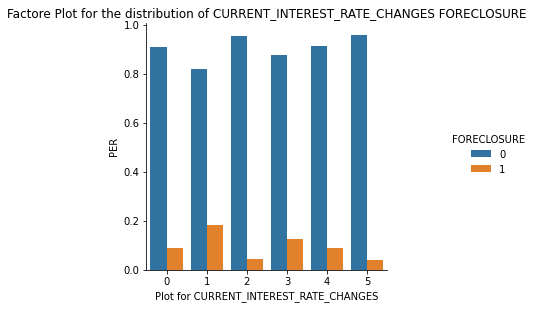

In [195]:
per_features = ['CURRENT_INTEREST_RATE_CHANGES']

for feature in per_features:
    per = plotPerGraph(feature,df2)
    fig,axes = plt.subplots(1,1,figsize=(10,4))
    sns.factorplot(x=feature,y=per['PER'],hue='FORECLOSURE',data=per,size=4,kind='bar')
    plt.xlabel('Plot for ' + str(feature))
    plt.title('Factore Plot for the distribution of ' + str(feature) + ' FORECLOSURE')
    plt.close(1)
    plt.show()

### Check for the categorical data

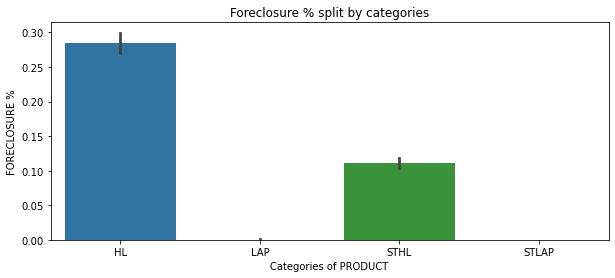

In [196]:
for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=cat_variable,y='FORECLOSURE',data=df2) 
    plt.ylabel('FORECLOSURE %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Foreclosure % split by categories')
    

### For Categorical Variable - Product

- It can be seen from the graph that foreclosure percentage is more for HL product category and somewhat for STHL category
     
- We will bucket the Product data into High and Low since we can see here that LAP and STLAP does not have any major impact on the foreclosre.

- We will do that in the feature engineering below

### 3.4 Variable Transformation: 
    (i) Standard Transformations

In [197]:
df2.isnull().sum()

AGREEMENTID                            0
BALANCE_EXCESS                         0
BALANCE_TENURE                         0
COMPLETED_TENURE                       0
CURRENT_INTEREST_RATE                  0
CURRENT_INTEREST_RATE_MAX              0
CURRENT_INTEREST_RATE_MIN              0
CURRENT_INTEREST_RATE_CHANGES          0
CURRENT_TENOR                          0
DIFF_AUTH_INT_DATE                     0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN     0
DIFF_EMI_AMOUNT_MAX_MIN                0
DIFF_ORIGINAL_CURRENT_INTEREST_RATE    0
DIFF_ORIGINAL_CURRENT_TENOR            0
DPD                                    0
DUEDAY                                 0
EMI_AMOUNT                             0
EMI_DUEAMT                             0
EMI_OS_AMOUNT                          0
EMI_RECEIVED_AMT                       0
EXCESS_ADJUSTED_AMT                    0
EXCESS_AVAILABLE                       0
FOIR                                   0
LAST_RECEIPT_AMOUNT                    0
LATEST_TRANSACTI

#### Let's convert the following variables to check if any transformation is required.


In [198]:
list_of_transform_var = ['DUEDAY','LATEST_TRANSACTION_MONTH','MOB','COMPLETED_TENURE',
                         'EMI_RECEIVED_AMT','PAID_INTEREST','MAX_EMI_AMOUNT','EMI_AMOUNT','EMI_DUEAMT'
                         ,'LOAN_AMT','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','MIN_EMI_AMOUNT',
                         'ORIGNAL_TENOR','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','EXCESS_AVAILABLE','BALANCE_EXCESS',
                         'LAST_RECEIPT_AMOUNT','NET_RECEIVABLE',
                         'PAID_PRINCIPAL','DIFF_EMI_AMOUNT_MAX_MIN','CURRENT_INTEREST_RATE_MIN','BALANCE_TENURE',
                         'ORIGNAL_INTEREST_RATE','PRE_EMI_RECEIVED_AMT','PRE_EMI_DUEAMT',
                         'NUM_LOW_FREQ_TRANSACTIONS','NUM_EMI_CHANGES',
                         'CURRENT_INTEREST_RATE_CHANGES','CURRENT_INTEREST_RATE_MAX','EMI_OS_AMOUNT','FOIR',
                         'DPD','NET_DISBURSED_AMT','MONTHOPENING','CURRENT_TENOR','CURRENT_INTEREST_RATE','NET_LTV',
                         'OUTSTANDING_PRINCIPAL',''
                         'EXCESS_ADJUSTED_AMT','FORECLOSURE']


df_transform = df2[list_of_transform_var].copy()
squared = (df_transform**2).add_suffix("_squared")
square_root = (df_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(df_transform+1).add_suffix("_ln")
df_transform = pd.concat([df_transform, squared, square_root, natural_log], axis=1)
df_transform.drop(['FORECLOSURE_squared','FORECLOSURE_ln','FORECLOSURE_sqrt'], axis=1, inplace=True)
df_transform.head()


<ipython-input-198-d19ae6a81580>:18: RuntimeWarning: invalid value encountered in log
  natural_log = np.log(df_transform+1).add_suffix("_ln")


DUEDAY  LATEST_TRANSACTION_MONTH  MOB  COMPLETED_TENURE  EMI_RECEIVED_AMT  \
0       5                       5.0   45                45      8.439420e+06   
1       5                      11.0   38                38      1.033958e+07   
2       5                       8.0   75                73      4.670211e+06   
3       5                       5.0   75                73      1.306732e+07   
4       5                       4.0   75                73      1.048923e+07   

   PAID_INTEREST  MAX_EMI_AMOUNT  EMI_AMOUNT    EMI_DUEAMT      LOAN_AMT  ...  \
0   2.725723e+06       1000000.0     83559.0  8.614898e+06  1.171011e+07  ...   
1   4.945154e+06        126530.0    126530.0  1.061903e+07  1.929025e+07  ...   
2   2.990124e+06        500000.0     22878.0  4.670211e+06  3.933395e+06  ...   
3   4.648994e+06       1500000.0     65741.0  1.313098e+07  1.002259e+07  ...   
4   6.593778e+06         54433.0     54433.0  1.048923e+07  7.755937e+06  ...   

   EMI_OS_AMOUNT_ln   FOIR_ln  DPD_ln  NET_DISBURSED_AMT_ln  MONTHOPENING_ln  \
0         12.075273  0.470004     0.0             16.275963        15.978095   
1         12.540575  0.470004     0.0             16.775111        16.656844   
2          0.000000  0.542324     0.0             15.185014        15.135887   
3         11.061316  0.470004     0.0             16.120352        15.564341   
4          0.000000  0.604316     0.0             15.863969        15.789682   

   CURRENT_TENOR_ln  CURRENT_INTEREST_RATE_ln  NET_LTV_ln  \
0          3.912023                  2.668750    3.715034   
1          4.927254                  2.690163    4.446292   
2          5.746203                  2.809818    3.949126   
3          4.521789                  2.504462    4.450036   
4          5.720312                  2.771502    3.463859   

   OUTSTANDING_PRINCIPAL_ln  EXCESS_ADJUSTED_AMT_ln  
0                 12.388955               12.271804  
1                 16.328972                0.000000  
2                 14.912182               13.980785  
3                 12.388955               15.728137  
4                 15.789682               11.697071  

[5 rows x 157 columns]

In [199]:
llf_df = pd.DataFrame()
for num_variable in df_transform.columns.difference(['FORECLOSURE']):
    logreg = sm.logit(formula = str('FORECLOSURE ~ ')+str(num_variable), data=df_transform)
    result = logreg.fit()
    temp = pd.DataFrame([num_variable, result.llf]).T
    temp.columns = ['Variable Name','Log-Likelihood Full']
    llf_df = pd.concat([llf_df, temp], axis=0)

llf_df

Optimization terminated successfully.
         Current function value: 0.299418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.301823
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299999
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299285
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300504
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300186
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300352
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300717
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.290680
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282936
  

Variable Name Log-Likelihood Full
0                 BALANCE_EXCESS            -5991.95
0              BALANCE_EXCESS_ln            -6040.09
0            BALANCE_EXCESS_sqrt            -6003.58
0         BALANCE_EXCESS_squared            -5989.29
0                 BALANCE_TENURE            -6013.69
..                           ...                 ...
0         PRE_EMI_DUEAMT_squared            -6039.31
0           PRE_EMI_RECEIVED_AMT             -6027.5
0        PRE_EMI_RECEIVED_AMT_ln            -5981.68
0      PRE_EMI_RECEIVED_AMT_sqrt            -5994.41
0   PRE_EMI_RECEIVED_AMT_squared            -6039.29

[156 rows x 2 columns]

#### Variables which require transformation are:
    
    EMI_AMOUNT                              ->    EMI_AMOUNT_ln
    LOAN_AMT                                ->    LOAN_AMT_ln
    MAX_EMI_AMOUNT                          ->    MAX_EMI_AMOUNT_ln
    PAID_INTEREST                           ->    PAID_INTEREST_ln
    COMPLETED_TENURE                        ->    COMPLETED_TENURE_ln
    EMI_DUEAMT                              ->    EMI_DUEAMT_ln
    EMI_RECEIVED_AMT                        ->    EMI_RECEIVED_AMT_ln
    LATEST_TRANSACTION_MONTH                ->    LATEST_TRANSACTION_MONTH_squared
    BALANCE_EXCESS                          ->    BALANCE_EXCESS_squared
    DIFF_ORIGINAL_CURRENT_INTEREST_RATE     ->    DIFF_ORIGINAL_CURRENT_INTEREST_RATE_sqrt
    EXCESS_ADJUSTED_AMT                     ->    EXCESS_ADJUSTED_AMT_sqrt
    EXCESS_AVAILABLE                        ->    EXCESS_AVAILABLE_sqrt
    MIN_EMI_AMOUNT                          ->    MIN_EMI_AMOUNT_ln
    ORIGNAL_TENOR                           ->    ORIGNAL_TENOR_squared
    BALANCE_TENURE                          ->    BALANCE_TENURE_ln       
    CURRENT_INTEREST_RATE_MIN               ->    CURRENT_INTEREST_RATE_MIN_ln
    LAST_RECEIPT_AMOUNT                     ->    LAST_RECEIPT_AMOUNT_sqrt
    NET_RECEIVABLE                          ->    NET_RECEIVABLE_sqrt
    ORIGNAL_INTEREST_RATE                   ->    ORIGNAL_INTEREST_RATE_ln
    PAID_PRINCIPAL                          ->    PAID_PRINCIPAL_ln
    PRE_EMI_DUEAMT                          ->    PRE_EMI_DUEAMT_ln
    PRE_EMI_RECEIVED_AMT                    ->    PRE_EMI_RECEIVED_AMT_ln
    CURRENT_INTEREST_RATE_CHANGES           ->    CURRENT_INTEREST_RATE_CHANGES_squared
    CURRENT_INTEREST_RATE_MAX               ->    CURRENT_INTEREST_RATE_MAX_ln
    CURRENT_INTEREST_RATE                   ->    CURRENT_INTEREST_RATE
    CURRENT_TENOR                           ->    CURRENT_TENOR_ln
    EMI_OS_AMOUNT                           ->    EMI_OS_AMOUNT_ln
    MONTHOPENING                            ->    MONTHOPENING_ln
    NET_DISBURSED_AMT                       ->    NET_DISBURSED_AMT_ln
    NET_LTV                                 ->    NET_LTV_squared
    NUM_EMI_CHANGES                         ->    NUM_EMI_CHANGES_squared
    NUM_LOW_FREQ_TRANSACTIONS               ->    NUM_LOW_FREQ_TRANSACTIONS_ln
    OUTSTANDING_PRINCIPAL                   ->    OUTSTANDING_PRINCIPAL_ln

#### Again perform the t-Test for the transformed Numerical Variables and find significant variables

    

In [25]:
# Select the most significant transformed variables and perform the T-Test
selected_variables=['EMI_AMOUNT_ln','LOAN_AMT_ln','MAX_EMI_AMOUNT_ln','PAID_INTEREST_ln',
                   'COMPLETED_TENURE_ln','EMI_DUEAMT_ln','EMI_RECEIVED_AMT_ln','LATEST_TRANSACTION_MONTH_squared',
                   'BALANCE_EXCESS_squared','DIFF_ORIGINAL_CURRENT_INTEREST_RATE_sqrt','EXCESS_ADJUSTED_AMT_sqrt',
                   'EXCESS_AVAILABLE_sqrt','MIN_EMI_AMOUNT_ln','ORIGNAL_TENOR_squared','BALANCE_TENURE_ln',
                   'CURRENT_INTEREST_RATE_MIN_ln','LAST_RECEIPT_AMOUNT_sqrt','NET_RECEIVABLE_sqrt',
                    'ORIGNAL_INTEREST_RATE_ln','PAID_PRINCIPAL_ln','PRE_EMI_DUEAMT_ln','PRE_EMI_RECEIVED_AMT_ln',
                    'CURRENT_INTEREST_RATE_CHANGES_squared','CURRENT_INTEREST_RATE_MAX_ln','CURRENT_TENOR_ln',
                    'EMI_OS_AMOUNT_ln','MONTHOPENING_ln','NET_DISBURSED_AMT_ln','NET_LTV_squared',
                    'NUM_EMI_CHANGES_squared','NUM_LOW_FREQ_TRANSACTIONS_ln','OUTSTANDING_PRINCIPAL_ln'
                     ,'DUEDAY','MOB','DIFF_CURRENT_INTEREST_RATE_MAX_MIN',
                    'DIFF_EMI_AMOUNT_MAX_MIN','FOIR','DPD','CURRENT_INTEREST_RATE','FORECLOSURE'
                   ]
test_var = df_transform[selected_variables]

tstats_df = pd.DataFrame()
num_list1 = test_var.columns.difference(['FORECLOSURE'])
for num_variable in num_list1:
    tstats = stats.ttest_ind(test_var[test_var['FORECLOSURE']==1][num_variable],test_var[test_var['FORECLOSURE']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

                               Variable Name T-Statistic       P-Value
0                     BALANCE_EXCESS_squared     12.6948   8.76334e-37
1                          BALANCE_TENURE_ln    -8.62335   6.97886e-18
2                        COMPLETED_TENURE_ln     25.7741  3.87641e-144
3                      CURRENT_INTEREST_RATE    0.630413      0.528431
4      CURRENT_INTEREST_RATE_CHANGES_squared    -4.50983   6.52494e-06
5               CURRENT_INTEREST_RATE_MAX_ln      5.5228   3.37793e-08
6               CURRENT_INTEREST_RATE_MIN_ln     9.18071   4.68879e-20
7                           CURRENT_TENOR_ln    -2.82373    0.00475156
8         DIFF_CURRENT_INTEREST_RATE_MAX_MIN    -12.4554   1.76966e-35
9                    DIFF_EMI_AMOUNT_MAX_MIN        8.07    7.4237e-16
10  DIFF_ORIGINAL_CURRENT_INTEREST_RATE_sqrt         NaN           NaN
11                                       DPD      3.0237    0.00250017
12                                    DUEDAY     31.4802  2.39828e-212
13    

In [ ]:
writer = ExcelWriter('/Users/anupamhore/Desktop/CDrive/DS/DataScientist/Tution/pandafiles/LogisticExercise/SV1(T_Stats).xlsx')
tstats_df.to_excel(writer,'Sheet1',index=False)
writer.save()

### Comparing with the p_Values before transformation and after transformation we find the following variables that actually requires transformation

    1.  PAID_INTEREST          -> PAID_INTEREST_ln
    2.  EMI_DUEAMT             -> EMI_DUEAMT_ln
    3.  EMI_RECEIVED_AMT       -> EMI_RECEIVED_AMT_ln
    4.  PAID_PRINCIPAL         -> PAID_PRINCIPAL_ln
    5.  MAX_EMI_AMOUNT         -> MAX_EMI_AMOUNT_ln
    6.  EMI_AMOUNT             -> EMI_AMOUNT_ln
    7.  PRE_EMI_RECEIVED_AMT   -> PRE_EMI_RECEIVED_AMT_ln
    8.  PRE_EMI_DUEAMT         -> PRE_EMI_DUEAMT_ln
    9.  NET_DISBURSED_AMT      -> NET_DISBURSED_AMT_ln
    10. LOAN_AMT               -> LOAN_AMT_ln
    11. MONTHOPENING           -> MONTHOPENING_ln
    12. OUTSTANDING_PRINCIPAL  -> OUTSTANDING_PRINCIPAL_ln
    13. CURRENT_TENOR          -> CURRENT_TENOR_ln
    14. NET_LTV                -> NET_LTV_squared

### 3.5 Variable Transformation: (ii) Bucketing
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-26-2a5846888c02>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes = plt.subplots(figsize=(10,4))
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = geta

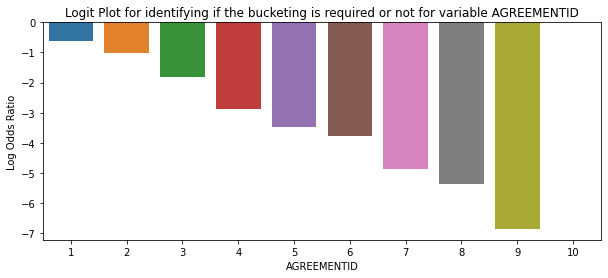

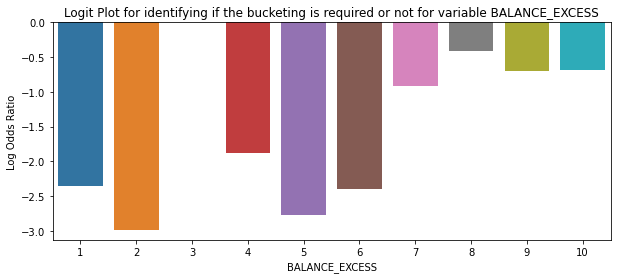

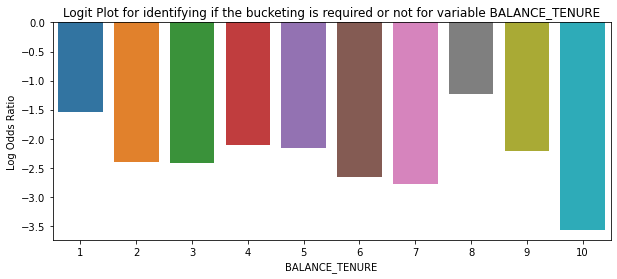

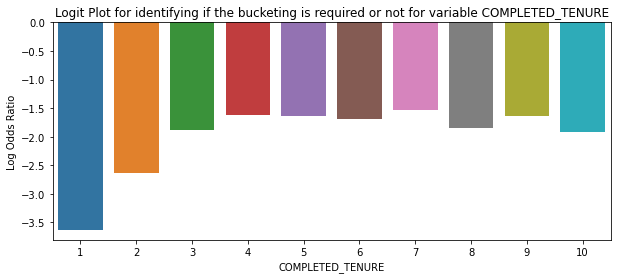

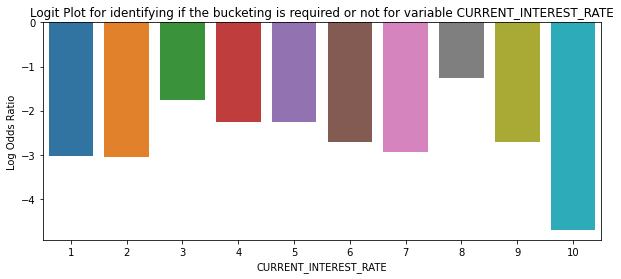

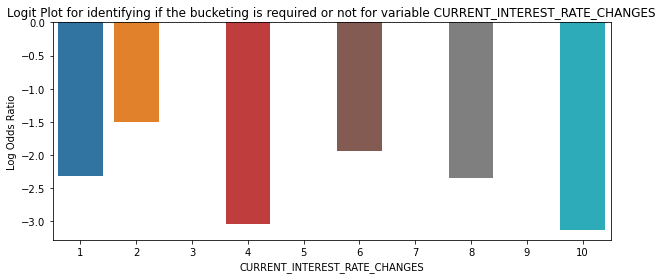

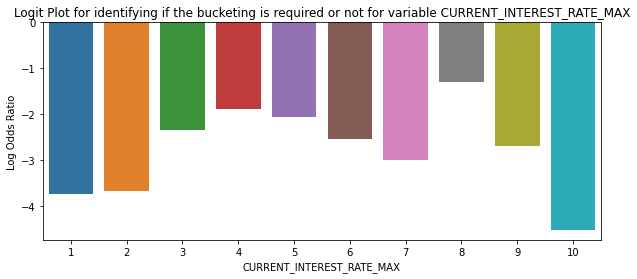

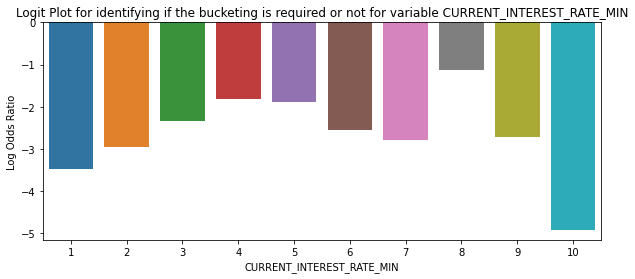

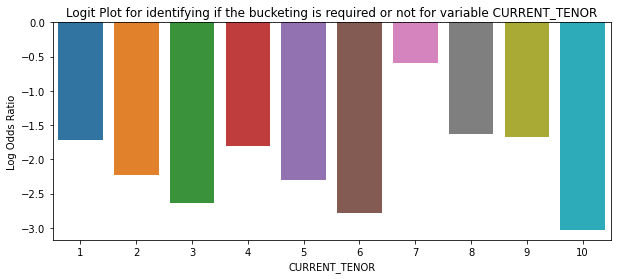

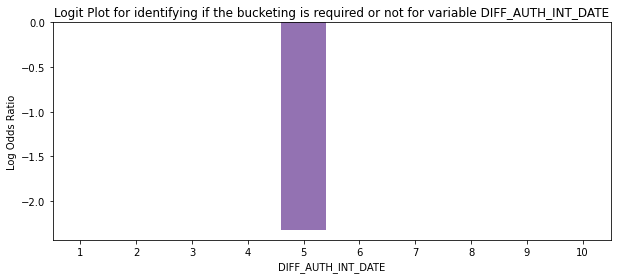

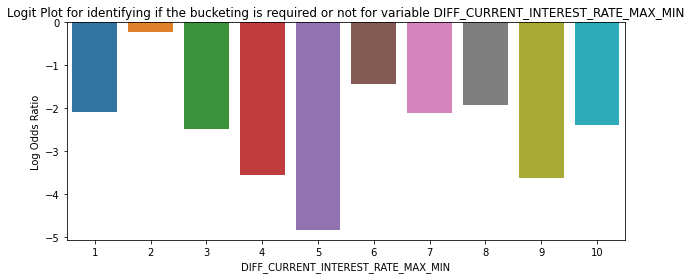

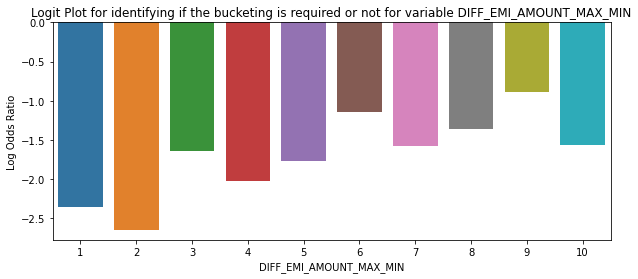

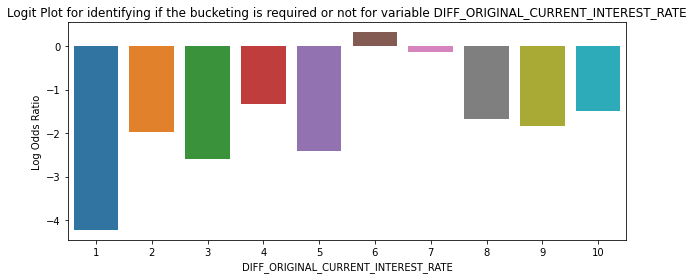

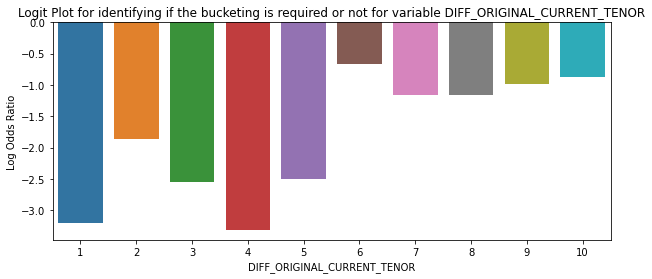

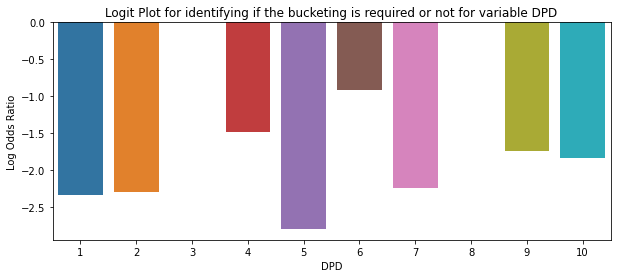

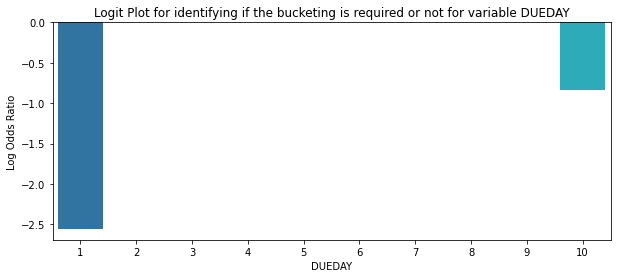

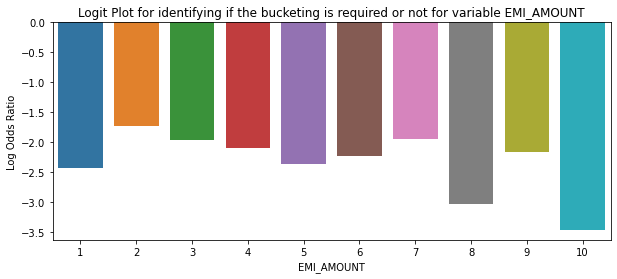

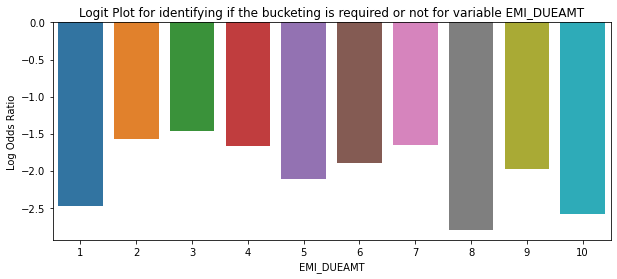

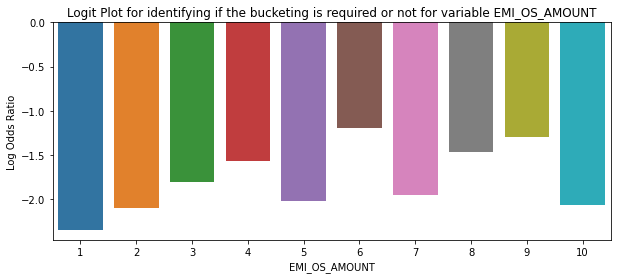

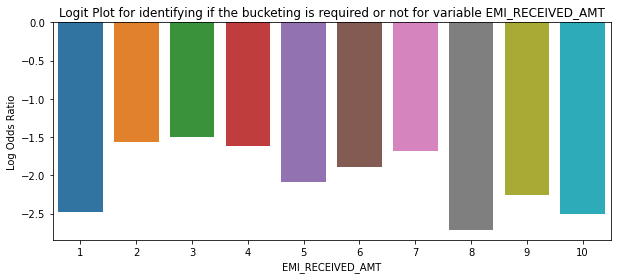

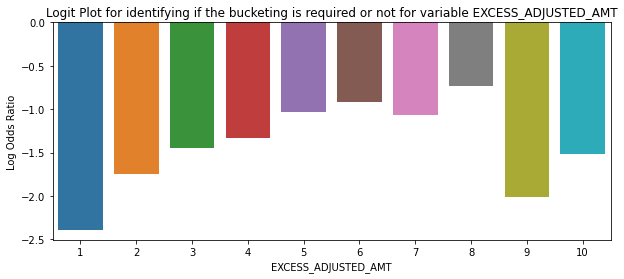

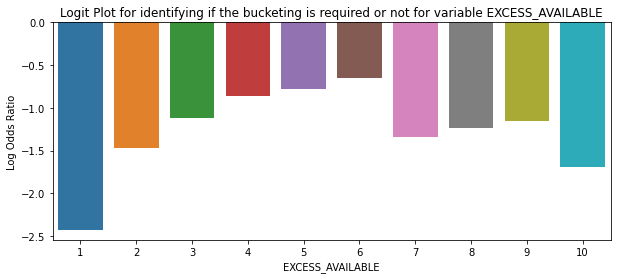

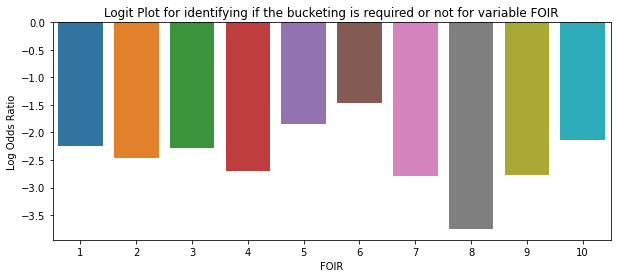

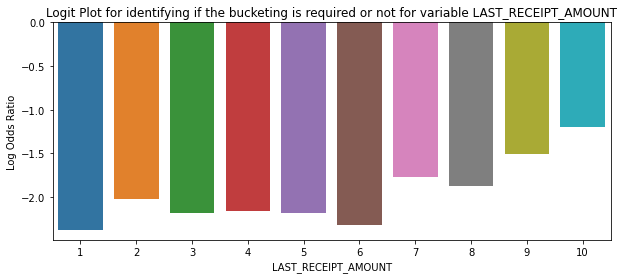

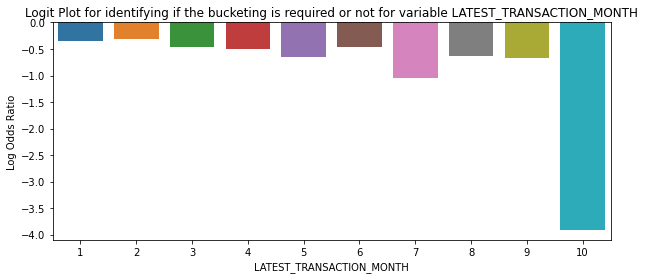

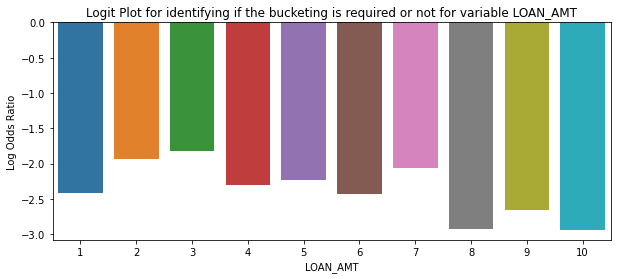

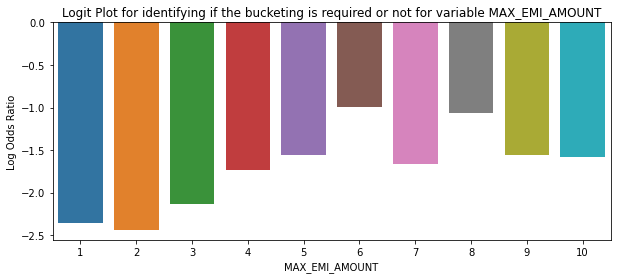

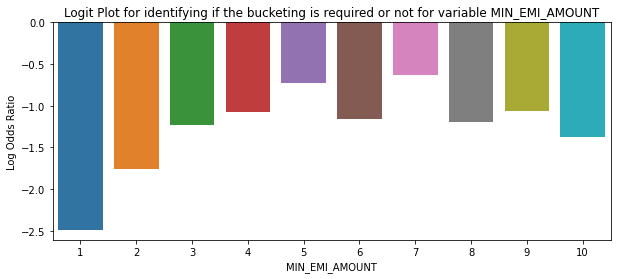

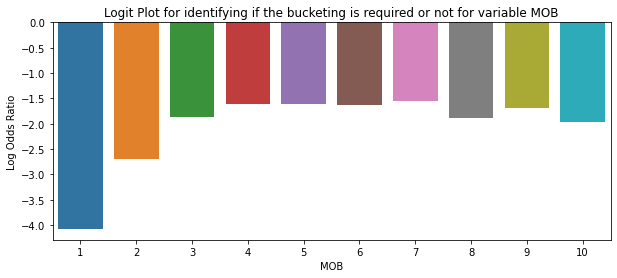

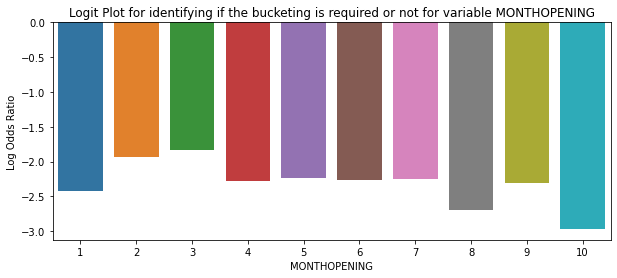

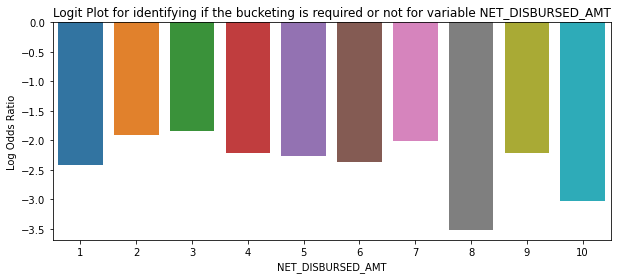

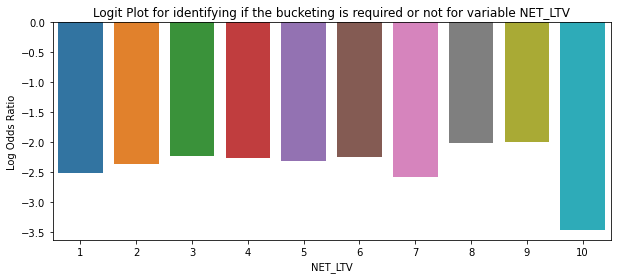

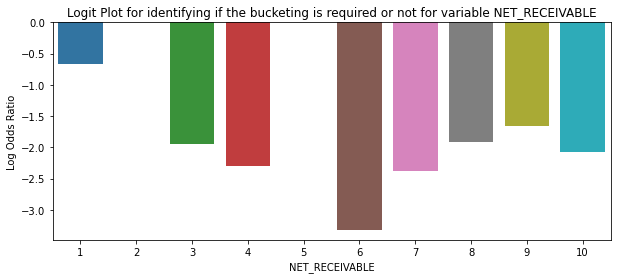

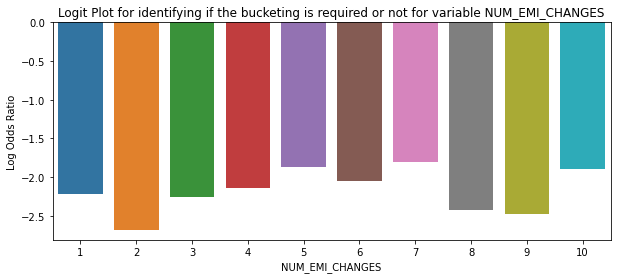

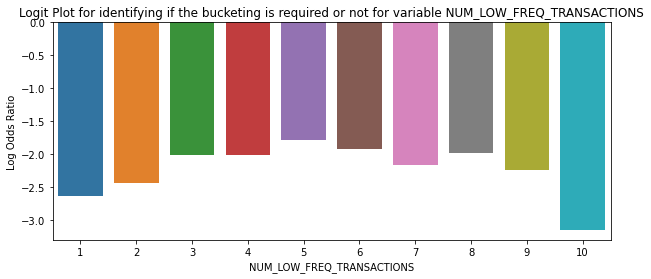

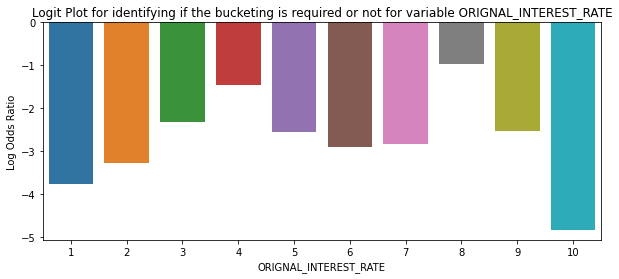

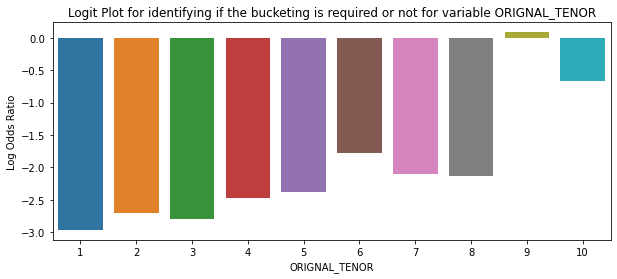

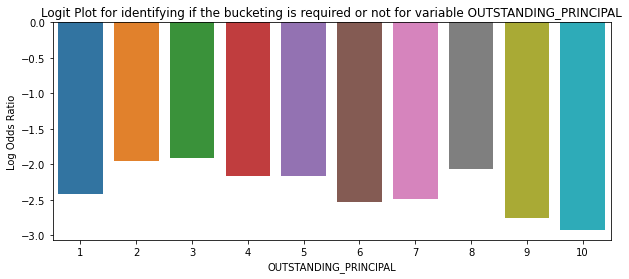

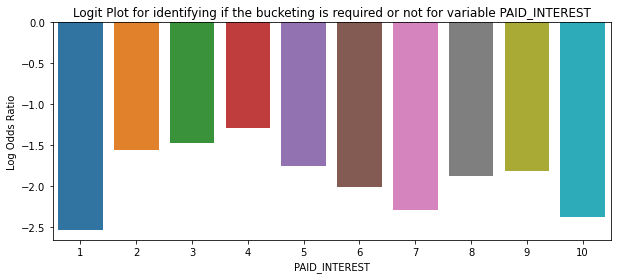

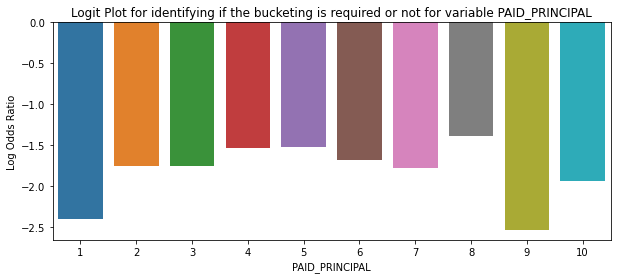

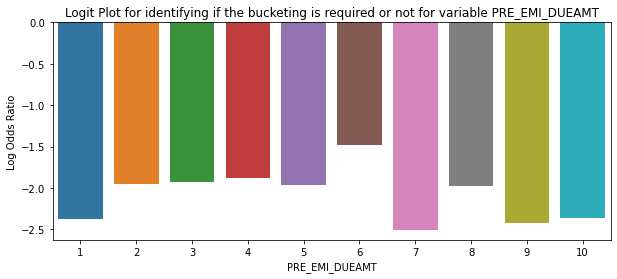

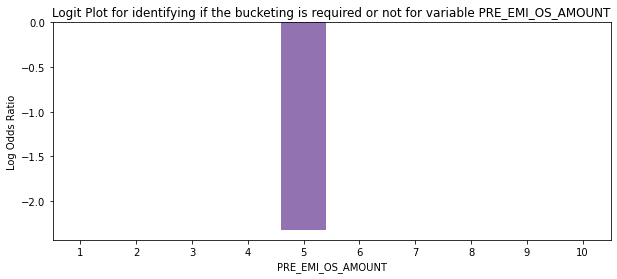

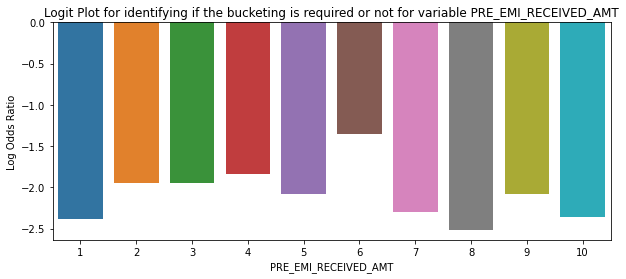

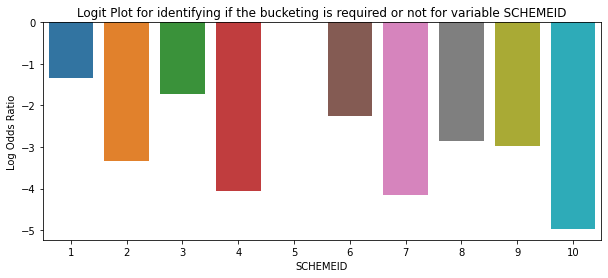

In [26]:
for num_variable in df2.columns.difference(['FORECLOSURE','AUTHORIZATIONDATE','INTEREST_START_DATE','LAST_RECEIPT_DATE','PRODUCT']):
    binned = pd.cut(df2[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = df2.groupby(binned)['FORECLOSURE'].sum() / (df2.groupby(binned)['FORECLOSURE'].count()- df2.groupby(binned)['FORECLOSURE'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    

In [200]:
print('No variables require bucketing')

No variables require bucketing


In [201]:
## Bucketing for PRODUCT - CAT DATA
product_grp = df2[['PRODUCT','FORECLOSURE']].groupby('PRODUCT').sum() / df2[['PRODUCT','FORECLOSURE']].groupby('PRODUCT').count()
print(product_grp.sort_values('FORECLOSURE'))


         FORECLOSURE
PRODUCT             
STLAP       0.000000
LAP         0.000321
STHL        0.110484
HL          0.284319


### For numerical data, we will consider the transformed variables and remove the original ones

In [202]:
df2 = pd.concat([df2,df_transform['PAID_INTEREST_ln'],df_transform['EMI_DUEAMT_ln'],
           df_transform['EMI_RECEIVED_AMT_ln'],df_transform['PAID_PRINCIPAL_ln'],
           df_transform['MAX_EMI_AMOUNT_ln'],df_transform['EMI_AMOUNT_ln'],
           df_transform['PRE_EMI_RECEIVED_AMT_ln'],df_transform['PRE_EMI_DUEAMT_ln'],
           df_transform['NET_DISBURSED_AMT_ln'],df_transform['LOAN_AMT_ln'],
           df_transform['MONTHOPENING_ln'],df_transform['OUTSTANDING_PRINCIPAL_ln'],
           df_transform['CURRENT_TENOR_ln'],df_transform['NET_LTV_squared']],axis=1)

In [203]:
df2.drop(['PAID_INTEREST','EMI_DUEAMT','EMI_RECEIVED_AMT','PAID_PRINCIPAL',
         'MAX_EMI_AMOUNT','EMI_AMOUNT','PRE_EMI_RECEIVED_AMT','PRE_EMI_DUEAMT',
         'NET_DISBURSED_AMT','LOAN_AMT','MONTHOPENING','OUTSTANDING_PRINCIPAL',
         'CURRENT_TENOR','NET_LTV'],axis=1,inplace=True)

In [204]:
# For categorical Data
df2['PRODUCT_GROUP'] = df2['PRODUCT'].apply(lambda x: 0 if x in ['STLAP', 'LAP'] else 1)

In [205]:
df3 = df2.copy()


In [206]:
df3.drop('PRODUCT',axis=1,inplace=True)

### 3.6.1 Feature Selection
    
- Variance Threshold
    - It will remove all the low-variance features if available

### Split the data into dependant and independant variables
- Feature Selection to perform after train test split to avoid OverFitting problem

In [207]:
X = df3.drop(labels=['FORECLOSURE','AUTHORIZATIONDATE','INTEREST_START_DATE','LAST_RECEIPT_DATE'],axis=1)
y = df3['FORECLOSURE']

In [208]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [209]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [210]:
# Finding non constant features
sum(var_thres.get_support())

43

In [211]:
# Let's find the constant features which we can neglect for models
const_columns = [column for column in X_train.columns
                 if column not in X_train.columns[var_thres.get_support()]
                ]
print(len(const_columns))

2


In [212]:
const_columns

['DIFF_AUTH_INT_DATE', 'PRE_EMI_OS_AMOUNT']

In [213]:
X_train.drop(const_columns,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [214]:
# Drop also from the X_test variable
X_test.drop(const_columns,axis=1,inplace=True)

### 3.6.2 Feature Selection
    
- Pearson Correlation
    - It will help to explain multi colinearity within the independant variables
    - We can remove any variable which have high colinearity with other variable

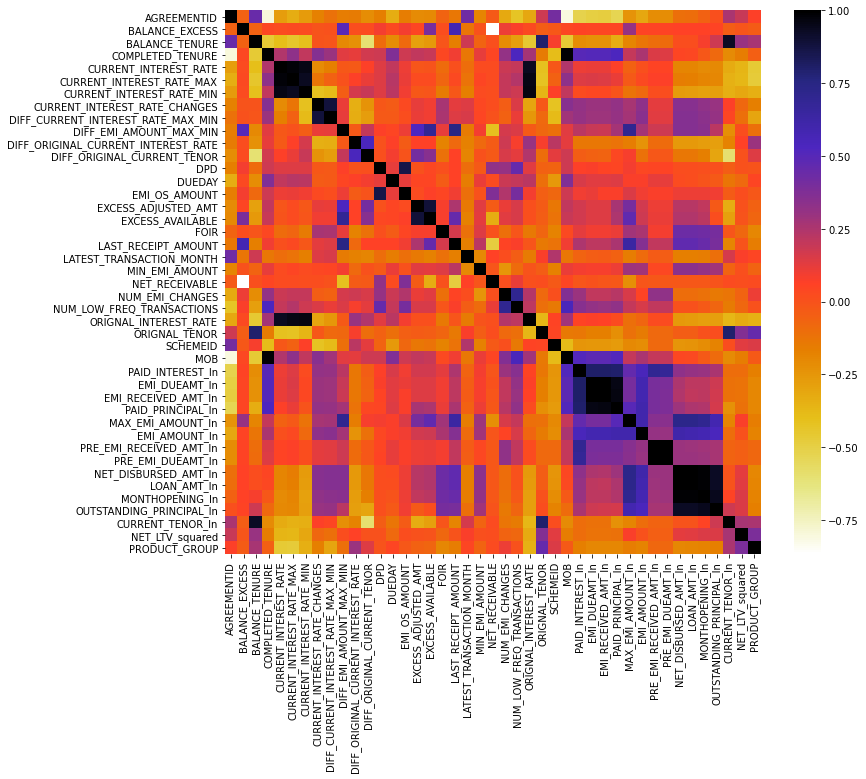

In [215]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=False,fmt='.2f',cmap=plt.cm.CMRmap_r)
plt.show()

#### The following function will help to select the highly correlated features
- It will help to remove the first feature that is highly correlated with any other feature


In [216]:
def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colName = corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr

In [217]:
corr_features = correlation(X_train,0.7)
len(corr_features)

20

In [218]:
corr_features

{'CURRENT_INTEREST_RATE_MAX',
 'CURRENT_INTEREST_RATE_MIN',
 'CURRENT_TENOR_ln',
 'DIFF_CURRENT_INTEREST_RATE_MAX_MIN',
 'EMI_DUEAMT_ln',
 'EMI_OS_AMOUNT',
 'EMI_RECEIVED_AMT_ln',
 'EXCESS_AVAILABLE',
 'LAST_RECEIPT_AMOUNT',
 'LOAN_AMT_ln',
 'MAX_EMI_AMOUNT_ln',
 'MOB',
 'MONTHOPENING_ln',
 'NET_DISBURSED_AMT_ln',
 'NUM_LOW_FREQ_TRANSACTIONS',
 'ORIGNAL_INTEREST_RATE',
 'ORIGNAL_TENOR',
 'OUTSTANDING_PRINCIPAL_ln',
 'PAID_PRINCIPAL_ln',
 'PRE_EMI_DUEAMT_ln'}

### 3.6.3 Feature Selection
- Variation Inflation Factor Value (VIF)
    - It will help to explain multi colinearity within the independant variables
    - We can remove any variable which have <b>VIF > 10</b>

In [219]:
vif_df = pd.DataFrame(y_train,columns=['FORECLOSURE'])
vif_df = pd.concat([X_train,vif_df],axis=1)

features = "+".join(vif_df.columns.difference(['FORECLOSURE']))
a,b = dmatrices(formula_like='FORECLOSURE ~ '+ features, data = vif_df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF Factor                             features
0     0.000000                            Intercept
1     5.245049                          AGREEMENTID
2    25.499470                       BALANCE_EXCESS
3   191.566612                       BALANCE_TENURE
4   122.875073                     COMPLETED_TENURE
5   336.559534                CURRENT_INTEREST_RATE
6     6.977328        CURRENT_INTEREST_RATE_CHANGES
7   286.000638            CURRENT_INTEREST_RATE_MAX
8   466.955161            CURRENT_INTEREST_RATE_MIN
9    25.518935                     CURRENT_TENOR_ln
10   47.235625   DIFF_CURRENT_INTEREST_RATE_MAX_MIN
11    5.250862              DIFF_EMI_AMOUNT_MAX_MIN
12   31.579815  DIFF_ORIGINAL_CURRENT_INTEREST_RATE
13   34.026282          DIFF_ORIGINAL_CURRENT_TENOR
14    4.424799                                  DPD
15    1.352578                               DUEDAY
16    2.704716                        EMI_AMOUNT_ln
17   93.666861                        EMI_DUEAMT_ln
18    8.976644                        EMI_OS_AMOUNT
19  118.007891                  EMI_RECEIVED_AMT_ln
20   13.032551                  EXCESS_ADJUSTED_AMT
21   14.596206                     EXCESS_AVAILABLE
22    1.320343                                 FOIR
23    3.545046                  LAST_RECEIPT_AMOUNT
24    1.842812             LATEST_TRANSACTION_MONTH
25  168.961179                          LOAN_AMT_ln
26    7.010748                    MAX_EMI_AMOUNT_ln
27    1.508999                       MIN_EMI_AMOUNT
28  112.200712                                  MOB
29   97.898308                      MONTHOPENING_ln
30  245.035298                 NET_DISBURSED_AMT_ln
31    1.432655                      NET_LTV_squared
32   26.239890                       NET_RECEIVABLE
33    3.366470                      NUM_EMI_CHANGES
34    3.135319            NUM_LOW_FREQ_TRANSACTIONS
35  285.237299                ORIGNAL_INTEREST_RATE
36   69.646981                        ORIGNAL_TENOR
37   27.855255             OUTSTANDING_PRINCIPAL_ln
38    6.968799                     PAID_INTEREST_ln
39   37.381489                    PAID_PRINCIPAL_ln
40   77.211122                    PRE_EMI_DUEAMT_ln
41   80.747131              PRE_EMI_RECEIVED_AMT_ln
42    2.378705                        PRODUCT_GROUP
43    1.714101                             SCHEMEID

In [ ]:
writer = ExcelWriter('/Users/anupamhore/Desktop/CDrive/DS/DataScientist/Tution/pandafiles/LogisticExercise/VIF.xlsx')
vif.to_excel(writer,'Sheet1',index=False)
writer.save()

### 3.6.3 Feature Selection
    
- Mutual Information(MI)
    - Mutual Information gain is basically a non negative number between two random variables (independant and dependant variables). 
    - If the MI calculated is 0 means the two random variables are independant
    - If the MI calculated is having higher values means the two random variables are highly dependant
    - We can use this technique to find out the relation between out dependant and independant variables and can choose which variables can be significant to determine the dependant or target variable

- MI is calculated as I(X,Y) => H(X) - H(X|Y) where H(X) is the entropy of X variable and H(X|Y) is the conditional entropy of X given Y 

In [220]:
from sklearn.feature_selection import mutual_info_classif

In [221]:
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([8.78499941e-02, 1.31448138e-02, 1.44894590e-02, 2.09685185e-02,
       7.37912362e-02, 6.91747015e-02, 4.50387510e-02, 1.02017915e-02,
       6.24023934e-02, 1.30445061e-02, 6.35794337e-02, 2.52106389e-02,
       1.01116076e-04, 1.68641753e-02, 1.00864295e-03, 1.92488962e-02,
       2.57924502e-02, 3.92756860e-03, 1.60754197e-02, 1.09515873e-01,
       5.24677266e-02, 1.61968950e-02, 7.52027223e-03, 1.96430494e-03,
       5.76762756e-02, 7.90163497e-03, 1.24760635e-01, 2.76852031e-02,
       2.71258390e-02, 2.61363193e-02, 2.64687585e-02, 1.58762643e-02,
       1.42940502e-02, 1.61622734e-02, 8.70931963e-03, 8.88471637e-03,
       7.08537317e-03, 6.91329041e-03, 6.88681309e-03, 5.33991096e-03,
       2.82297697e-02, 7.58903344e-03, 5.71681815e-02])

In [222]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

SCHEMEID                               0.124761
LATEST_TRANSACTION_MONTH               0.109516
AGREEMENTID                            0.087850
CURRENT_INTEREST_RATE                  0.073791
CURRENT_INTEREST_RATE_MAX              0.069175
DIFF_ORIGINAL_CURRENT_INTEREST_RATE    0.063579
DIFF_CURRENT_INTEREST_RATE_MAX_MIN     0.062402
ORIGNAL_INTEREST_RATE                  0.057676
PRODUCT_GROUP                          0.057168
MIN_EMI_AMOUNT                         0.052468
CURRENT_INTEREST_RATE_MIN              0.045039
CURRENT_TENOR_ln                       0.028230
MOB                                    0.027685
PAID_INTEREST_ln                       0.027126
EMI_RECEIVED_AMT_ln                    0.026469
EMI_DUEAMT_ln                          0.026136
EXCESS_AVAILABLE                       0.025792
DIFF_ORIGINAL_CURRENT_TENOR            0.025211
COMPLETED_TENURE                       0.020969
EXCESS_ADJUSTED_AMT                    0.019249
DUEDAY                                 0

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [224]:
# We can select the top 20 important features
sel_20_cols = SelectKBest(mutual_info_classif,k=20)
ordered_features = sel_20_cols.fit(X_train,y_train)
#X_train.columns[sel_20_cols.get_support()]

In [225]:
df_scores = pd.DataFrame(ordered_features.scores_,columns=['Score'])
df_columns = pd.DataFrame(X_train.columns)
features_rank = pd.concat([df_columns,df_scores],axis=1)
features_rank.columns=['Features','Score']
features_rank.nlargest(20,'Score') 

Features     Score
26                             SCHEMEID  0.122044
19             LATEST_TRANSACTION_MONTH  0.109012
0                           AGREEMENTID  0.088319
4                 CURRENT_INTEREST_RATE  0.071694
5             CURRENT_INTEREST_RATE_MAX  0.067358
8    DIFF_CURRENT_INTEREST_RATE_MAX_MIN  0.065781
10  DIFF_ORIGINAL_CURRENT_INTEREST_RATE  0.063743
42                        PRODUCT_GROUP  0.060317
24                ORIGNAL_INTEREST_RATE  0.057318
20                       MIN_EMI_AMOUNT  0.051160
6             CURRENT_INTEREST_RATE_MIN  0.044254
11          DIFF_ORIGINAL_CURRENT_TENOR  0.027804
16                     EXCESS_AVAILABLE  0.027724
28                     PAID_INTEREST_ln  0.027445
30                  EMI_RECEIVED_AMT_ln  0.026330
29                        EMI_DUEAMT_ln  0.026297
40                     CURRENT_TENOR_ln  0.026062
27                                  MOB  0.025462
3                      COMPLETED_TENURE  0.021510
13                               DUEDAY  0.017540

### Feature Importance
 - This technique gives us a score for each feature of the data
 - The higher the score more relevant the variable is

In [226]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [227]:
print(model.feature_importances_)

[0.06805721 0.0094377  0.01057142 0.02774064 0.0183063  0.016919
 0.0204084  0.02329102 0.0189938  0.00681831 0.01585702 0.00827647
 0.00696317 0.01897366 0.0058742  0.00525255 0.00709529 0.00769962
 0.00835837 0.21287104 0.01189889 0.00919958 0.01136311 0.0129291
 0.02374914 0.01240579 0.05288747 0.03263408 0.01490893 0.01469639
 0.01277716 0.01595082 0.00791294 0.01053547 0.00774444 0.00830944
 0.00820122 0.00927259 0.0082668  0.00868313 0.00839893 0.00894293
 0.1705665 ]


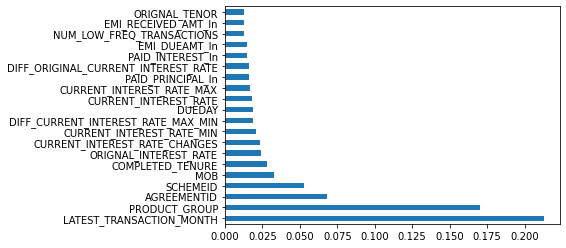

In [228]:
ranked_features = pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [229]:
ranked_features

AGREEMENTID                            0.068057
BALANCE_EXCESS                         0.009438
BALANCE_TENURE                         0.010571
COMPLETED_TENURE                       0.027741
CURRENT_INTEREST_RATE                  0.018306
CURRENT_INTEREST_RATE_MAX              0.016919
CURRENT_INTEREST_RATE_MIN              0.020408
CURRENT_INTEREST_RATE_CHANGES          0.023291
DIFF_CURRENT_INTEREST_RATE_MAX_MIN     0.018994
DIFF_EMI_AMOUNT_MAX_MIN                0.006818
DIFF_ORIGINAL_CURRENT_INTEREST_RATE    0.015857
DIFF_ORIGINAL_CURRENT_TENOR            0.008276
DPD                                    0.006963
DUEDAY                                 0.018974
EMI_OS_AMOUNT                          0.005874
EXCESS_ADJUSTED_AMT                    0.005253
EXCESS_AVAILABLE                       0.007095
FOIR                                   0.007700
LAST_RECEIPT_AMOUNT                    0.008358
LATEST_TRANSACTION_MONTH               0.212871
MIN_EMI_AMOUNT                         0

### Calculate Somer's D

In [230]:
somers_df = pd.DataFrame(y_train,columns=['FORECLOSURE'])
somers_df = pd.concat([X_train,somers_df],axis=1)
somers_df

AGREEMENTID  BALANCE_EXCESS  BALANCE_TENURE  COMPLETED_TENURE  \
2839    11224722.0        0.000000           171.0                10   
3109    11225189.0      907.516102           166.0                 6   
2583    11224310.0        0.000000            59.0                52   
6744    11231233.0      544.408068            94.0                26   
6081    11230134.0        0.000000           187.0                28   
...            ...             ...             ...               ...   
5695    11229443.0     1164.547384            89.0                31   
8006    11233305.0        0.000000           159.0                20   
17745   11249567.0        0.000000           177.0                 3   
17931   11249895.0        0.000000           321.0                 4   
13151   11241833.0        0.000000           230.0                10   

       CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
2839               15.169907                  15.169907   
3109               17.479728                  17.479728   
2583               17.667011                  17.667011   
6744               16.231176                  16.231176   
6081               17.354873                  17.354873   
...                      ...                        ...   
5695               19.976832                  19.976832   
8006               14.233493                  14.233493   
17745              18.665852                  18.665852   
17931              13.734072                  13.734072   
13151              10.437895                  10.437895   

       CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  \
2839                   15.169907                              0   
3109                   17.479728                              0   
2583                   15.919038                              2   
6744                   16.231176                              0   
6081                   15.606900                              2   
...                          ...                            ...   
5695                   19.976832                              0   
8006                   12.485520                              3   
17745                  18.665852                              0   
17931                  12.485520                              1   
13151                  10.437895                              0   

       DIFF_CURRENT_INTEREST_RATE_MAX_MIN  DIFF_EMI_AMOUNT_MAX_MIN  ...  \
2839                             0.000000                187956.00  ...   
3109                             0.000000                 54641.49  ...   
2583                             1.747973                 16899.00  ...   
6744                             0.000000                  7097.00  ...   
6081                             1.747973                126830.79  ...   
...                                   ...                      ...  ...   
5695                             0.000000                 13432.99  ...   
8006                             1.747973                 23278.00  ...   
17745                            0.000000                 10005.00  ...   
17931                            1.248552                 29206.00  ...   
13151                            0.000000                 11694.00  ...   

       PRE_EMI_RECEIVED_AMT_ln  PRE_EMI_DUEAMT_ln  NET_DISBURSED_AMT_ln  \
2839                 12.696158          12.696158             16.994428   
3109                 10.744636          10.744636             15.502773   
2583                  8.679716           8.679716             14.447479   
6744                  7.598561           7.598561             13.528693   
6081                 10.583912          10.583912             16.553983   
...                        ...                ...                   ...   
5695                  8.806492           8.806492             13.305550   
8006                  9.953115           9.953115             14.929875   
17745                 8.292011           8.292011   

In [231]:

num_features = somers_df.columns.difference(['FORECLOSURE'])
somersd_df = pd.DataFrame()
for num_variable in num_features:
    logreg = sm.logit(formula = str('FORECLOSURE ~ ')+str(num_variable), data=somers_df)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(somers_df['FORECLOSURE'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.219881
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.297479
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299058
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300264
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299936
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299010
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300164
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.296365
 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Variable Name    SomersD
0                          AGREEMENTID   0.734072
0                       BALANCE_EXCESS  0.0639117
0                       BALANCE_TENURE   0.112553
0                     COMPLETED_TENURE   0.398658
0                CURRENT_INTEREST_RATE  0.0226546
0        CURRENT_INTEREST_RATE_CHANGES  0.0216719
0            CURRENT_INTEREST_RATE_MAX  0.0683517
0            CURRENT_INTEREST_RATE_MIN   0.155294
0                     CURRENT_TENOR_ln  0.0253405
0   DIFF_CURRENT_INTEREST_RATE_MAX_MIN  0.0716093
0              DIFF_EMI_AMOUNT_MAX_MIN  0.0622885
0  DIFF_ORIGINAL_CURRENT_INTEREST_RATE    0.28617
0          DIFF_ORIGINAL_CURRENT_TENOR   0.280565
0                                  DPD  0.0205126
0                               DUEDAY   0.193261
0                        EMI_AMOUNT_ln   0.223582
0                        EMI_DUEAMT_ln   0.392177
0                        EMI_OS_AMOUNT  0.0385137
0                  EMI_RECEIVED_AMT_ln   0.388285
0                  EXCESS_ADJUSTED_AMT  0.0952064
0                     EXCESS_AVAILABLE   0.146332
0                                 FOIR  0.0541808
0                  LAST_RECEIPT_AMOUNT   0.196592
0             LATEST_TRANSACTION_MONTH   0.767703
0                          LOAN_AMT_ln   0.161805
0                    MAX_EMI_AMOUNT_ln   0.216447
0                       MIN_EMI_AMOUNT   0.203934
0                                  MOB   0.413725
0                      MONTHOPENING_ln   0.157108
0                 NET_DISBURSED_AMT_ln   0.167294
0                      NET_LTV_squared  0.0199062
0                       NET_RECEIVABLE  0.0275449
0                      NUM_EMI_CHANGES  0.0533993
0            NUM_LOW_FREQ_TRANSACTIONS   0.151421
0                ORIGNAL_INTEREST_RATE   0.137638
0                        ORIGNAL_TENOR   0.158468
0             OUTSTANDING_PRINCIPAL_ln   0.110334
0                     PAID_INTEREST_ln   0.418717
0                    PAID_PRINCIPAL_ln   0.294141
0                    PRE_EMI_DUEAMT_ln   0.226934
0              PRE_EMI_RECEIVED_AMT_ln   0.227925
0                        PRODUCT_GROUP   0.503921
0                             SCHEMEID  -0.553628

In [ ]:
from pandas import ExcelWriter
from pandas import ExcelFile
writer = ExcelWriter('/Users/anupamhore/Desktop/CDrive/DS/DataScientist/Tution/pandafiles/LogisticExercise/FeatureSelection(1).xlsx')
somersd_df.to_excel(writer,'Sheet1',index=False)
writer.save()

### From all the feature selection techniques, we will drop the variables which are insignificant in every feature selection technique

In [232]:
features_removed=['NET_LTV_squared','BALANCE_EXCESS','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE',
                 'DIFF_EMI_AMOUNT_MAX_MIN','AGREEMENTID','SCHEMEID','OUTSTANDING_PRINCIPAL_ln','MONTHOPENING_ln',
                 'NUM_LOW_FREQ_TRANSACTIONS','CURRENT_INTEREST_RATE_MIN','CURRENT_TENOR_ln',
                  'DIFF_CURRENT_INTEREST_RATE_MAX_MIN','EMI_DUEAMT_ln','PAID_PRINCIPAL_ln','EMI_OS_AMOUNT',
                 'EXCESS_ADJUSTED_AMT','PRE_EMI_DUEAMT_ln','ORIGNAL_TENOR','NET_DISBURSED_AMT_ln','FOIR','MOB',
                  'EMI_RECEIVED_AMT_ln','EXCESS_AVAILABLE','MAX_EMI_AMOUNT_ln','NET_RECEIVABLE',
                  'PRE_EMI_RECEIVED_AMT_ln','CURRENT_INTEREST_RATE_CHANGES','NUM_EMI_CHANGES','DPD','AGREEMENTID'
                 ]

In [233]:
X_train.drop(features_removed,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [234]:
# Drop also from the X_test variable
X_test.drop(features_removed,axis=1,inplace=True)

In [235]:
X_train.columns

Index(['BALANCE_TENURE', 'COMPLETED_TENURE',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DUEDAY', 'LAST_RECEIPT_AMOUNT', 'LATEST_TRANSACTION_MONTH',
       'MIN_EMI_AMOUNT', 'ORIGNAL_INTEREST_RATE', 'PAID_INTEREST_ln',
       'EMI_AMOUNT_ln', 'LOAN_AMT_ln', 'PRODUCT_GROUP'],
      dtype='object')

### 4.1 Build Logistic Model

In [236]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [237]:
list(zip(X_train,logreg.coef_[0]))

[('BALANCE_TENURE', 0.016050930335230838),
 ('COMPLETED_TENURE', 0.05827003028920471),
 ('DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 0.0140357238310133),
 ('DIFF_ORIGINAL_CURRENT_TENOR', 0.02248937077779459),
 ('DUEDAY', 0.0171128458482108),
 ('LAST_RECEIPT_AMOUNT', 1.171428950357264e-06),
 ('LATEST_TRANSACTION_MONTH', -0.23259506347792896),
 ('MIN_EMI_AMOUNT', 1.0952239227914846e-05),
 ('ORIGNAL_INTEREST_RATE', -0.11233587983242155),
 ('PAID_INTEREST_ln', -0.047412544252670996),
 ('EMI_AMOUNT_ln', -0.06009793966048725),
 ('LOAN_AMT_ln', -0.10362427642214794),
 ('PRODUCT_GROUP', 0.019200891417343567)]

In [238]:
# Create the dataframe between Actual Predictio & Model Prediction
#X_train, X_test, y_train, y_test
logreg_df = pd.DataFrame({'Actual':y_test,'Predicted':logreg.predict(X_test)})
logreg_df 

Actual  Predicted
9448        0          0
7784        0          0
10524       0          0
9411        0          0
18080       0          0
...       ...        ...
15210       0          0
9261        0          0
4216        0          0
9249        0          0
3198        0          0

[6004 rows x 2 columns]

### Validate the Logictic Regression Model

In [239]:
print(confusion_matrix(logreg_df.Actual,logreg_df.Predicted,[1,0]))
print("\n")
print(accuracy_score(logreg_df.Actual,logreg_df.Predicted))
print("\n")
print(classification_report(logreg_df.Actual,logreg_df.Predicted))

[[  95  453]
 [  45 5411]]


0.9170552964690206


              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5456
           1       0.68      0.17      0.28       548

    accuracy                           0.92      6004
   macro avg       0.80      0.58      0.62      6004
weighted avg       0.90      0.92      0.89      6004



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [240]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,logreg.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(logreg_df.Actual,logreg_df.Predicted)))

Accuracy Score for Training Data 0.9161907481439178
Accuracy Score for Test Data 0.9170552964690206


In [241]:
##Lets understand our dependant variable
foreclosure = pd.DataFrame(df3.FORECLOSURE.value_counts())
foreclosure

FORECLOSURE
0        18217
1         1795

#### We see highly imbalance data. So though the accuracy is more than 90% from the model, it is not a very good model.

In [242]:
#Create the probability dataframe for 1's since it is low
#X_train, X_test, y_train, y_test
test_predicted_prob = pd.DataFrame(logreg.predict_proba(X_test))[[1]]
test_predicted_prob.columns=['Prob']
actual = y_test.reset_index()
actual.drop('index',axis=1,inplace=True)
actual_predProb_df = pd.concat([actual,test_predicted_prob],axis=1)
actual_predProb_df.columns = ['Actual','Prob']
actual_predProb_df.head()

Actual      Prob
0       0  0.017653
1       0  0.022161
2       0  0.039114
3       0  0.130516
4       0  0.023856

In [243]:
test_roc_like_df = pd.DataFrame()
test_temp = actual_predProb_df.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['Predicted'] = test_temp['Prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['TP'] = test_temp.apply(lambda x: 1 if x['Actual']==1 and x['Predicted']==1 else 0, axis=1)
    test_temp['FP'] = test_temp.apply(lambda x: 1 if x['Actual']==0 and x['Predicted']==1 else 0, axis=1)
    test_temp['TN'] = test_temp.apply(lambda x: 1 if x['Actual']==0 and x['Predicted']==0 else 0, axis=1)
    test_temp['FN'] = test_temp.apply(lambda x: 1 if x['Actual']==1 and x['Predicted']==0 else 0, axis=1)
    sensitivity = test_temp['TP'].sum() / (test_temp['TP'].sum() + test_temp['FN'].sum())
    specificity = test_temp['TN'].sum() / (test_temp['TN'].sum() + test_temp['FP'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['CutOff', 'Sensitivity', 'Specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)


In [244]:
test_roc_like_df.head(5)

CutOff  Sensitivity  Specificity
0  0.000000     1.000000     0.000000
0  0.020408     0.974453     0.272177
0  0.040816     0.892336     0.532808
0  0.061224     0.815693     0.671371
0  0.081633     0.733577     0.764846

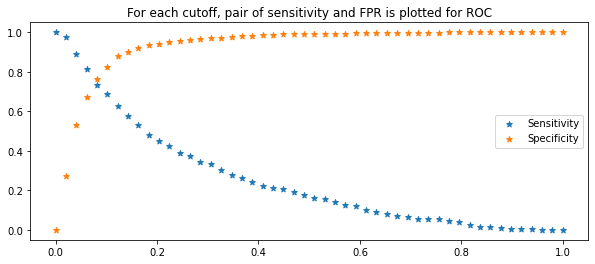

In [245]:
#test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['CutOff'], test_roc_like_df['Sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['CutOff'], test_roc_like_df['Specificity'], marker='*', label='Specificity')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()


In [246]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['Total'] = test_roc_like_df['Sensitivity'] + test_roc_like_df['Specificity']
test_roc_like_df[test_roc_like_df['Total']==test_roc_like_df['Total'].max()]

CutOff  Sensitivity  Specificity     Total
0  0.102041     0.689781      0.82643  1.516211

In [247]:
actual_predProb_df['Predicted'] = actual_predProb_df['Prob'].apply(lambda x: 1 if x > 0.102041 else 0)
actual_predProb_df.head()

Actual      Prob  Predicted
0       0  0.017653          0
1       0  0.022161          0
2       0  0.039114          0
3       0  0.130516          1
4       0  0.023856          0

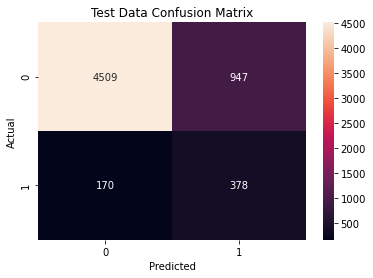

In [248]:
sns.heatmap(pd.crosstab(actual_predProb_df['Actual'], actual_predProb_df['Predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [249]:
print(confusion_matrix(actual_predProb_df.Actual,actual_predProb_df.Predicted,[1,0]))
print("\n")
print(accuracy_score(actual_predProb_df.Actual,actual_predProb_df.Predicted))
print("\n")
print(classification_report(actual_predProb_df.Actual,actual_predProb_df.Predicted))

[[ 378  170]
 [ 947 4509]]


0.8139573617588275


              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5456
           1       0.29      0.69      0.40       548

    accuracy                           0.81      6004
   macro avg       0.62      0.76      0.65      6004
weighted avg       0.90      0.81      0.85      6004



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [250]:
from sklearn.metrics import roc_auc_score
auc_score = metrics.roc_auc_score( actual_predProb_df.Actual, actual_predProb_df.Prob  )

print('AUC SCORE(TEST) {}'.format(round( float( auc_score ), 2 )))

y_pred_train = logreg.predict_proba(X_train)
auc_score_train = metrics.roc_auc_score(y_train,y_pred_train[:,1])
print('AUC SCORE(TRAIN) {}'.format(round( float( auc_score_train ), 2 )))

AUC SCORE(TEST) 0.84
AUC SCORE(TRAIN) 0.84


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prob', ylabel='Density'>

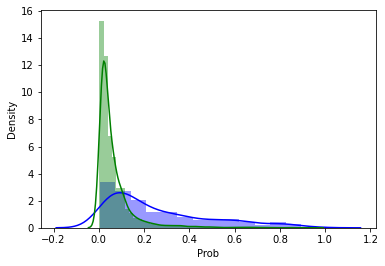

In [78]:
sns.distplot( actual_predProb_df[actual_predProb_df.Actual == 1]["Prob"], color = 'b' )
sns.distplot( actual_predProb_df[actual_predProb_df.Actual == 0]["Prob"], color = 'g' )

### ROC Curve - Logistic Regression

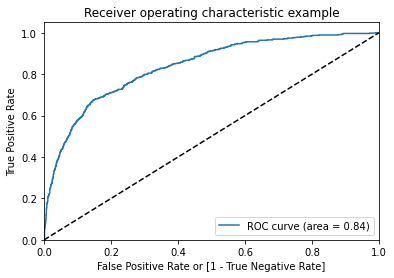

In [251]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( actual_predProb_df.Actual,
                                     actual_predProb_df.Prob,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

As we can notice, the minimum difference between the <b>False Positive</b> and <b>True Positive</b> is when our sensitivity value is at <b>0.67</b>. Now we will calculate the new cut off value based on this value of sensitivity and see how the accuracy of our model increases.

In [ ]:
#One another way to select the threshold value(cut-off value) ( METHOD FROM INTERNET)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(actual_predProb_df.Prob > thres,1,0)
#     accuracy_ls.append(accuracy_score(actual_predProb_df.Actual,y_pred,normalize=True))

# accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
# accuracy_ls.columns= ['thresholds','accuracy']
# accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)

# actual_predProb_df['New_labels1'] = actual_predProb_df['Prob'].map( lambda x: 1 if x >= 0.447625 else 0 )
# print(confusion_matrix(actual_predProb_df.Actual,actual_predProb_df.New_labels1,[1,0]))
# print("\n")
# print(accuracy_score(actual_predProb_df.Actual,actual_predProb_df.New_labels1))
# print("\n")
# print(classification_report(actual_predProb_df.Actual,actual_predProb_df.New_labels1))

In [80]:
cutoff_prob = thresholds[(np.abs(tpr - 0.67)).argmin()]
cutoff_prob = round(float(cutoff_prob),2)
cutoff_prob

0.11

In [302]:
#Predicting with new cut-off probability
actual_predProb_df['New_labels'] = actual_predProb_df['Prob'].map( lambda x: 1 if x >= 0.11 else 0 )

In [303]:
print(confusion_matrix(actual_predProb_df.Actual,actual_predProb_df.New_labels,[1,0]))
print("\n")
print(accuracy_score(actual_predProb_df.Actual,actual_predProb_df.New_labels))
print("\n")
print(classification_report(actual_predProb_df.Actual,actual_predProb_df.New_labels))

[[ 370  178]
 [ 806 4650]]


0.8361092604930047


              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5456
           1       0.31      0.68      0.43       548

    accuracy                           0.84      6004
   macro avg       0.64      0.76      0.67      6004
weighted avg       0.90      0.84      0.86      6004



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### Conclusion - Logistic Regression

- In our business problem, it is important to know if a person is actually defaulted, the machine is able to predict that properly or not. So, the False Negative case scenarios should be minimized.
- With proper threshold value calculated from the ROC curve we were able to find the right cut-off and increase the Recall(Sensitivity) from the original matrix where the cut-off was 0.5(default one)
- With this, our logistic model has <b>83.61%</b> accuracy in determining the defaulters 

## 4.2 Build Model - Decision Tree

In [83]:
import sklearn.tree as dt

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Hyper Parameter Tuning

- First we will do the tuning with RandomizedSearchCV because it will help us to get the range of values for the parameters
- Then we will apply GridSearchCV for all these range values and get the best hyper parameters

#### Hyper Parameter Tuning - RandomizedSearchCV

In [85]:
# Parameters for Hyper Tuning
# criterion = the function used to evaluate the quality of a split.
# max_depth = maximum number of levels allowed in each tree.
# max_features  = maximum number of features considered when splitting a node.
# min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
# min_samples_split = minimum number of samples necessary in a node to cause node splitting.

criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
max_features = ["auto", "sqrt", "log2"]
min_samples_split = [1,3,4,5,7,9,13]
min_samples_leaf = [1,2,4,6,8]

random_grid = {'criterion':criterion,
               'max_depth':max_depth,
               'max_features':max_features,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
              }

In [86]:
clf_dtree = DecisionTreeClassifier()
random_searchCV = RandomizedSearchCV(clf_dtree,
                                     param_distributions=random_grid,
                                     n_iter=100,
                                     cv=3,
                                     verbose=2,
                                     random_state=101,
                                     n_jobs=-1)
random_searchCV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.96987412 0.96509142 0.96459202 0.96123688 0.96623362 0.96287786
 0.96623337 0.96330753 0.96823243 0.96466323 0.96958858        nan
 0.96416322 0.96901743 0.96373483 0.9649485  0.96480597 0.96037935
        nan 0.9681609  0.9562388  0.96630518 0.96666211 0.96444853
 0.96409178        nan 0.959095   0.96259284 0.96844687 0.96380687
 0.96673337        nan 0.95895134 0.9698745  0.96273578 0.96587693
        nan 0.96359255 0.96851805 0.95945183 0.96344957 0.96509116
 0.95638213 0.95459727 0.96594778 0.9666619  0.96130856 0.96294967
        nan        nan 0.9597372         nan 0.96894607 0.96694742
 0.96437729 0.96773282 0.96230734 0.96109356 0.96723299 0.96280661
 0.96837517 0.95688182 0.95688193 0.96280714 0.9622363  0.95952377
        nan 0.96616218 0.96252174        nan 0.9673756  0.96701857
 0.965591   0.96551993 0.96145019 0.96123631 0.966233

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9,
                                                              13]},
                   random_state=101, verbose=2)

In [87]:
random_searchCV.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

#### Hyper Parameter Tuning - GridSearchCV

In [88]:
param_grid = {'criterion':[random_searchCV.best_params_['criterion']],
               'max_depth':[random_searchCV.best_params_['max_depth']],
               'max_features':[random_searchCV.best_params_['max_features']],
               'min_samples_split':[random_searchCV.best_params_['min_samples_split'] - 2,
                          random_searchCV.best_params_['min_samples_split'] - 1,
                          random_searchCV.best_params_['min_samples_split'], 
                          random_searchCV.best_params_['min_samples_split'] +1,
                          random_searchCV.best_params_['min_samples_split'] + 2],
               'min_samples_leaf':[random_searchCV.best_params_['min_samples_leaf'],
                                  random_searchCV.best_params_['min_samples_leaf'] + 2,
                                  random_searchCV.best_params_['min_samples_leaf'] + 4]
              }
clf_dtree = DecisionTreeClassifier()
grid_searchCV = GridSearchCV(estimator=clf_dtree,param_grid=param_grid,cv=10,verbose=2,n_jobs=-1)
grid_searchCV.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [1000],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=2)

In [89]:
grid_searchCV.best_params_

{'criterion': 'entropy',
 'max_depth': 1000,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 7}

In [90]:
clf_dtree = grid_searchCV.best_estimator_

In [91]:
actual_pred_dtree_df = pd.DataFrame({'Actual':y_test,'Predicted':clf_dtree.predict(X_test)})
actual_pred_dtree_df

Actual  Predicted
9448        0          0
7784        0          0
10524       0          0
9411        0          0
18080       0          0
...       ...        ...
15210       0          0
9261        0          0
4216        0          0
9249        0          0
3198        0          0

[6004 rows x 2 columns]

### Model Validation (Decision Tree)

In [92]:
print(confusion_matrix(actual_pred_dtree_df.Actual,actual_pred_dtree_df.Predicted))
print('\n')
print(accuracy_score(actual_pred_dtree_df.Actual,actual_pred_dtree_df.Predicted))
print('\n')
print(classification_report(actual_pred_dtree_df.Actual,actual_pred_dtree_df.Predicted))

[[5360   96]
 [  97  451]]


0.967854763491006


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5456
           1       0.82      0.82      0.82       548

    accuracy                           0.97      6004
   macro avg       0.90      0.90      0.90      6004
weighted avg       0.97      0.97      0.97      6004



### Check if Model is Overfitted or not

- Compare the accuracy score of Training Data & Test Data set

In [93]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_dtree.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_dtree.predict(X_test))))

Accuracy Score for Training Data 0.9768703597944032
Accuracy Score for Test Data 0.967854763491006


In [94]:
dt_predicted_prob = pd.DataFrame(clf_dtree.predict_proba(X_test))[[1]]
dt_predicted_prob.columns=['Prob']
actual = y_test.reset_index()
actual.drop('index',axis=1,inplace=True)
test_auc_dt_df = pd.concat([actual,dt_predicted_prob],axis=1)
test_auc_dt_df.columns = ['Actual','Prob']
test_auc_dt_df.head()

Actual  Prob
0       0   0.0
1       0   0.0
2       0   0.0
3       0   0.0
4       0   0.0

In [95]:
auc_score_dt = metrics.roc_auc_score(test_auc_dt_df.Actual,
                                     test_auc_dt_df.Prob)
auc_score_dt = round(float(auc_score_dt),2)
auc_score_dt

0.96

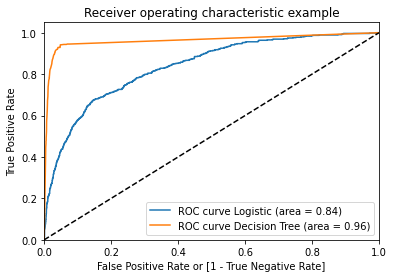

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( actual_predProb_df.Actual,
                                     actual_predProb_df.Prob,
                                     drop_intermediate = False )

fpr1, tpr1, thresholds1 = metrics.roc_curve( test_auc_dt_df.Actual,
                                     test_auc_dt_df.Prob,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc_score )
plt.plot( fpr1, tpr1, label='ROC curve Decision Tree (area = %0.2f)' % auc_score_dt  )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### We see here that DecisionTreeClassifier is giving good results than Normal Logistic Regression
- We will explore other ML as well and check their performance

## 4.3 Build Model - Ensemble Tree (Bagging)

In [97]:
import sklearn.ensemble as en

In [98]:
from sklearn.ensemble import BaggingClassifier

In [99]:
# best_bagging['n_estimators']
clf_bagging = BaggingClassifier(oob_score=True,n_estimators=100)
clf_bagging.fit(X_train,y_train)

BaggingClassifier(n_estimators=100, oob_score=True)

In [100]:
print(confusion_matrix(y_test,clf_bagging.predict(X_test)))
print('\n')
print(accuracy_score(y_test,clf_bagging.predict(X_test)))
print('\n')
print(classification_report(y_test,clf_bagging.predict(X_test)))

[[5382   74]
 [  77  471]]


0.9748500999333778


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5456
           1       0.86      0.86      0.86       548

    accuracy                           0.97      6004
   macro avg       0.93      0.92      0.92      6004
weighted avg       0.97      0.97      0.97      6004



In [101]:
clf_bagging.oob_score_

0.9773700742432896

### Check if Model is Overfitted or not

- Compare the accuracy score of Training Data & Test Data set

In [102]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_bagging.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_bagging.predict(X_test))))

Accuracy Score for Training Data 1.0
Accuracy Score for Test Data 0.9748500999333778


In [103]:
prob_test_bagging = pd.DataFrame(clf_bagging.predict_proba(X_test))[[1]]
prob_test_bagging.columns=['Prob']
actual = y_test.reset_index();
actual.drop('index',axis=1,inplace=True)
test_auc_bagging = pd.concat([actual,prob_test_bagging],axis=1)
test_auc_bagging.columns = ['Actual','Prob']


In [104]:
auc_score_bagging = metrics.roc_auc_score(test_auc_bagging.Actual,test_auc_bagging.Prob)
auc_score_bagging = round(float(auc_score_bagging),2)
auc_score_bagging

0.99

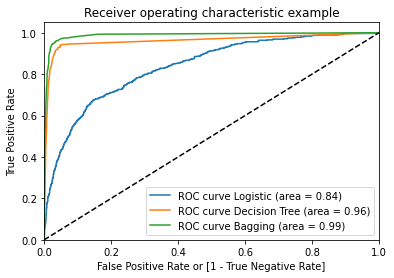

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( actual_predProb_df.Actual,
                                     actual_predProb_df.Prob,
                                     drop_intermediate = False )

fpr1, tpr1, thresholds1 = metrics.roc_curve( test_auc_dt_df.Actual,
                                     test_auc_dt_df.Prob,
                                     drop_intermediate = False )


fpr2, tpr2, thresholds2 = metrics.roc_curve( test_auc_bagging.Actual,
                                     test_auc_bagging.Prob,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc_score )
plt.plot( fpr1, tpr1, label='ROC curve Decision Tree (area = %0.2f)' % auc_score_dt  )
plt.plot( fpr2, tpr2, label='ROC curve Bagging (area = %0.2f)' % auc_score_bagging  )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

#### Bagging is better performing than the Decision Tree

## 4.4 Build Model - Ensemble Tree (Random Forest)

- We will use three HyperParameter Tuning Methods and decide the best parameters for RF
- RandomizedSearchCV & GridSearchCV
- Automatic Hyperparameter Tuning (Bayesian Optimization)

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,3,4,5,7,9,13]
min_samples_leaf = [1,2,4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}


In [108]:
clf_rf = RandomForestClassifier()
random_searchCV = RandomizedSearchCV(clf_rf,
                                     param_distributions=random_grid,
                                     n_iter=100,
                                     cv=3,
                                     verbose=2,
                                     random_state=101,
                                     n_jobs=-1)
random_searchCV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.97701311 0.97879783 0.97722731 0.97679898 0.97851223 0.97744147
 0.9780126  0.97779842 0.97751283 0.97808395 0.9776556         nan
 0.97694174 0.97687037 0.97679901 0.97701311 0.97765564 0.97779842
 0.97758424 0.97708452 0.97708448 0.97758427 0.97765564 0.97786978
 0.97701316 0.97872641 0.97722729 0.97765567 0.97772706 0.97872639
 0.97844088 0.97694178 0.97687036 0.97729869 0.97922614        nan
 0.97701316 0.97851232 0.97694175 0.97715592 0.97658477        nan
 0.97722729 0.97701311 0.9789406  0.97737003 0.97829813 0.97729869
 0.97687037 0.97915478 0.97729869 0.97865509 0.97701313 0.97901193
 0.97844088 0.97679897 0.97708454 0.97872645 0.97901195 0.97744147
 0.97701311 0.97765564 0.97865507 0.97658479 0.97737008 0.97722731
        nan        nan 0.97836952 0.97829816 0.97779841 0.97637066
        nan 0.97829808 0.9771559  0.97708452 0.978155

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9,
                                                              13],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                  

In [109]:
random_searchCV.best_params_

{'n_estimators': 1600,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'entropy'}

In [110]:
random_searchCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=230, max_features='sqrt',
                       min_samples_split=3, n_estimators=1600)

In [111]:
param_grid = {
    'criterion': [random_searchCV.best_params_['criterion']],
    'max_depth': [random_searchCV.best_params_['max_depth']],
    'max_features': [random_searchCV.best_params_['max_features']],
    'min_samples_leaf': [random_searchCV.best_params_['min_samples_leaf'], 
                         random_searchCV.best_params_['min_samples_leaf']+2, 
                         random_searchCV.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_searchCV.best_params_['min_samples_split'] - 2,
                          random_searchCV.best_params_['min_samples_split'] - 1,
                          random_searchCV.best_params_['min_samples_split'], 
                          random_searchCV.best_params_['min_samples_split'] +1,
                          random_searchCV.best_params_['min_samples_split'] + 2],
    'n_estimators': [random_searchCV.best_params_['n_estimators'] - 200, random_searchCV.best_params_['n_estimators'] - 100, 
                     random_searchCV.best_params_['n_estimators'], 
                     random_searchCV.best_params_['n_estimators'] + 100, random_searchCV.best_params_['n_estimators'] + 200]
}

In [112]:
clf_rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=clf_rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.9789405
 0.97922611 0.97901193 0.9789406  0.97894055 0.97922606 0.9794402
 0.97908331 0.97936882 0.97901188 0.97901193 0.97908331 0.97901193
 0.97929739 0.97894055 0.97922606 0.97894055 0.97865494 0.97886918
 0.97922611        nan        nan        nan        nan        nan
 0.97872622 0.97851203 0.97858356 0.97844071 0.97844071 0.97829795
 0.97865489 0.97844076 0.97858346 0.97851213 0.97829795 0.97844071
 0.97844076 0.97844081 0.97836933 0.97872622 0.97844076 0.97886897
 0.97822662 0.97844076        nan        nan        nan        nan
        nan 0.97801234 0.97815499 0.97822652 0.97815509 0.97794091
 0.97822647 0.97808366 0.97808372 0.97822637 0.97808377 0.97801224
 0.97815499 0.97794091 0.97794086 0.97836923 0.97822647 0.97822642
 0.97808377 0.97815504 0.97808366]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [230],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [113]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=230, max_features='sqrt',
                       min_samples_split=3, n_estimators=1500)

In [114]:
clf_rf = grid_search.best_estimator_

#### Modal Validation (Random Forest)

In [115]:
print(confusion_matrix(y_test,clf_rf.predict(X_test)))
print('\n')
print(accuracy_score(y_test,clf_rf.predict(X_test)))
print('\n')
print(classification_report(y_test,clf_rf.predict(X_test)))

[[5384   72]
 [  63  485]]


0.9775149900066622


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5456
           1       0.87      0.89      0.88       548

    accuracy                           0.98      6004
   macro avg       0.93      0.94      0.93      6004
weighted avg       0.98      0.98      0.98      6004



### Check if Model is Overfitted or not

- Compare the accuracy score of Training Data & Test Data set

In [116]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_rf.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_rf.predict(X_test))))

Accuracy Score for Training Data 1.0
Accuracy Score for Test Data 0.9775149900066622


#### We will take the GridSearchCV for the Hyperparameter tuning

## 4.5 Build Model - Ensemble Tree (Ada Boosting)

In [117]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [118]:
pargrid_ada = {'n_estimators': [10, 50, 100, 500],
               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=10,
                        verbose=True, n_jobs=-1)
gscv_ada.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=True)

In [119]:
gscv_ada.best_params_

{'learning_rate': 1.0, 'n_estimators': 500}

In [120]:
clf_adaboost = gscv_ada.best_estimator_

In [121]:
print(confusion_matrix(y_test,clf_adaboost.predict(X_test)))
print('\n')
print(accuracy_score(y_test,clf_adaboost.predict(X_test)))
print('\n')
print(classification_report(y_test,clf_adaboost.predict(X_test)))

[[5380   76]
 [  83  465]]


0.9735176548967355


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5456
           1       0.86      0.85      0.85       548

    accuracy                           0.97      6004
   macro avg       0.92      0.92      0.92      6004
weighted avg       0.97      0.97      0.97      6004



### Check if Model is Overfitted or not

- Compare the accuracy score of Training Data & Test Data set

In [122]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_adaboost.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_adaboost.predict(X_test))))

Accuracy Score for Training Data 0.9807966876070817
Accuracy Score for Test Data 0.9735176548967355


## 4.6 Build Model - Ensemble Tree (Gradient Boosting)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,3,4,5,7,9,13]
min_samples_leaf = [1,2,4,6,8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = [0.7,0.8,0.9,1.0]
warm_start = [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample':subsample,
               'warm_start':warm_start
               }


In [ ]:
clf_grad = GradientBoostingClassifier()
random_searchCV1 = RandomizedSearchCV(clf_grad,
                                     param_distributions=random_grid,
                                     n_iter=100,
                                     cv=3,
                                     verbose=2,
                                     random_state=101,
                                     n_jobs=-1)
random_searchCV1.fit(X_train,y_train)

In [ ]:
random_searchCV1.best_params_

In [ ]:
random_searchCV1.best_estimator_

In [123]:
clf_grad = GradientBoostingClassifier(learning_rate=0.01, max_depth=1000,
                           max_features='log2', min_samples_leaf=6,
                           min_samples_split=9, n_estimators=600, subsample=0.8,
                           warm_start=True)
clf_grad.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1000,
                           max_features='log2', min_samples_leaf=6,
                           min_samples_split=9, n_estimators=600, subsample=0.8,
                           warm_start=True)

In [124]:
print(confusion_matrix(y_test,clf_grad.predict(X_test)))
print('\n')
print(accuracy_score(y_test,clf_grad.predict(X_test)))
print('\n')
print(classification_report(y_test,clf_grad.predict(X_test)))

[[5394   62]
 [  69  479]]


0.9781812125249834


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5456
           1       0.89      0.87      0.88       548

    accuracy                           0.98      6004
   macro avg       0.94      0.93      0.93      6004
weighted avg       0.98      0.98      0.98      6004



### Check if Model is Overfitted or not

- Compare the accuracy score of Training Data & Test Data set

In [125]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_grad.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_grad.predict(X_test))))

Accuracy Score for Training Data 1.0
Accuracy Score for Test Data 0.9781812125249834


## 4.7 Build Model - KNN 

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [262]:
X_KNN = df3.drop(labels=['FORECLOSURE','AUTHORIZATIONDATE','INTEREST_START_DATE','LAST_RECEIPT_DATE'],axis=1)
y_KNN = df3['FORECLOSURE']

In [263]:
scaler = StandardScaler()
scaler.fit(X_KNN)
scaled_features = scaler.transform(X_KNN)
df_KNN = pd.DataFrame(scaled_features,columns=X_KNN.columns)
df_KNN.head()

AGREEMENTID  BALANCE_EXCESS  BALANCE_TENURE  COMPLETED_TENURE  \
0    -1.693742       -0.129078       -2.621211          1.720870   
1    -1.693742       -0.129078       -1.197571          1.287805   
2    -1.693742       -0.129078        0.962434          3.453128   
3    -1.693742       -0.129078       -2.621211          3.453128   
4    -1.693742       -0.129078        0.700616          3.453128   

   CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0              -0.547885                  -0.471725   
1              -0.421789                  -0.471725   
2               0.334789                   0.544101   
3              -1.430560                  -0.471725   
4               0.082596                   0.290144   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  \
0                  -0.331946                       0.220155   
1                  -0.214347                      -0.675321   
2                   0.491243                       1.115632   
3                  -1.155135                       2.906585   
4                   0.256046                       1.115632   

   DIFF_AUTH_INT_DATE  DIFF_CURRENT_INTEREST_RATE_MAX_MIN  ...  EMI_AMOUNT_ln  \
0                 0.0                           -0.316806  ...       1.063355   
1                 0.0                           -0.681750  ...       1.348369   
2                 0.0                            0.048137  ...       0.173572   
3                 0.0                            2.237800  ...       0.898616   
4                 0.0                            0.048137  ...       0.768963   

   PRE_EMI_RECEIVED_AMT_ln  PRE_EMI_DUEAMT_ln  NET_DISBURSED_AMT_ln  \
0                -0.046883          -0.051577              1.398487   
1                 0.961844           0.963584              1.919237   
2                -0.164712          -0.170159              0.260324   
3                 0.758415           0.758857              1.236142   
4                 0.448761           0.447228              0.968663   

   LOAN_AMT_ln  MONTHOPENING_ln  OUTSTANDING_PRINCIPAL_ln  CURRENT_TENOR_ln  \
0     1.392743         1.152965                 -2.444394         -3.779424   
1     1.915916         1.863129                  1.531638         -0.798972   
2     0.249283         0.271777                  0.101898          1.605251   
3     1.229642         0.720061                 -2.444394         -1.989311   
4     0.960919         0.955832                  0.987419          1.529241   

   NET_LTV_squared  PRODUCT_GROUP  
0        -0.688451       0.928214  
1         1.905484       0.928214  
2        -0.224191       0.928214  
3         1.930965       0.928214  
4        -0.993650       0.928214  

[5 rows x 45 columns]

In [264]:
X=df_KNN
y=y_KNN
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.3, random_state=101)

In [265]:
features_removed=['NET_LTV_squared','BALANCE_EXCESS','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE',
                 'DIFF_EMI_AMOUNT_MAX_MIN','AGREEMENTID','SCHEMEID','OUTSTANDING_PRINCIPAL_ln','MONTHOPENING_ln',
                 'NUM_LOW_FREQ_TRANSACTIONS','CURRENT_INTEREST_RATE_MIN','CURRENT_TENOR_ln',
                  'DIFF_CURRENT_INTEREST_RATE_MAX_MIN','EMI_DUEAMT_ln','PAID_PRINCIPAL_ln','EMI_OS_AMOUNT',
                 'EXCESS_ADJUSTED_AMT','PRE_EMI_DUEAMT_ln','ORIGNAL_TENOR','NET_DISBURSED_AMT_ln','FOIR','MOB',
                  'EMI_RECEIVED_AMT_ln','EXCESS_AVAILABLE','MAX_EMI_AMOUNT_ln','NET_RECEIVABLE',
                  'PRE_EMI_RECEIVED_AMT_ln','CURRENT_INTEREST_RATE_CHANGES','NUM_EMI_CHANGES','DPD','AGREEMENTID'
                 ]


In [266]:
X_train_KNN.drop(features_removed,axis=1,inplace=True)
X_test_KNN.drop(features_removed,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [269]:
print(X_train_KNN.shape)
print(y_train_KNN.shape)
print(X_test_KNN.shape)
print(y_test_KNN.shape)

(14008, 15)
(14008,)
(6004, 15)
(6004,)


In [272]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_KNN,y_KNN,cv=10)
    accuracy_rate.append(score.mean())

In [270]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_KNN,y_train_KNN)
    pred_i = knn.predict(X_test_KNN)
    error_rate.append(np.mean(pred_i != y_test_KNN))

In [253]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

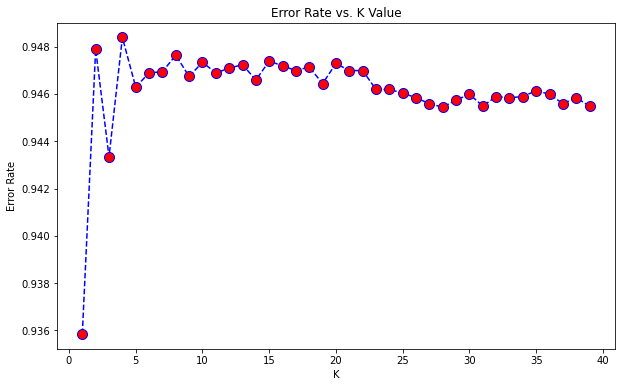

In [273]:
plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [274]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

clf_knn.fit(X_train_KNN,y_train_KNN)


KNeighborsClassifier(n_neighbors=3)

In [275]:
print(confusion_matrix(y_test_KNN,clf_knn.predict(X_test_KNN)))
print('\n')
print(accuracy_score(y_test_KNN,clf_knn.predict(X_test_KNN)))
print('\n')
print(classification_report(y_test_KNN,clf_knn.predict(X_test_KNN)))

[[5385   71]
 [ 123  425]]


0.9676882078614257


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5456
           1       0.86      0.78      0.81       548

    accuracy                           0.97      6004
   macro avg       0.92      0.88      0.90      6004
weighted avg       0.97      0.97      0.97      6004



## Since this is case of imbalance dataset so KNN will not work properly in this dataset.
- We will need to first of all treat the imbalance data and make it balance and then apply KNN

### Let's use some over sampling technique to balance the dataset

In [276]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [277]:
os =SMOTETomek(0.5)

X_train_ns,y_train_ns=os.fit_resample(X_train_KNN,y_train_KNN)
print("The number of classes before fit {}".format(Counter(y_train_KNN)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 12761, 1: 1247})
The number of classes after fit Counter({0: 12748, 1: 6367})


In [278]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_ns,y_train_ns)
    pred_i = knn.predict(X_test_KNN)
    error_rate.append(np.mean(pred_i != y_test_KNN))

Text(0, 0.5, 'Error Rate')

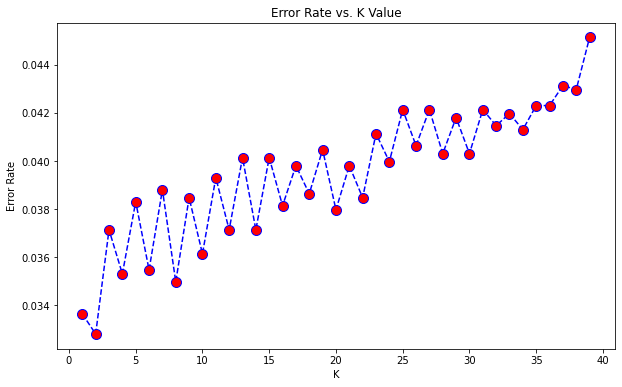

In [279]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_ns,y_train_ns,cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [284]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier()

In [285]:
print(confusion_matrix(y_test_KNN,clf_knn.predict(X_test_KNN)))
print('\n')
print(accuracy_score(y_test_KNN,clf_knn.predict(X_test_KNN)))
print('\n')
print(classification_report(y_test_KNN,clf_knn.predict(X_test_KNN)))

[[5287  169]
 [  61  487]]


0.9616922051965356


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5456
           1       0.74      0.89      0.81       548

    accuracy                           0.96      6004
   macro avg       0.87      0.93      0.89      6004
weighted avg       0.97      0.96      0.96      6004



In [282]:
tuned_parameters = [{'n_neighbors': [1,3,5,7,9,11,13]}]

clf_knn = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                    scoring='roc_auc',
                      n_jobs=-1)
clf_knn.fit(X_train_ns,y_train_ns)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}],
             scoring='roc_auc')

In [283]:
clf_knn.best_params_

{'n_neighbors': 5}

In [288]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_knn.predict(X_train_KNN))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_knn.predict(X_test_KNN))))

Accuracy Score for Training Data 0.9792975442604226
Accuracy Score for Test Data 0.9616922051965356


#### So we see here that KNN does not work well even when we treated the imbalanced dataset.

## 4.8 Build Model - Naive Bayes 

In [256]:
from sklearn.naive_bayes import GaussianNB

In [257]:
clf_nb = GaussianNB().fit(X_train,y_train)

In [258]:
clf_nb.score(X_train,y_train)

0.8791404911479155

In [259]:
clf_nb.score(X_test,y_test)

0.8772485009993338

In [260]:
print(confusion_matrix(y_test,clf_nb.predict(X_test)))
print('\n')
print(accuracy_score(y_test,clf_nb.predict(X_test)))
print('\n')
print(classification_report(y_test,clf_nb.predict(X_test)))

[[5144  312]
 [ 425  123]]


0.8772485009993338


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5456
           1       0.28      0.22      0.25       548

    accuracy                           0.88      6004
   macro avg       0.60      0.58      0.59      6004
weighted avg       0.87      0.88      0.87      6004



In [261]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train,clf_nb.predict(X_train))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test,clf_nb.predict(X_test))))

Accuracy Score for Training Data 0.8791404911479155
Accuracy Score for Test Data 0.8772485009993338


## 4.9 Build Model - SVM

In [289]:
from sklearn.svm import SVC

In [294]:
param_grid = {'C':[0.1,1,100,1000],
              'kernel':['linear','rbf','poly','sigmoid'],
              'degree':[1,2,3,4,5,6]
              }
grid = GridSearchCV(SVC(),param_grid,cv=5,scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [296]:
grid.best_estimator_

SVC(C=100, degree=1)

In [295]:
grid.best_params_

{'C': 100, 'degree': 1, 'kernel': 'rbf'}

In [297]:
clf_svc = SVC(C=100, degree=1)
clf_svc.fit(X_train_ns,y_train_ns)

SVC(C=100, degree=1)

In [298]:
print(confusion_matrix(y_test_KNN,clf_svc.predict(X_test_KNN)))
print('\n')
print(accuracy_score(y_test_KNN,clf_svc.predict(X_test_KNN)))
print('\n')
print(classification_report(y_test_KNN,clf_svc.predict(X_test_KNN)))

[[5334  122]
 [  55  493]]


0.9705196535642905


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5456
           1       0.80      0.90      0.85       548

    accuracy                           0.97      6004
   macro avg       0.90      0.94      0.92      6004
weighted avg       0.97      0.97      0.97      6004



In [300]:
print('Accuracy Score for Training Data {}'.format(accuracy_score(y_train_KNN,clf_svc.predict(X_train_KNN))))
print('Accuracy Score for Test Data {}'.format(accuracy_score(y_test_KNN,clf_svc.predict(X_test_KNN))))

Accuracy Score for Training Data 0.9860079954311822
Accuracy Score for Test Data 0.9705196535642905


#### Best Modal Detection through the accuracy 
- Create the dataframe and check the accuracy for all the models

In [327]:
# Calculate the train and test data accuracy for all models

log_test_acc = np.round(float(accuracy_score(actual_predProb_df.Actual,actual_predProb_df.New_labels)),2)
log_train_acc = np.round(float(accuracy_score(y_train,logreg.predict(X_train))),2)
dtree_test_acc = np.round(float(accuracy_score(y_test,clf_dtree.predict(X_test))),2)
dtree_train_acc = np.round(float(accuracy_score(y_train,clf_dtree.predict(X_train))),2)
bagging_test_acc = np.round(float(accuracy_score(y_test,clf_bagging.predict(X_test))),2)
bagging_train_acc = np.round(float(accuracy_score(y_train,clf_bagging.predict(X_train))),2)
rf_test_acc = np.round(float(accuracy_score(y_test,clf_rf.predict(X_test))),2)
rf_train_acc = np.round(float(accuracy_score(y_train,clf_rf.predict(X_train))),2)
ada_test_acc = np.round(float(accuracy_score(y_test,clf_adaboost.predict(X_test))),2)
ada_train_acc = np.round(float(accuracy_score(y_train,clf_adaboost.predict(X_train))),2)
grad_train_acc = np.round(float(accuracy_score(y_train,clf_grad.predict(X_train))),2)
grad_test_acc = np.round(float(accuracy_score(y_test,clf_grad.predict(X_test))),2)
knn_train_acc = np.round(float(accuracy_score(y_train_KNN,clf_knn.predict(X_train_KNN))),2)
knn_test_acc = np.round(float(accuracy_score(y_test_KNN,clf_knn.predict(X_test_KNN))),2)
nb_train_acc = np.round(float(accuracy_score(y_train,clf_nb.predict(X_train))),2)
nb_test_acc = np.round(float(accuracy_score(y_test,clf_nb.predict(X_test))),2)
svc_train_acc = np.round(float(accuracy_score(y_train_KNN,clf_svc.predict(X_train_KNN))),2)
svc_test_acc = np.round(float(accuracy_score(y_test_KNN,clf_svc.predict(X_test_KNN))),2)

best_modal = pd.DataFrame({'Modal':['Logistic Regression','Decision Tree','Bagging','Random Forest','Ada Boosting','Gradient Boosting','KNN','Naive Bayes','SVC'],
                           'Training Accuracy':[log_train_acc,dtree_train_acc,bagging_train_acc,rf_train_acc,ada_train_acc,grad_train_acc,knn_train_acc,nb_train_acc,svc_train_acc],
                           'Test Accuracy':[log_test_acc,dtree_test_acc,bagging_test_acc,rf_test_acc,ada_test_acc,grad_test_acc,knn_test_acc,nb_test_acc,svc_test_acc],
                           'Sensitivity/Recall':['0.68','0.81','0.87','0.89','0.85','0.88','0.89','0.22','0.90'],
                           'Precision':['0.31','0.84','0.87','0.87','0.86','0.88','0.74','0.28','0.80'],
                           
                          })
best_modal

Modal  Training Accuracy  Test Accuracy Sensitivity/Recall  \
0  Logistic Regression               0.92           0.84               0.68   
1        Decision Tree               0.98           0.97               0.81   
2              Bagging               1.00           0.97               0.87   
3        Random Forest               1.00           0.98               0.89   
4         Ada Boosting               0.98           0.97               0.85   
5    Gradient Boosting               1.00           0.98               0.88   
6                  KNN               0.98           0.96               0.89   
7          Naive Bayes               0.88           0.88               0.22   
8                  SVC               0.99           0.97               0.90   

  Precision  
0      0.31  
1      0.84  
2      0.87  
3      0.87  
4      0.86  
5      0.88  
6      0.74  
7      0.28  
8      0.80